In [ ]:

!pip install keras-preprocessing

In [1]:
!pip install keras-preprocessing
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, Bidirectional, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras_preprocessing.sequence import pad_sequences
from keras import regularizers
from sklearn.metrics import confusion_matrix
import os
















   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 654.4 kB/s eta 0:00:000:00:01








2024-04-24 19:35:04.386559: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered



2024-04-24 19:35:04.386701: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered



2024-04-24 19:35:04.514260: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  2


In [3]:

# Step 1: Prepare the Data
malware_files =['/kaggle/input/assemblyalware/virus/1.txt', '/kaggle/input/assemblyalware/virus/2.txt', '/kaggle/input/assemblyalware/virus/3.txt', '/kaggle/input/assemblyalware/virus/4.txt', '/kaggle/input/assemblyalware/virus/5.txt', '/kaggle/input/assemblyalware/virus/6.txt', '/kaggle/input/assemblyalware/virus/7.txt', '/kaggle/input/assemblyalware/virus/8.txt', '/kaggle/input/assemblyalware/virus/9.txt', '/kaggle/input/assemblyalware/virus/10.txt', '/kaggle/input/assemblyalware/virus/11.txt', '/kaggle/input/assemblyalware/virus/12.txt', '/kaggle/input/assemblyalware/virus/13.txt', '/kaggle/input/assemblyalware/virus/14.txt', '/kaggle/input/assemblyalware/virus/15.txt', '/kaggle/input/assemblyalware/virus/16.txt', '/kaggle/input/assemblyalware/virus/17.txt', '/kaggle/input/assemblyalware/virus/18.txt', '/kaggle/input/assemblyalware/virus/19.txt', '/kaggle/input/assemblyalware/virus/20.txt', '/kaggle/input/assemblyalware/virus/21.txt', '/kaggle/input/assemblyalware/virus/22.txt', '/kaggle/input/assemblyalware/virus/23.txt', '/kaggle/input/assemblyalware/virus/24.txt', '/kaggle/input/assemblyalware/virus/25.txt', '/kaggle/input/assemblyalware/virus/26.txt', '/kaggle/input/assemblyalware/virus/27.txt', '/kaggle/input/assemblyalware/virus/28.txt', '/kaggle/input/assemblyalware/virus/29.txt', '/kaggle/input/assemblyalware/virus/30.txt', '/kaggle/input/assemblyalware/virus/31.txt', '/kaggle/input/assemblyalware/virus/32.txt', '/kaggle/input/assemblyalware/virus/33.txt', '/kaggle/input/assemblyalware/virus/34.txt', '/kaggle/input/assemblyalware/virus/35.txt', '/kaggle/input/assemblyalware/virus/36.txt', '/kaggle/input/assemblyalware/virus/37.txt', '/kaggle/input/assemblyalware/virus/38.txt', '/kaggle/input/assemblyalware/virus/39.txt', '/kaggle/input/assemblyalware/virus/40.txt', '/kaggle/input/assemblyalware/virus/41.txt', '/kaggle/input/assemblyalware/virus/42.txt', '/kaggle/input/assemblyalware/virus/43.txt', '/kaggle/input/assemblyalware/virus/44.txt', '/kaggle/input/assemblyalware/virus/45.txt', '/kaggle/input/assemblyalware/virus/46.txt', '/kaggle/input/assemblyalware/virus/47.txt', '/kaggle/input/assemblyalware/virus/48.txt', '/kaggle/input/assemblyalware/virus/49.txt', '/kaggle/input/assemblyalware/virus/50.txt', '/kaggle/input/assemblyalware/virus/51.txt', '/kaggle/input/assemblyalware/virus/52.txt', '/kaggle/input/assemblyalware/virus/53.txt', '/kaggle/input/assemblyalware/virus/54.txt', '/kaggle/input/assemblyalware/virus/55.txt', '/kaggle/input/assemblyalware/virus/56.txt', '/kaggle/input/assemblyalware/virus/57.txt', '/kaggle/input/assemblyalware/virus/58.txt', '/kaggle/input/assemblyalware/virus/59.txt', '/kaggle/input/assemblyalware/virus/60.txt', '/kaggle/input/assemblyalware/virus/61.txt', '/kaggle/input/assemblyalware/virus/62.txt', '/kaggle/input/assemblyalware/virus/63.txt', '/kaggle/input/assemblyalware/virus/64.txt', '/kaggle/input/assemblyalware/virus/65.txt', '/kaggle/input/assemblyalware/virus/66.txt', '/kaggle/input/assemblyalware/virus/67.txt', '/kaggle/input/assemblyalware/virus/68.txt', '/kaggle/input/assemblyalware/virus/69.txt', '/kaggle/input/assemblyalware/virus/70.txt', '/kaggle/input/assemblyalware/virus/71.txt', '/kaggle/input/assemblyalware/virus/72.txt', '/kaggle/input/assemblyalware/virus/73.txt', '/kaggle/input/assemblyalware/virus/74.txt', '/kaggle/input/assemblyalware/virus/75.txt', '/kaggle/input/assemblyalware/virus/76.txt', '/kaggle/input/assemblyalware/virus/77.txt', '/kaggle/input/assemblyalware/virus/78.txt', '/kaggle/input/assemblyalware/virus/79.txt', '/kaggle/input/assemblyalware/virus/80.txt', '/kaggle/input/assemblyalware/virus/81.txt', '/kaggle/input/assemblyalware/virus/82.txt', '/kaggle/input/assemblyalware/virus/83.txt', '/kaggle/input/assemblyalware/virus/84.txt', '/kaggle/input/assemblyalware/virus/85.txt', '/kaggle/input/assemblyalware/virus/86.txt', '/kaggle/input/assemblyalware/virus/87.txt', '/kaggle/input/assemblyalware/virus/88.txt', '/kaggle/input/assemblyalware/virus/89.txt', '/kaggle/input/assemblyalware/virus/90.txt', '/kaggle/input/assemblyalware/virus/91.txt', '/kaggle/input/assemblyalware/virus/92.txt', '/kaggle/input/assemblyalware/virus/93.txt', '/kaggle/input/assemblyalware/virus/94.txt', '/kaggle/input/assemblyalware/virus/95.txt', '/kaggle/input/assemblyalware/virus/96.txt', '/kaggle/input/assemblyalware/virus/97.txt', '/kaggle/input/assemblyalware/virus/98.txt', '/kaggle/input/assemblyalware/virus/99.txt', '/kaggle/input/assemblyalware/virus/100.txt', '/kaggle/input/assemblyalware/virus/101.txt', '/kaggle/input/assemblyalware/virus/102.txt', '/kaggle/input/assemblyalware/virus/103.txt', '/kaggle/input/assemblyalware/virus/104.txt', '/kaggle/input/assemblyalware/virus/105.txt', '/kaggle/input/assemblyalware/virus/106.txt', '/kaggle/input/assemblyalware/virus/107.txt', '/kaggle/input/assemblyalware/virus/108.txt', '/kaggle/input/assemblyalware/virus/109.txt', '/kaggle/input/assemblyalware/virus/110.txt', '/kaggle/input/assemblyalware/virus/111.txt', '/kaggle/input/assemblyalware/virus/112.txt', '/kaggle/input/assemblyalware/virus/113.txt', '/kaggle/input/assemblyalware/virus/114.txt', '/kaggle/input/assemblyalware/virus/115.txt', '/kaggle/input/assemblyalware/virus/116.txt', '/kaggle/input/assemblyalware/virus/117.txt', '/kaggle/input/assemblyalware/virus/118.txt', '/kaggle/input/assemblyalware/virus/119.txt', '/kaggle/input/assemblyalware/virus/120.txt', '/kaggle/input/assemblyalware/virus/121.txt', '/kaggle/input/assemblyalware/virus/122.txt', '/kaggle/input/assemblyalware/virus/123.txt', '/kaggle/input/assemblyalware/virus/124.txt', '/kaggle/input/assemblyalware/virus/125.txt', '/kaggle/input/assemblyalware/virus/126.txt', '/kaggle/input/assemblyalware/virus/127.txt', '/kaggle/input/assemblyalware/virus/128.txt', '/kaggle/input/assemblyalware/virus/129.txt', '/kaggle/input/assemblyalware/virus/130.txt', '/kaggle/input/assemblyalware/virus/131.txt', '/kaggle/input/assemblyalware/virus/132.txt', '/kaggle/input/assemblyalware/virus/133.txt', '/kaggle/input/assemblyalware/virus/134.txt', '/kaggle/input/assemblyalware/virus/135.txt', '/kaggle/input/assemblyalware/virus/136.txt', '/kaggle/input/assemblyalware/virus/137.txt', '/kaggle/input/assemblyalware/virus/138.txt', '/kaggle/input/assemblyalware/virus/139.txt', '/kaggle/input/assemblyalware/virus/140.txt', '/kaggle/input/assemblyalware/virus/141.txt', '/kaggle/input/assemblyalware/virus/142.txt', '/kaggle/input/assemblyalware/virus/143.txt', '/kaggle/input/assemblyalware/virus/144.txt', '/kaggle/input/assemblyalware/virus/145.txt', '/kaggle/input/assemblyalware/virus/146.txt', '/kaggle/input/assemblyalware/virus/147.txt', '/kaggle/input/assemblyalware/virus/148.txt', '/kaggle/input/assemblyalware/virus/149.txt', '/kaggle/input/assemblyalware/virus/150.txt', '/kaggle/input/assemblyalware/virus/151.txt', '/kaggle/input/assemblyalware/virus/152.txt', '/kaggle/input/assemblyalware/virus/153.txt', '/kaggle/input/assemblyalware/virus/154.txt', '/kaggle/input/assemblyalware/virus/155.txt', '/kaggle/input/assemblyalware/virus/156.txt', '/kaggle/input/assemblyalware/virus/157.txt', '/kaggle/input/assemblyalware/virus/158.txt', '/kaggle/input/assemblyalware/virus/159.txt', '/kaggle/input/assemblyalware/virus/160.txt', '/kaggle/input/assemblyalware/virus/161.txt', '/kaggle/input/assemblyalware/virus/162.txt', '/kaggle/input/assemblyalware/virus/163.txt', '/kaggle/input/assemblyalware/virus/164.txt', '/kaggle/input/assemblyalware/virus/165.txt', '/kaggle/input/assemblyalware/virus/166.txt', '/kaggle/input/assemblyalware/virus/167.txt', '/kaggle/input/assemblyalware/virus/168.txt', '/kaggle/input/assemblyalware/virus/169.txt', '/kaggle/input/assemblyalware/virus/170.txt', '/kaggle/input/assemblyalware/virus/171.txt', '/kaggle/input/assemblyalware/virus/172.txt', '/kaggle/input/assemblyalware/virus/173.txt', '/kaggle/input/assemblyalware/virus/174.txt', '/kaggle/input/assemblyalware/virus/175.txt', '/kaggle/input/assemblyalware/virus/176.txt', '/kaggle/input/assemblyalware/virus/177.txt', '/kaggle/input/assemblyalware/virus/178.txt', '/kaggle/input/assemblyalware/virus/179.txt', '/kaggle/input/assemblyalware/virus/180.txt', '/kaggle/input/assemblyalware/virus/181.txt', '/kaggle/input/assemblyalware/virus/182.txt', '/kaggle/input/assemblyalware/virus/183.txt', '/kaggle/input/assemblyalware/virus/184.txt', '/kaggle/input/assemblyalware/virus/185.txt', '/kaggle/input/assemblyalware/virus/186.txt', '/kaggle/input/assemblyalware/virus/187.txt', '/kaggle/input/assemblyalware/virus/188.txt', '/kaggle/input/assemblyalware/virus/189.txt', '/kaggle/input/assemblyalware/virus/190.txt', '/kaggle/input/assemblyalware/virus/191.txt', '/kaggle/input/assemblyalware/virus/192.txt', '/kaggle/input/assemblyalware/virus/193.txt', '/kaggle/input/assemblyalware/virus/194.txt', '/kaggle/input/assemblyalware/virus/195.txt', '/kaggle/input/assemblyalware/virus/196.txt', '/kaggle/input/assemblyalware/virus/197.txt', '/kaggle/input/assemblyalware/virus/198.txt', '/kaggle/input/assemblyalware/virus/199.txt', '/kaggle/input/assemblyalware/virus/200.txt', '/kaggle/input/assemblyalware/virus/201.txt', '/kaggle/input/assemblyalware/virus/202.txt', '/kaggle/input/assemblyalware/virus/203.txt', '/kaggle/input/assemblyalware/virus/204.txt', '/kaggle/input/assemblyalware/virus/205.txt', '/kaggle/input/assemblyalware/virus/206.txt', '/kaggle/input/assemblyalware/virus/207.txt', '/kaggle/input/assemblyalware/virus/208.txt', '/kaggle/input/assemblyalware/virus/209.txt', '/kaggle/input/assemblyalware/virus/210.txt', '/kaggle/input/assemblyalware/virus/211.txt', '/kaggle/input/assemblyalware/virus/212.txt', '/kaggle/input/assemblyalware/virus/213.txt', '/kaggle/input/assemblyalware/virus/214.txt', '/kaggle/input/assemblyalware/virus/215.txt',
                '/kaggle/input/assemblyalware/virus/216.txt', '/kaggle/input/assemblyalware/virus/217.txt', '/kaggle/input/assemblyalware/virus/218.txt', '/kaggle/input/assemblyalware/virus/219.txt', '/kaggle/input/assemblyalware/virus/220.txt', '/kaggle/input/assemblyalware/virus/221.txt', '/kaggle/input/assemblyalware/virus/222.txt', '/kaggle/input/assemblyalware/virus/223.txt', '/kaggle/input/assemblyalware/virus/224.txt', '/kaggle/input/assemblyalware/virus/225.txt', '/kaggle/input/assemblyalware/virus/226.txt', '/kaggle/input/assemblyalware/virus/227.txt', '/kaggle/input/assemblyalware/virus/228.txt', '/kaggle/input/assemblyalware/virus/229.txt', '/kaggle/input/assemblyalware/virus/230.txt', '/kaggle/input/assemblyalware/virus/231.txt', '/kaggle/input/assemblyalware/virus/232.txt', '/kaggle/input/assemblyalware/virus/233.txt', '/kaggle/input/assemblyalware/virus/234.txt', '/kaggle/input/assemblyalware/virus/235.txt', '/kaggle/input/assemblyalware/virus/236.txt', '/kaggle/input/assemblyalware/virus/237.txt', '/kaggle/input/assemblyalware/virus/238.txt', '/kaggle/input/assemblyalware/virus/239.txt', '/kaggle/input/assemblyalware/virus/240.txt', '/kaggle/input/assemblyalware/virus/241.txt', '/kaggle/input/assemblyalware/virus/242.txt', '/kaggle/input/assemblyalware/virus/243.txt', '/kaggle/input/assemblyalware/virus/244.txt', '/kaggle/input/assemblyalware/virus/245.txt', '/kaggle/input/assemblyalware/virus/246.txt', '/kaggle/input/assemblyalware/virus/247.txt', '/kaggle/input/assemblyalware/virus/248.txt', '/kaggle/input/assemblyalware/virus/249.txt', '/kaggle/input/assemblyalware/virus/250.txt', '/kaggle/input/assemblyalware/virus/251.txt', '/kaggle/input/assemblyalware/virus/252.txt', '/kaggle/input/assemblyalware/virus/253.txt', '/kaggle/input/assemblyalware/virus/254.txt', '/kaggle/input/assemblyalware/virus/255.txt', '/kaggle/input/assemblyalware/virus/256.txt', '/kaggle/input/assemblyalware/virus/257.txt', '/kaggle/input/assemblyalware/virus/258.txt', '/kaggle/input/assemblyalware/virus/259.txt', '/kaggle/input/assemblyalware/virus/260.txt', '/kaggle/input/assemblyalware/virus/261.txt', '/kaggle/input/assemblyalware/virus/262.txt', '/kaggle/input/assemblyalware/virus/263.txt', '/kaggle/input/assemblyalware/virus/264.txt', '/kaggle/input/assemblyalware/virus/265.txt', '/kaggle/input/assemblyalware/virus/266.txt', '/kaggle/input/assemblyalware/virus/267.txt', '/kaggle/input/assemblyalware/virus/268.txt', '/kaggle/input/assemblyalware/virus/269.txt', '/kaggle/input/assemblyalware/virus/270.txt', '/kaggle/input/assemblyalware/virus/271.txt', '/kaggle/input/assemblyalware/virus/272.txt', '/kaggle/input/assemblyalware/virus/273.txt', '/kaggle/input/assemblyalware/virus/274.txt', '/kaggle/input/assemblyalware/virus/275.txt', '/kaggle/input/assemblyalware/virus/276.txt', '/kaggle/input/assemblyalware/virus/277.txt', '/kaggle/input/assemblyalware/virus/278.txt', '/kaggle/input/assemblyalware/virus/279.txt', '/kaggle/input/assemblyalware/virus/280.txt', '/kaggle/input/assemblyalware/virus/281.txt', '/kaggle/input/assemblyalware/virus/282.txt', '/kaggle/input/assemblyalware/virus/283.txt', '/kaggle/input/assemblyalware/virus/284.txt', '/kaggle/input/assemblyalware/virus/285.txt', '/kaggle/input/assemblyalware/virus/286.txt', '/kaggle/input/assemblyalware/virus/287.txt', '/kaggle/input/assemblyalware/virus/288.txt', '/kaggle/input/assemblyalware/virus/289.txt', '/kaggle/input/assemblyalware/virus/290.txt', '/kaggle/input/assemblyalware/virus/291.txt', '/kaggle/input/assemblyalware/virus/292.txt', '/kaggle/input/assemblyalware/virus/293.txt', '/kaggle/input/assemblyalware/virus/294.txt', '/kaggle/input/assemblyalware/virus/295.txt', '/kaggle/input/assemblyalware/virus/296.txt', '/kaggle/input/assemblyalware/virus/297.txt', '/kaggle/input/assemblyalware/virus/298.txt', '/kaggle/input/assemblyalware/virus/299.txt', '/kaggle/input/assemblyalware/virus/300.txt', '/kaggle/input/assemblyalware/virus/301.txt', '/kaggle/input/assemblyalware/virus/302.txt', '/kaggle/input/assemblyalware/virus/303.txt', '/kaggle/input/assemblyalware/virus/304.txt', '/kaggle/input/assemblyalware/virus/305.txt', '/kaggle/input/assemblyalware/virus/306.txt', '/kaggle/input/assemblyalware/virus/307.txt', '/kaggle/input/assemblyalware/virus/308.txt', '/kaggle/input/assemblyalware/virus/309.txt', '/kaggle/input/assemblyalware/virus/310.txt', '/kaggle/input/assemblyalware/virus/311.txt', '/kaggle/input/assemblyalware/virus/312.txt', '/kaggle/input/assemblyalware/virus/313.txt', '/kaggle/input/assemblyalware/virus/314.txt', '/kaggle/input/assemblyalware/virus/315.txt', '/kaggle/input/assemblyalware/virus/316.txt', '/kaggle/input/assemblyalware/virus/317.txt', '/kaggle/input/assemblyalware/virus/318.txt', '/kaggle/input/assemblyalware/virus/319.txt', '/kaggle/input/assemblyalware/virus/320.txt', '/kaggle/input/assemblyalware/virus/321.txt', '/kaggle/input/assemblyalware/virus/322.txt', '/kaggle/input/assemblyalware/virus/323.txt', '/kaggle/input/assemblyalware/virus/324.txt', '/kaggle/input/assemblyalware/virus/325.txt', '/kaggle/input/assemblyalware/virus/326.txt', '/kaggle/input/assemblyalware/virus/327.txt', '/kaggle/input/assemblyalware/virus/328.txt', '/kaggle/input/assemblyalware/virus/329.txt', '/kaggle/input/assemblyalware/virus/330.txt', '/kaggle/input/assemblyalware/virus/331.txt', '/kaggle/input/assemblyalware/virus/332.txt', '/kaggle/input/assemblyalware/virus/333.txt', '/kaggle/input/assemblyalware/virus/334.txt', '/kaggle/input/assemblyalware/virus/335.txt', '/kaggle/input/assemblyalware/virus/336.txt', '/kaggle/input/assemblyalware/virus/337.txt', '/kaggle/input/assemblyalware/virus/338.txt', '/kaggle/input/assemblyalware/virus/339.txt', '/kaggle/input/assemblyalware/virus/340.txt', '/kaggle/input/assemblyalware/virus/341.txt', '/kaggle/input/assemblyalware/virus/342.txt', '/kaggle/input/assemblyalware/virus/343.txt', '/kaggle/input/assemblyalware/virus/344.txt', '/kaggle/input/assemblyalware/virus/345.txt', '/kaggle/input/assemblyalware/virus/346.txt', '/kaggle/input/assemblyalware/virus/347.txt', '/kaggle/input/assemblyalware/virus/348.txt', '/kaggle/input/assemblyalware/virus/349.txt', '/kaggle/input/assemblyalware/virus/350.txt', '/kaggle/input/assemblyalware/virus/351.txt', '/kaggle/input/assemblyalware/virus/352.txt', '/kaggle/input/assemblyalware/virus/353.txt', '/kaggle/input/assemblyalware/virus/354.txt', '/kaggle/input/assemblyalware/virus/355.txt', '/kaggle/input/assemblyalware/virus/356.txt', '/kaggle/input/assemblyalware/virus/357.txt', '/kaggle/input/assemblyalware/virus/358.txt', '/kaggle/input/assemblyalware/virus/359.txt', '/kaggle/input/assemblyalware/virus/360.txt', '/kaggle/input/assemblyalware/virus/361.txt', '/kaggle/input/assemblyalware/virus/362.txt', '/kaggle/input/assemblyalware/virus/363.txt', '/kaggle/input/assemblyalware/virus/364.txt', '/kaggle/input/assemblyalware/virus/365.txt', '/kaggle/input/assemblyalware/virus/366.txt', '/kaggle/input/assemblyalware/virus/367.txt', '/kaggle/input/assemblyalware/virus/368.txt', '/kaggle/input/assemblyalware/virus/369.txt', '/kaggle/input/assemblyalware/virus/370.txt', '/kaggle/input/assemblyalware/virus/371.txt', '/kaggle/input/assemblyalware/virus/372.txt', '/kaggle/input/assemblyalware/virus/373.txt', '/kaggle/input/assemblyalware/virus/374.txt', '/kaggle/input/assemblyalware/virus/375.txt', '/kaggle/input/assemblyalware/virus/376.txt', '/kaggle/input/assemblyalware/virus/377.txt', '/kaggle/input/assemblyalware/virus/378.txt', '/kaggle/input/assemblyalware/virus/379.txt', '/kaggle/input/assemblyalware/virus/380.txt', '/kaggle/input/assemblyalware/virus/381.txt', '/kaggle/input/assemblyalware/virus/382.txt', '/kaggle/input/assemblyalware/virus/383.txt', '/kaggle/input/assemblyalware/virus/384.txt', '/kaggle/input/assemblyalware/virus/385.txt', '/kaggle/input/assemblyalware/virus/386.txt', '/kaggle/input/assemblyalware/virus/387.txt', '/kaggle/input/assemblyalware/virus/388.txt', '/kaggle/input/assemblyalware/virus/389.txt', '/kaggle/input/assemblyalware/virus/390.txt', '/kaggle/input/assemblyalware/virus/391.txt', '/kaggle/input/assemblyalware/virus/392.txt', '/kaggle/input/assemblyalware/virus/393.txt', '/kaggle/input/assemblyalware/virus/394.txt', '/kaggle/input/assemblyalware/virus/395.txt', '/kaggle/input/assemblyalware/virus/396.txt', '/kaggle/input/assemblyalware/virus/397.txt', '/kaggle/input/assemblyalware/virus/398.txt', '/kaggle/input/assemblyalware/virus/399.txt', '/kaggle/input/assemblyalware/virus/400.txt', '/kaggle/input/assemblyalware/virus/401.txt', '/kaggle/input/assemblyalware/virus/402.txt', '/kaggle/input/assemblyalware/virus/403.txt', '/kaggle/input/assemblyalware/virus/404.txt', '/kaggle/input/assemblyalware/virus/405.txt', '/kaggle/input/assemblyalware/virus/406.txt', '/kaggle/input/assemblyalware/virus/407.txt', '/kaggle/input/assemblyalware/virus/408.txt', '/kaggle/input/assemblyalware/virus/409.txt', '/kaggle/input/assemblyalware/virus/410.txt', '/kaggle/input/assemblyalware/virus/411.txt', '/kaggle/input/assemblyalware/virus/412.txt', '/kaggle/input/assemblyalware/virus/413.txt', '/kaggle/input/assemblyalware/virus/414.txt', '/kaggle/input/assemblyalware/virus/415.txt', '/kaggle/input/assemblyalware/virus/416.txt', '/kaggle/input/assemblyalware/virus/417.txt', '/kaggle/input/assemblyalware/virus/418.txt', '/kaggle/input/assemblyalware/virus/419.txt', '/kaggle/input/assemblyalware/virus/420.txt', '/kaggle/input/assemblyalware/virus/421.txt', '/kaggle/input/assemblyalware/virus/422.txt', '/kaggle/input/assemblyalware/virus/423.txt', '/kaggle/input/assemblyalware/virus/424.txt', '/kaggle/input/assemblyalware/virus/425.txt', '/kaggle/input/assemblyalware/virus/426.txt', '/kaggle/input/assemblyalware/virus/427.txt', '/kaggle/input/assemblyalware/virus/428.txt', 
    '/kaggle/input/assemblyalware/virus/429.txt', '/kaggle/input/assemblyalware/virus/430.txt', '/kaggle/input/assemblyalware/virus/431.txt', '/kaggle/input/assemblyalware/virus/432.txt', '/kaggle/input/assemblyalware/virus/433.txt', '/kaggle/input/assemblyalware/virus/434.txt', '/kaggle/input/assemblyalware/virus/435.txt', '/kaggle/input/assemblyalware/virus/436.txt', '/kaggle/input/assemblyalware/virus/437.txt', '/kaggle/input/assemblyalware/virus/438.txt', '/kaggle/input/assemblyalware/virus/439.txt', '/kaggle/input/assemblyalware/virus/440.txt', '/kaggle/input/assemblyalware/virus/441.txt', '/kaggle/input/assemblyalware/virus/442.txt', '/kaggle/input/assemblyalware/virus/443.txt', '/kaggle/input/assemblyalware/virus/444.txt', '/kaggle/input/assemblyalware/virus/445.txt', '/kaggle/input/assemblyalware/virus/446.txt', '/kaggle/input/assemblyalware/virus/447.txt', '/kaggle/input/assemblyalware/virus/448.txt', '/kaggle/input/assemblyalware/virus/449.txt', '/kaggle/input/assemblyalware/virus/450.txt', '/kaggle/input/assemblyalware/virus/451.txt', '/kaggle/input/assemblyalware/virus/452.txt', '/kaggle/input/assemblyalware/virus/453.txt', '/kaggle/input/assemblyalware/virus/454.txt', '/kaggle/input/assemblyalware/virus/455.txt', '/kaggle/input/assemblyalware/virus/456.txt', '/kaggle/input/assemblyalware/virus/457.txt', '/kaggle/input/assemblyalware/virus/458.txt', '/kaggle/input/assemblyalware/virus/459.txt', '/kaggle/input/assemblyalware/virus/460.txt', '/kaggle/input/assemblyalware/virus/461.txt', '/kaggle/input/assemblyalware/virus/462.txt', '/kaggle/input/assemblyalware/virus/463.txt', '/kaggle/input/assemblyalware/virus/464.txt', '/kaggle/input/assemblyalware/virus/465.txt', '/kaggle/input/assemblyalware/virus/466.txt', '/kaggle/input/assemblyalware/virus/467.txt', '/kaggle/input/assemblyalware/virus/468.txt', '/kaggle/input/assemblyalware/virus/469.txt', '/kaggle/input/assemblyalware/virus/470.txt', '/kaggle/input/assemblyalware/virus/471.txt', '/kaggle/input/assemblyalware/virus/472.txt', '/kaggle/input/assemblyalware/virus/473.txt', '/kaggle/input/assemblyalware/virus/474.txt', '/kaggle/input/assemblyalware/virus/475.txt', '/kaggle/input/assemblyalware/virus/476.txt', '/kaggle/input/assemblyalware/virus/477.txt', '/kaggle/input/assemblyalware/virus/478.txt', '/kaggle/input/assemblyalware/virus/479.txt', '/kaggle/input/assemblyalware/virus/480.txt', '/kaggle/input/assemblyalware/virus/481.txt', '/kaggle/input/assemblyalware/virus/482.txt', '/kaggle/input/assemblyalware/virus/483.txt', '/kaggle/input/assemblyalware/virus/484.txt', '/kaggle/input/assemblyalware/virus/485.txt', '/kaggle/input/assemblyalware/virus/486.txt', '/kaggle/input/assemblyalware/virus/487.txt', '/kaggle/input/assemblyalware/virus/488.txt', '/kaggle/input/assemblyalware/virus/489.txt', '/kaggle/input/assemblyalware/virus/490.txt', '/kaggle/input/assemblyalware/virus/491.txt', '/kaggle/input/assemblyalware/virus/492.txt', '/kaggle/input/assemblyalware/virus/493.txt', '/kaggle/input/assemblyalware/virus/494.txt', '/kaggle/input/assemblyalware/virus/495.txt', '/kaggle/input/assemblyalware/virus/496.txt', '/kaggle/input/assemblyalware/virus/497.txt', '/kaggle/input/assemblyalware/virus/498.txt', '/kaggle/input/assemblyalware/virus/499.txt', '/kaggle/input/assemblyalware/virus/500.txt', '/kaggle/input/assemblyalware/virus/501.txt', '/kaggle/input/assemblyalware/virus/502.txt', '/kaggle/input/assemblyalware/virus/503.txt', '/kaggle/input/assemblyalware/virus/504.txt', '/kaggle/input/assemblyalware/virus/505.txt', '/kaggle/input/assemblyalware/virus/506.txt', '/kaggle/input/assemblyalware/virus/507.txt', '/kaggle/input/assemblyalware/virus/508.txt', '/kaggle/input/assemblyalware/virus/509.txt', '/kaggle/input/assemblyalware/virus/510.txt', '/kaggle/input/assemblyalware/virus/511.txt', '/kaggle/input/assemblyalware/virus/512.txt', '/kaggle/input/assemblyalware/virus/513.txt', '/kaggle/input/assemblyalware/virus/514.txt', '/kaggle/input/assemblyalware/virus/515.txt', '/kaggle/input/assemblyalware/virus/516.txt', '/kaggle/input/assemblyalware/virus/517.txt', '/kaggle/input/assemblyalware/virus/518.txt', '/kaggle/input/assemblyalware/virus/519.txt', '/kaggle/input/assemblyalware/virus/520.txt', '/kaggle/input/assemblyalware/virus/521.txt', '/kaggle/input/assemblyalware/virus/522.txt', '/kaggle/input/assemblyalware/virus/523.txt', '/kaggle/input/assemblyalware/virus/524.txt', '/kaggle/input/assemblyalware/virus/525.txt', '/kaggle/input/assemblyalware/virus/526.txt', '/kaggle/input/assemblyalware/virus/527.txt', '/kaggle/input/assemblyalware/virus/528.txt', '/kaggle/input/assemblyalware/virus/529.txt', '/kaggle/input/assemblyalware/virus/530.txt', '/kaggle/input/assemblyalware/virus/531.txt', '/kaggle/input/assemblyalware/virus/532.txt', '/kaggle/input/assemblyalware/virus/533.txt', '/kaggle/input/assemblyalware/virus/534.txt', '/kaggle/input/assemblyalware/virus/535.txt', '/kaggle/input/assemblyalware/virus/536.txt', '/kaggle/input/assemblyalware/virus/537.txt', '/kaggle/input/assemblyalware/virus/538.txt', '/kaggle/input/assemblyalware/virus/539.txt', '/kaggle/input/assemblyalware/virus/540.txt', '/kaggle/input/assemblyalware/virus/541.txt', '/kaggle/input/assemblyalware/virus/542.txt', '/kaggle/input/assemblyalware/virus/543.txt', '/kaggle/input/assemblyalware/virus/544.txt', '/kaggle/input/assemblyalware/virus/545.txt', '/kaggle/input/assemblyalware/virus/546.txt', '/kaggle/input/assemblyalware/virus/547.txt', '/kaggle/input/assemblyalware/virus/548.txt', '/kaggle/input/assemblyalware/virus/549.txt', '/kaggle/input/assemblyalware/virus/550.txt', '/kaggle/input/assemblyalware/virus/551.txt', '/kaggle/input/assemblyalware/virus/552.txt', '/kaggle/input/assemblyalware/virus/553.txt', '/kaggle/input/assemblyalware/virus/554.txt', '/kaggle/input/assemblyalware/virus/555.txt', '/kaggle/input/assemblyalware/virus/556.txt', '/kaggle/input/assemblyalware/virus/557.txt', '/kaggle/input/assemblyalware/virus/558.txt', '/kaggle/input/assemblyalware/virus/559.txt', '/kaggle/input/assemblyalware/virus/560.txt', '/kaggle/input/assemblyalware/virus/561.txt', '/kaggle/input/assemblyalware/virus/562.txt', '/kaggle/input/assemblyalware/virus/563.txt', '/kaggle/input/assemblyalware/virus/564.txt', '/kaggle/input/assemblyalware/virus/565.txt', '/kaggle/input/assemblyalware/virus/566.txt', '/kaggle/input/assemblyalware/virus/567.txt', '/kaggle/input/assemblyalware/virus/568.txt', '/kaggle/input/assemblyalware/virus/569.txt', '/kaggle/input/assemblyalware/virus/570.txt', '/kaggle/input/assemblyalware/virus/571.txt', '/kaggle/input/assemblyalware/virus/572.txt', '/kaggle/input/assemblyalware/virus/573.txt', '/kaggle/input/assemblyalware/virus/574.txt', '/kaggle/input/assemblyalware/virus/575.txt', '/kaggle/input/assemblyalware/virus/576.txt', '/kaggle/input/assemblyalware/virus/577.txt', '/kaggle/input/assemblyalware/virus/578.txt', '/kaggle/input/assemblyalware/virus/579.txt', '/kaggle/input/assemblyalware/virus/580.txt', '/kaggle/input/assemblyalware/virus/581.txt', '/kaggle/input/assemblyalware/virus/582.txt', '/kaggle/input/assemblyalware/virus/583.txt', '/kaggle/input/assemblyalware/virus/584.txt', '/kaggle/input/assemblyalware/virus/585.txt', '/kaggle/input/assemblyalware/virus/586.txt', '/kaggle/input/assemblyalware/virus/587.txt', '/kaggle/input/assemblyalware/virus/588.txt', '/kaggle/input/assemblyalware/virus/589.txt', '/kaggle/input/assemblyalware/virus/590.txt', '/kaggle/input/assemblyalware/virus/591.txt', '/kaggle/input/assemblyalware/virus/592.txt', '/kaggle/input/assemblyalware/virus/593.txt', '/kaggle/input/assemblyalware/virus/594.txt', '/kaggle/input/assemblyalware/virus/595.txt', '/kaggle/input/assemblyalware/virus/596.txt', '/kaggle/input/assemblyalware/virus/597.txt', '/kaggle/input/assemblyalware/virus/598.txt', '/kaggle/input/assemblyalware/virus/599.txt', '/kaggle/input/assemblyalware/virus/600.txt', '/kaggle/input/assemblyalware/virus/601.txt', '/kaggle/input/assemblyalware/virus/602.txt', '/kaggle/input/assemblyalware/virus/603.txt', '/kaggle/input/assemblyalware/virus/604.txt', '/kaggle/input/assemblyalware/virus/605.txt', '/kaggle/input/assemblyalware/virus/606.txt', '/kaggle/input/assemblyalware/virus/607.txt', '/kaggle/input/assemblyalware/virus/608.txt', '/kaggle/input/assemblyalware/virus/609.txt', '/kaggle/input/assemblyalware/virus/610.txt', '/kaggle/input/assemblyalware/virus/611.txt', '/kaggle/input/assemblyalware/virus/612.txt', '/kaggle/input/assemblyalware/virus/613.txt', '/kaggle/input/assemblyalware/virus/614.txt', '/kaggle/input/assemblyalware/virus/615.txt', '/kaggle/input/assemblyalware/virus/616.txt', '/kaggle/input/assemblyalware/virus/617.txt', '/kaggle/input/assemblyalware/virus/618.txt', '/kaggle/input/assemblyalware/virus/619.txt', '/kaggle/input/assemblyalware/virus/620.txt', '/kaggle/input/assemblyalware/virus/621.txt', '/kaggle/input/assemblyalware/virus/622.txt', '/kaggle/input/assemblyalware/virus/623.txt', '/kaggle/input/assemblyalware/virus/624.txt', '/kaggle/input/assemblyalware/virus/625.txt', '/kaggle/input/assemblyalware/virus/626.txt', '/kaggle/input/assemblyalware/virus/627.txt', '/kaggle/input/assemblyalware/virus/628.txt', '/kaggle/input/assemblyalware/virus/629.txt', '/kaggle/input/assemblyalware/virus/630.txt', '/kaggle/input/assemblyalware/virus/631.txt', '/kaggle/input/assemblyalware/virus/632.txt', '/kaggle/input/assemblyalware/virus/633.txt', '/kaggle/input/assemblyalware/virus/634.txt', '/kaggle/input/assemblyalware/virus/635.txt', '/kaggle/input/assemblyalware/virus/636.txt', '/kaggle/input/assemblyalware/virus/637.txt', '/kaggle/input/assemblyalware/virus/638.txt', '/kaggle/input/assemblyalware/virus/639.txt', '/kaggle/input/assemblyalware/virus/640.txt', '/kaggle/input/assemblyalware/virus/641.txt', 
    '/kaggle/input/assemblyalware/virus/642.txt', '/kaggle/input/assemblyalware/virus/643.txt', '/kaggle/input/assemblyalware/virus/644.txt', '/kaggle/input/assemblyalware/virus/645.txt', '/kaggle/input/assemblyalware/virus/646.txt', '/kaggle/input/assemblyalware/virus/647.txt', '/kaggle/input/assemblyalware/virus/648.txt', '/kaggle/input/assemblyalware/virus/649.txt', '/kaggle/input/assemblyalware/virus/650.txt', '/kaggle/input/assemblyalware/virus/651.txt', '/kaggle/input/assemblyalware/virus/652.txt', '/kaggle/input/assemblyalware/virus/653.txt', '/kaggle/input/assemblyalware/virus/654.txt', '/kaggle/input/assemblyalware/virus/655.txt', '/kaggle/input/assemblyalware/virus/656.txt', '/kaggle/input/assemblyalware/virus/657.txt', '/kaggle/input/assemblyalware/virus/658.txt', '/kaggle/input/assemblyalware/virus/659.txt', '/kaggle/input/assemblyalware/virus/660.txt', '/kaggle/input/assemblyalware/virus/661.txt', '/kaggle/input/assemblyalware/virus/662.txt', '/kaggle/input/assemblyalware/virus/663.txt', '/kaggle/input/assemblyalware/virus/664.txt', '/kaggle/input/assemblyalware/virus/665.txt', '/kaggle/input/assemblyalware/virus/666.txt', '/kaggle/input/assemblyalware/virus/667.txt', '/kaggle/input/assemblyalware/virus/668.txt', '/kaggle/input/assemblyalware/virus/669.txt', '/kaggle/input/assemblyalware/virus/670.txt', '/kaggle/input/assemblyalware/virus/671.txt', '/kaggle/input/assemblyalware/virus/672.txt', '/kaggle/input/assemblyalware/virus/673.txt', '/kaggle/input/assemblyalware/virus/674.txt', '/kaggle/input/assemblyalware/virus/675.txt', '/kaggle/input/assemblyalware/virus/676.txt', '/kaggle/input/assemblyalware/virus/677.txt', '/kaggle/input/assemblyalware/virus/678.txt', '/kaggle/input/assemblyalware/virus/679.txt', '/kaggle/input/assemblyalware/virus/680.txt', '/kaggle/input/assemblyalware/virus/681.txt', '/kaggle/input/assemblyalware/virus/682.txt', '/kaggle/input/assemblyalware/virus/683.txt', '/kaggle/input/assemblyalware/virus/684.txt', '/kaggle/input/assemblyalware/virus/685.txt', '/kaggle/input/assemblyalware/virus/686.txt', '/kaggle/input/assemblyalware/virus/687.txt', '/kaggle/input/assemblyalware/virus/688.txt', '/kaggle/input/assemblyalware/virus/689.txt', '/kaggle/input/assemblyalware/virus/690.txt', '/kaggle/input/assemblyalware/virus/691.txt', '/kaggle/input/assemblyalware/virus/692.txt', '/kaggle/input/assemblyalware/virus/693.txt', '/kaggle/input/assemblyalware/virus/694.txt', '/kaggle/input/assemblyalware/virus/695.txt', '/kaggle/input/assemblyalware/virus/696.txt', '/kaggle/input/assemblyalware/virus/697.txt', '/kaggle/input/assemblyalware/virus/698.txt', '/kaggle/input/assemblyalware/virus/699.txt', '/kaggle/input/assemblyalware/virus/700.txt', '/kaggle/input/assemblyalware/virus/701.txt', '/kaggle/input/assemblyalware/virus/702.txt', '/kaggle/input/assemblyalware/virus/703.txt', '/kaggle/input/assemblyalware/virus/704.txt', '/kaggle/input/assemblyalware/virus/705.txt', '/kaggle/input/assemblyalware/virus/706.txt', '/kaggle/input/assemblyalware/virus/707.txt', '/kaggle/input/assemblyalware/virus/708.txt', '/kaggle/input/assemblyalware/virus/709.txt', '/kaggle/input/assemblyalware/virus/710.txt', '/kaggle/input/assemblyalware/virus/711.txt', '/kaggle/input/assemblyalware/virus/712.txt', '/kaggle/input/assemblyalware/virus/713.txt', '/kaggle/input/assemblyalware/virus/714.txt', '/kaggle/input/assemblyalware/virus/715.txt', '/kaggle/input/assemblyalware/virus/716.txt', '/kaggle/input/assemblyalware/virus/717.txt', '/kaggle/input/assemblyalware/virus/718.txt', '/kaggle/input/assemblyalware/virus/719.txt', '/kaggle/input/assemblyalware/virus/720.txt', '/kaggle/input/assemblyalware/virus/721.txt', '/kaggle/input/assemblyalware/virus/722.txt', '/kaggle/input/assemblyalware/virus/723.txt', '/kaggle/input/assemblyalware/virus/724.txt', '/kaggle/input/assemblyalware/virus/725.txt', '/kaggle/input/assemblyalware/virus/726.txt', '/kaggle/input/assemblyalware/virus/727.txt', '/kaggle/input/assemblyalware/virus/728.txt', '/kaggle/input/assemblyalware/virus/729.txt', '/kaggle/input/assemblyalware/virus/730.txt', '/kaggle/input/assemblyalware/virus/731.txt', '/kaggle/input/assemblyalware/virus/732.txt', '/kaggle/input/assemblyalware/virus/733.txt', '/kaggle/input/assemblyalware/virus/734.txt', '/kaggle/input/assemblyalware/virus/735.txt', '/kaggle/input/assemblyalware/virus/736.txt', '/kaggle/input/assemblyalware/virus/737.txt', '/kaggle/input/assemblyalware/virus/738.txt', '/kaggle/input/assemblyalware/virus/739.txt', '/kaggle/input/assemblyalware/virus/740.txt', '/kaggle/input/assemblyalware/virus/741.txt', '/kaggle/input/assemblyalware/virus/742.txt', '/kaggle/input/assemblyalware/virus/743.txt', '/kaggle/input/assemblyalware/virus/744.txt', '/kaggle/input/assemblyalware/virus/745.txt', '/kaggle/input/assemblyalware/virus/746.txt', '/kaggle/input/assemblyalware/virus/747.txt', '/kaggle/input/assemblyalware/virus/748.txt', '/kaggle/input/assemblyalware/virus/749.txt', '/kaggle/input/assemblyalware/virus/750.txt', '/kaggle/input/assemblyalware/virus/751.txt', '/kaggle/input/assemblyalware/virus/752.txt', '/kaggle/input/assemblyalware/virus/753.txt', '/kaggle/input/assemblyalware/virus/754.txt', '/kaggle/input/assemblyalware/virus/755.txt', '/kaggle/input/assemblyalware/virus/756.txt', '/kaggle/input/assemblyalware/virus/757.txt', '/kaggle/input/assemblyalware/virus/758.txt', '/kaggle/input/assemblyalware/virus/759.txt', '/kaggle/input/assemblyalware/virus/760.txt', '/kaggle/input/assemblyalware/virus/761.txt', '/kaggle/input/assemblyalware/virus/762.txt', '/kaggle/input/assemblyalware/virus/763.txt', '/kaggle/input/assemblyalware/virus/764.txt', '/kaggle/input/assemblyalware/virus/765.txt', '/kaggle/input/assemblyalware/virus/766.txt', '/kaggle/input/assemblyalware/virus/767.txt', '/kaggle/input/assemblyalware/virus/768.txt', '/kaggle/input/assemblyalware/virus/769.txt', '/kaggle/input/assemblyalware/virus/770.txt', '/kaggle/input/assemblyalware/virus/771.txt', '/kaggle/input/assemblyalware/virus/772.txt', '/kaggle/input/assemblyalware/virus/773.txt', '/kaggle/input/assemblyalware/virus/774.txt', '/kaggle/input/assemblyalware/virus/775.txt', '/kaggle/input/assemblyalware/virus/776.txt', '/kaggle/input/assemblyalware/virus/777.txt', '/kaggle/input/assemblyalware/virus/778.txt', '/kaggle/input/assemblyalware/virus/779.txt', '/kaggle/input/assemblyalware/virus/780.txt', '/kaggle/input/assemblyalware/virus/781.txt', '/kaggle/input/assemblyalware/virus/782.txt', '/kaggle/input/assemblyalware/virus/783.txt', '/kaggle/input/assemblyalware/virus/784.txt', '/kaggle/input/assemblyalware/virus/785.txt', '/kaggle/input/assemblyalware/virus/786.txt', '/kaggle/input/assemblyalware/virus/787.txt', '/kaggle/input/assemblyalware/virus/788.txt', '/kaggle/input/assemblyalware/virus/789.txt', '/kaggle/input/assemblyalware/virus/790.txt', '/kaggle/input/assemblyalware/virus/791.txt', '/kaggle/input/assemblyalware/virus/792.txt', '/kaggle/input/assemblyalware/virus/793.txt', '/kaggle/input/assemblyalware/virus/794.txt', '/kaggle/input/assemblyalware/virus/795.txt', '/kaggle/input/assemblyalware/virus/796.txt', '/kaggle/input/assemblyalware/virus/797.txt', '/kaggle/input/assemblyalware/virus/798.txt', '/kaggle/input/assemblyalware/virus/799.txt', '/kaggle/input/assemblyalware/virus/800.txt', '/kaggle/input/assemblyalware/virus/801.txt', '/kaggle/input/assemblyalware/virus/802.txt', '/kaggle/input/assemblyalware/virus/803.txt', '/kaggle/input/assemblyalware/virus/804.txt', '/kaggle/input/assemblyalware/virus/805.txt', '/kaggle/input/assemblyalware/virus/806.txt', '/kaggle/input/assemblyalware/virus/807.txt', '/kaggle/input/assemblyalware/virus/808.txt', '/kaggle/input/assemblyalware/virus/809.txt', '/kaggle/input/assemblyalware/virus/810.txt', '/kaggle/input/assemblyalware/virus/811.txt', '/kaggle/input/assemblyalware/virus/812.txt', '/kaggle/input/assemblyalware/virus/813.txt', '/kaggle/input/assemblyalware/virus/814.txt', '/kaggle/input/assemblyalware/virus/815.txt', '/kaggle/input/assemblyalware/virus/816.txt', '/kaggle/input/assemblyalware/virus/817.txt', '/kaggle/input/assemblyalware/virus/818.txt', '/kaggle/input/assemblyalware/virus/819.txt', '/kaggle/input/assemblyalware/virus/820.txt', '/kaggle/input/assemblyalware/virus/821.txt', '/kaggle/input/assemblyalware/virus/822.txt', '/kaggle/input/assemblyalware/virus/823.txt', '/kaggle/input/assemblyalware/virus/824.txt', '/kaggle/input/assemblyalware/virus/825.txt', '/kaggle/input/assemblyalware/virus/826.txt', '/kaggle/input/assemblyalware/virus/827.txt', '/kaggle/input/assemblyalware/virus/828.txt', '/kaggle/input/assemblyalware/virus/829.txt', '/kaggle/input/assemblyalware/virus/830.txt', '/kaggle/input/assemblyalware/virus/831.txt', '/kaggle/input/assemblyalware/virus/832.txt', '/kaggle/input/assemblyalware/virus/833.txt', '/kaggle/input/assemblyalware/virus/834.txt', '/kaggle/input/assemblyalware/virus/835.txt', '/kaggle/input/assemblyalware/virus/836.txt', '/kaggle/input/assemblyalware/virus/837.txt', '/kaggle/input/assemblyalware/virus/838.txt', '/kaggle/input/assemblyalware/virus/839.txt', '/kaggle/input/assemblyalware/virus/840.txt', '/kaggle/input/assemblyalware/virus/841.txt', '/kaggle/input/assemblyalware/virus/842.txt', '/kaggle/input/assemblyalware/virus/843.txt', '/kaggle/input/assemblyalware/virus/844.txt', '/kaggle/input/assemblyalware/virus/845.txt', '/kaggle/input/assemblyalware/virus/846.txt', '/kaggle/input/assemblyalware/virus/847.txt', '/kaggle/input/assemblyalware/virus/848.txt', '/kaggle/input/assemblyalware/virus/849.txt', '/kaggle/input/assemblyalware/virus/850.txt', '/kaggle/input/assemblyalware/virus/851.txt', '/kaggle/input/assemblyalware/virus/852.txt', '/kaggle/input/assemblyalware/virus/853.txt', '/kaggle/input/assemblyalware/virus/854.txt', 
    '/kaggle/input/assemblyalware/virus/855.txt', '/kaggle/input/assemblyalware/virus/856.txt', '/kaggle/input/assemblyalware/virus/857.txt', '/kaggle/input/assemblyalware/virus/858.txt', '/kaggle/input/assemblyalware/virus/859.txt', '/kaggle/input/assemblyalware/virus/860.txt', '/kaggle/input/assemblyalware/virus/861.txt', '/kaggle/input/assemblyalware/virus/862.txt', '/kaggle/input/assemblyalware/virus/863.txt', '/kaggle/input/assemblyalware/virus/864.txt', '/kaggle/input/assemblyalware/virus/865.txt', '/kaggle/input/assemblyalware/virus/866.txt', '/kaggle/input/assemblyalware/virus/867.txt', '/kaggle/input/assemblyalware/virus/868.txt', '/kaggle/input/assemblyalware/virus/869.txt', '/kaggle/input/assemblyalware/virus/870.txt', '/kaggle/input/assemblyalware/virus/871.txt', '/kaggle/input/assemblyalware/virus/872.txt', '/kaggle/input/assemblyalware/virus/873.txt', '/kaggle/input/assemblyalware/virus/874.txt', '/kaggle/input/assemblyalware/virus/875.txt', '/kaggle/input/assemblyalware/virus/876.txt', '/kaggle/input/assemblyalware/virus/877.txt', '/kaggle/input/assemblyalware/virus/878.txt', '/kaggle/input/assemblyalware/virus/879.txt', '/kaggle/input/assemblyalware/virus/880.txt', '/kaggle/input/assemblyalware/virus/881.txt', '/kaggle/input/assemblyalware/virus/882.txt', '/kaggle/input/assemblyalware/virus/883.txt', '/kaggle/input/assemblyalware/virus/884.txt', '/kaggle/input/assemblyalware/virus/885.txt', '/kaggle/input/assemblyalware/virus/886.txt', '/kaggle/input/assemblyalware/virus/887.txt', '/kaggle/input/assemblyalware/virus/888.txt', '/kaggle/input/assemblyalware/virus/889.txt', '/kaggle/input/assemblyalware/virus/890.txt', '/kaggle/input/assemblyalware/virus/891.txt', '/kaggle/input/assemblyalware/virus/892.txt', '/kaggle/input/assemblyalware/virus/893.txt', '/kaggle/input/assemblyalware/virus/894.txt', '/kaggle/input/assemblyalware/virus/895.txt', '/kaggle/input/assemblyalware/virus/896.txt', '/kaggle/input/assemblyalware/virus/897.txt', '/kaggle/input/assemblyalware/virus/898.txt', '/kaggle/input/assemblyalware/virus/899.txt', '/kaggle/input/assemblyalware/virus/900.txt', '/kaggle/input/assemblyalware/virus/901.txt', '/kaggle/input/assemblyalware/virus/902.txt', '/kaggle/input/assemblyalware/virus/903.txt', '/kaggle/input/assemblyalware/virus/904.txt', '/kaggle/input/assemblyalware/virus/905.txt', '/kaggle/input/assemblyalware/virus/906.txt', '/kaggle/input/assemblyalware/virus/907.txt', '/kaggle/input/assemblyalware/virus/908.txt', '/kaggle/input/assemblyalware/virus/909.txt', '/kaggle/input/assemblyalware/virus/910.txt', '/kaggle/input/assemblyalware/virus/911.txt', '/kaggle/input/assemblyalware/virus/912.txt', '/kaggle/input/assemblyalware/virus/913.txt', '/kaggle/input/assemblyalware/virus/914.txt', '/kaggle/input/assemblyalware/virus/915.txt', '/kaggle/input/assemblyalware/virus/916.txt', '/kaggle/input/assemblyalware/virus/917.txt', '/kaggle/input/assemblyalware/virus/918.txt', '/kaggle/input/assemblyalware/virus/919.txt', '/kaggle/input/assemblyalware/virus/920.txt', '/kaggle/input/assemblyalware/virus/921.txt', '/kaggle/input/assemblyalware/virus/922.txt', '/kaggle/input/assemblyalware/virus/923.txt', '/kaggle/input/assemblyalware/virus/924.txt', '/kaggle/input/assemblyalware/virus/925.txt', '/kaggle/input/assemblyalware/virus/926.txt', '/kaggle/input/assemblyalware/virus/927.txt', '/kaggle/input/assemblyalware/virus/928.txt', '/kaggle/input/assemblyalware/virus/929.txt', '/kaggle/input/assemblyalware/virus/930.txt', '/kaggle/input/assemblyalware/virus/931.txt', '/kaggle/input/assemblyalware/virus/932.txt', '/kaggle/input/assemblyalware/virus/933.txt', '/kaggle/input/assemblyalware/virus/934.txt', '/kaggle/input/assemblyalware/virus/935.txt', '/kaggle/input/assemblyalware/virus/936.txt', '/kaggle/input/assemblyalware/virus/937.txt', '/kaggle/input/assemblyalware/virus/938.txt', '/kaggle/input/assemblyalware/virus/939.txt', '/kaggle/input/assemblyalware/virus/940.txt', '/kaggle/input/assemblyalware/virus/941.txt', '/kaggle/input/assemblyalware/virus/942.txt', '/kaggle/input/assemblyalware/virus/943.txt', '/kaggle/input/assemblyalware/virus/944.txt', '/kaggle/input/assemblyalware/virus/945.txt', '/kaggle/input/assemblyalware/virus/946.txt', '/kaggle/input/assemblyalware/virus/947.txt', '/kaggle/input/assemblyalware/virus/948.txt', '/kaggle/input/assemblyalware/virus/949.txt', '/kaggle/input/assemblyalware/virus/950.txt', '/kaggle/input/assemblyalware/virus/951.txt', '/kaggle/input/assemblyalware/virus/952.txt', '/kaggle/input/assemblyalware/virus/953.txt', '/kaggle/input/assemblyalware/virus/954.txt', '/kaggle/input/assemblyalware/virus/955.txt', '/kaggle/input/assemblyalware/virus/956.txt', '/kaggle/input/assemblyalware/virus/957.txt', '/kaggle/input/assemblyalware/virus/958.txt', '/kaggle/input/assemblyalware/virus/959.txt', '/kaggle/input/assemblyalware/virus/960.txt', '/kaggle/input/assemblyalware/virus/961.txt', '/kaggle/input/assemblyalware/virus/962.txt', '/kaggle/input/assemblyalware/virus/963.txt', '/kaggle/input/assemblyalware/virus/964.txt', '/kaggle/input/assemblyalware/virus/965.txt', '/kaggle/input/assemblyalware/virus/966.txt', '/kaggle/input/assemblyalware/virus/967.txt', '/kaggle/input/assemblyalware/virus/968.txt', '/kaggle/input/assemblyalware/virus/969.txt', '/kaggle/input/assemblyalware/virus/970.txt', '/kaggle/input/assemblyalware/virus/971.txt', '/kaggle/input/assemblyalware/virus/972.txt', '/kaggle/input/assemblyalware/virus/973.txt', '/kaggle/input/assemblyalware/virus/974.txt', '/kaggle/input/assemblyalware/virus/975.txt', '/kaggle/input/assemblyalware/virus/976.txt', '/kaggle/input/assemblyalware/virus/977.txt', '/kaggle/input/assemblyalware/virus/978.txt', '/kaggle/input/assemblyalware/virus/979.txt', '/kaggle/input/assemblyalware/virus/980.txt', '/kaggle/input/assemblyalware/virus/981.txt', '/kaggle/input/assemblyalware/virus/982.txt', '/kaggle/input/assemblyalware/virus/983.txt', '/kaggle/input/assemblyalware/virus/984.txt', '/kaggle/input/assemblyalware/virus/985.txt', '/kaggle/input/assemblyalware/virus/986.txt', '/kaggle/input/assemblyalware/virus/987.txt', '/kaggle/input/assemblyalware/virus/988.txt', '/kaggle/input/assemblyalware/virus/989.txt', '/kaggle/input/assemblyalware/virus/990.txt', '/kaggle/input/assemblyalware/virus/991.txt', '/kaggle/input/assemblyalware/virus/992.txt', '/kaggle/input/assemblyalware/virus/993.txt', '/kaggle/input/assemblyalware/virus/994.txt', '/kaggle/input/assemblyalware/virus/995.txt', '/kaggle/input/assemblyalware/virus/996.txt', '/kaggle/input/assemblyalware/virus/997.txt', '/kaggle/input/assemblyalware/virus/998.txt', '/kaggle/input/assemblyalware/virus/999.txt', '/kaggle/input/assemblyalware/virus/1000.txt', '/kaggle/input/assemblyalware/virus/1001.txt', '/kaggle/input/assemblyalware/virus/1002.txt', '/kaggle/input/assemblyalware/virus/1003.txt', '/kaggle/input/assemblyalware/virus/1004.txt', '/kaggle/input/assemblyalware/virus/1005.txt', '/kaggle/input/assemblyalware/virus/1006.txt', '/kaggle/input/assemblyalware/virus/1007.txt', '/kaggle/input/assemblyalware/virus/1008.txt', '/kaggle/input/assemblyalware/virus/1009.txt', '/kaggle/input/assemblyalware/virus/1010.txt', '/kaggle/input/assemblyalware/virus/1011.txt', '/kaggle/input/assemblyalware/virus/1012.txt', '/kaggle/input/assemblyalware/virus/1013.txt', '/kaggle/input/assemblyalware/virus/1014.txt', '/kaggle/input/assemblyalware/virus/1015.txt', '/kaggle/input/assemblyalware/virus/1016.txt', '/kaggle/input/assemblyalware/virus/1017.txt', '/kaggle/input/assemblyalware/virus/1018.txt', '/kaggle/input/assemblyalware/virus/1019.txt', '/kaggle/input/assemblyalware/virus/1020.txt', '/kaggle/input/assemblyalware/virus/1021.txt', '/kaggle/input/assemblyalware/virus/1022.txt', '/kaggle/input/assemblyalware/virus/1023.txt', '/kaggle/input/assemblyalware/virus/1024.txt', '/kaggle/input/assemblyalware/virus/1025.txt', '/kaggle/input/assemblyalware/virus/1026.txt', '/kaggle/input/assemblyalware/virus/1027.txt', '/kaggle/input/assemblyalware/virus/1028.txt', '/kaggle/input/assemblyalware/virus/1029.txt', '/kaggle/input/assemblyalware/virus/1030.txt', '/kaggle/input/assemblyalware/virus/1031.txt', '/kaggle/input/assemblyalware/virus/1032.txt', '/kaggle/input/assemblyalware/virus/1033.txt', '/kaggle/input/assemblyalware/virus/1034.txt', '/kaggle/input/assemblyalware/virus/1035.txt', '/kaggle/input/assemblyalware/virus/1036.txt', '/kaggle/input/assemblyalware/virus/1037.txt', '/kaggle/input/assemblyalware/virus/1038.txt', '/kaggle/input/assemblyalware/virus/1039.txt', '/kaggle/input/assemblyalware/virus/1040.txt', '/kaggle/input/assemblyalware/virus/1041.txt', '/kaggle/input/assemblyalware/virus/1042.txt', '/kaggle/input/assemblyalware/virus/1043.txt', '/kaggle/input/assemblyalware/virus/1044.txt', '/kaggle/input/assemblyalware/virus/1045.txt', '/kaggle/input/assemblyalware/virus/1046.txt', '/kaggle/input/assemblyalware/virus/1047.txt', '/kaggle/input/assemblyalware/virus/1048.txt', '/kaggle/input/assemblyalware/virus/1049.txt', '/kaggle/input/assemblyalware/virus/1050.txt', '/kaggle/input/assemblyalware/virus/1051.txt', '/kaggle/input/assemblyalware/virus/1052.txt', '/kaggle/input/assemblyalware/virus/1053.txt', '/kaggle/input/assemblyalware/virus/1054.txt', '/kaggle/input/assemblyalware/virus/1055.txt', '/kaggle/input/assemblyalware/virus/1056.txt', '/kaggle/input/assemblyalware/virus/1057.txt', '/kaggle/input/assemblyalware/virus/1058.txt', '/kaggle/input/assemblyalware/virus/1059.txt', '/kaggle/input/assemblyalware/virus/1060.txt', '/kaggle/input/assemblyalware/virus/1061.txt', '/kaggle/input/assemblyalware/virus/1062.txt', '/kaggle/input/assemblyalware/virus/1063.txt', '/kaggle/input/assemblyalware/virus/1064.txt', '/kaggle/input/assemblyalware/virus/1065.txt', '/kaggle/input/assemblyalware/virus/1066.txt', 
    '/kaggle/input/assemblyalware/virus/1067.txt', '/kaggle/input/assemblyalware/virus/1068.txt', '/kaggle/input/assemblyalware/virus/1069.txt', '/kaggle/input/assemblyalware/virus/1070.txt', '/kaggle/input/assemblyalware/virus/1071.txt', '/kaggle/input/assemblyalware/virus/1072.txt', '/kaggle/input/assemblyalware/virus/1073.txt', '/kaggle/input/assemblyalware/virus/1074.txt', '/kaggle/input/assemblyalware/virus/1075.txt', '/kaggle/input/assemblyalware/virus/1076.txt', '/kaggle/input/assemblyalware/virus/1077.txt', '/kaggle/input/assemblyalware/virus/1078.txt', '/kaggle/input/assemblyalware/virus/1079.txt', '/kaggle/input/assemblyalware/virus/1080.txt', '/kaggle/input/assemblyalware/virus/1081.txt', '/kaggle/input/assemblyalware/virus/1082.txt', '/kaggle/input/assemblyalware/virus/1083.txt', '/kaggle/input/assemblyalware/virus/1084.txt', '/kaggle/input/assemblyalware/virus/1085.txt', '/kaggle/input/assemblyalware/virus/1086.txt', '/kaggle/input/assemblyalware/virus/1087.txt', '/kaggle/input/assemblyalware/virus/1088.txt', '/kaggle/input/assemblyalware/virus/1089.txt', '/kaggle/input/assemblyalware/virus/1090.txt', '/kaggle/input/assemblyalware/virus/1091.txt', '/kaggle/input/assemblyalware/virus/1092.txt', '/kaggle/input/assemblyalware/virus/1093.txt', '/kaggle/input/assemblyalware/virus/1094.txt', '/kaggle/input/assemblyalware/virus/1095.txt', '/kaggle/input/assemblyalware/virus/1096.txt', '/kaggle/input/assemblyalware/virus/1097.txt', '/kaggle/input/assemblyalware/virus/1098.txt', '/kaggle/input/assemblyalware/virus/1099.txt', '/kaggle/input/assemblyalware/virus/1100.txt', '/kaggle/input/assemblyalware/virus/1101.txt', '/kaggle/input/assemblyalware/virus/1102.txt', '/kaggle/input/assemblyalware/virus/1103.txt', '/kaggle/input/assemblyalware/virus/1104.txt', '/kaggle/input/assemblyalware/virus/1105.txt', '/kaggle/input/assemblyalware/virus/1106.txt', '/kaggle/input/assemblyalware/virus/1107.txt', '/kaggle/input/assemblyalware/virus/1108.txt', '/kaggle/input/assemblyalware/virus/1109.txt', '/kaggle/input/assemblyalware/virus/1110.txt', '/kaggle/input/assemblyalware/virus/1111.txt', '/kaggle/input/assemblyalware/virus/1112.txt', '/kaggle/input/assemblyalware/virus/1113.txt', '/kaggle/input/assemblyalware/virus/1114.txt', '/kaggle/input/assemblyalware/virus/1115.txt', '/kaggle/input/assemblyalware/virus/1116.txt', '/kaggle/input/assemblyalware/virus/1117.txt', '/kaggle/input/assemblyalware/virus/1118.txt', '/kaggle/input/assemblyalware/virus/1119.txt', '/kaggle/input/assemblyalware/virus/1120.txt', '/kaggle/input/assemblyalware/virus/1121.txt', '/kaggle/input/assemblyalware/virus/1122.txt', '/kaggle/input/assemblyalware/virus/1123.txt', '/kaggle/input/assemblyalware/virus/1124.txt', '/kaggle/input/assemblyalware/virus/1125.txt', '/kaggle/input/assemblyalware/virus/1126.txt', '/kaggle/input/assemblyalware/virus/1127.txt', '/kaggle/input/assemblyalware/virus/1128.txt', '/kaggle/input/assemblyalware/virus/1129.txt', '/kaggle/input/assemblyalware/virus/1130.txt', '/kaggle/input/assemblyalware/virus/1131.txt', '/kaggle/input/assemblyalware/virus/1132.txt', '/kaggle/input/assemblyalware/virus/1133.txt', '/kaggle/input/assemblyalware/virus/1134.txt', '/kaggle/input/assemblyalware/virus/1135.txt', '/kaggle/input/assemblyalware/virus/1136.txt', '/kaggle/input/assemblyalware/virus/1137.txt', '/kaggle/input/assemblyalware/virus/1138.txt', '/kaggle/input/assemblyalware/virus/1139.txt', '/kaggle/input/assemblyalware/virus/1140.txt', '/kaggle/input/assemblyalware/virus/1141.txt', '/kaggle/input/assemblyalware/virus/1142.txt', '/kaggle/input/assemblyalware/virus/1143.txt', '/kaggle/input/assemblyalware/virus/1144.txt', '/kaggle/input/assemblyalware/virus/1145.txt', '/kaggle/input/assemblyalware/virus/1146.txt', '/kaggle/input/assemblyalware/virus/1147.txt', '/kaggle/input/assemblyalware/virus/1148.txt', '/kaggle/input/assemblyalware/virus/1149.txt', '/kaggle/input/assemblyalware/virus/1150.txt', '/kaggle/input/assemblyalware/virus/1151.txt', '/kaggle/input/assemblyalware/virus/1152.txt', '/kaggle/input/assemblyalware/virus/1153.txt', '/kaggle/input/assemblyalware/virus/1154.txt', '/kaggle/input/assemblyalware/virus/1155.txt', '/kaggle/input/assemblyalware/virus/1156.txt', '/kaggle/input/assemblyalware/virus/1157.txt', '/kaggle/input/assemblyalware/virus/1158.txt', '/kaggle/input/assemblyalware/virus/1159.txt', '/kaggle/input/assemblyalware/virus/1160.txt', '/kaggle/input/assemblyalware/virus/1161.txt', '/kaggle/input/assemblyalware/virus/1162.txt', '/kaggle/input/assemblyalware/virus/1163.txt', '/kaggle/input/assemblyalware/virus/1164.txt', '/kaggle/input/assemblyalware/virus/1165.txt', '/kaggle/input/assemblyalware/virus/1166.txt', '/kaggle/input/assemblyalware/virus/1167.txt', '/kaggle/input/assemblyalware/virus/1168.txt', '/kaggle/input/assemblyalware/virus/1169.txt', '/kaggle/input/assemblyalware/virus/1170.txt', '/kaggle/input/assemblyalware/virus/1171.txt', '/kaggle/input/assemblyalware/virus/1172.txt', '/kaggle/input/assemblyalware/virus/1173.txt', '/kaggle/input/assemblyalware/virus/1174.txt', '/kaggle/input/assemblyalware/virus/1175.txt', '/kaggle/input/assemblyalware/virus/1176.txt', '/kaggle/input/assemblyalware/virus/1177.txt', '/kaggle/input/assemblyalware/virus/1178.txt', '/kaggle/input/assemblyalware/virus/1179.txt', '/kaggle/input/assemblyalware/virus/1180.txt', '/kaggle/input/assemblyalware/virus/1181.txt', '/kaggle/input/assemblyalware/virus/1182.txt', '/kaggle/input/assemblyalware/virus/1183.txt', '/kaggle/input/assemblyalware/virus/1184.txt', '/kaggle/input/assemblyalware/virus/1185.txt', '/kaggle/input/assemblyalware/virus/1186.txt', '/kaggle/input/assemblyalware/virus/1187.txt', '/kaggle/input/assemblyalware/virus/1188.txt', '/kaggle/input/assemblyalware/virus/1189.txt', '/kaggle/input/assemblyalware/virus/1190.txt', '/kaggle/input/assemblyalware/virus/1191.txt', '/kaggle/input/assemblyalware/virus/1192.txt', '/kaggle/input/assemblyalware/virus/1193.txt', '/kaggle/input/assemblyalware/virus/1194.txt', '/kaggle/input/assemblyalware/virus/1195.txt', '/kaggle/input/assemblyalware/virus/1196.txt', '/kaggle/input/assemblyalware/virus/1197.txt', '/kaggle/input/assemblyalware/virus/1198.txt', '/kaggle/input/assemblyalware/virus/1199.txt', '/kaggle/input/assemblyalware/virus/1200.txt', '/kaggle/input/assemblyalware/virus/1201.txt', '/kaggle/input/assemblyalware/virus/1202.txt', '/kaggle/input/assemblyalware/virus/1203.txt', '/kaggle/input/assemblyalware/virus/1204.txt', '/kaggle/input/assemblyalware/virus/1205.txt', '/kaggle/input/assemblyalware/virus/1206.txt', '/kaggle/input/assemblyalware/virus/1207.txt', '/kaggle/input/assemblyalware/virus/1208.txt', '/kaggle/input/assemblyalware/virus/1209.txt', '/kaggle/input/assemblyalware/virus/1210.txt', '/kaggle/input/assemblyalware/virus/1211.txt', '/kaggle/input/assemblyalware/virus/1212.txt', '/kaggle/input/assemblyalware/virus/1213.txt', '/kaggle/input/assemblyalware/virus/1214.txt', '/kaggle/input/assemblyalware/virus/1215.txt', '/kaggle/input/assemblyalware/virus/1216.txt', '/kaggle/input/assemblyalware/virus/1217.txt', '/kaggle/input/assemblyalware/virus/1218.txt', '/kaggle/input/assemblyalware/virus/1219.txt', '/kaggle/input/assemblyalware/virus/1220.txt', '/kaggle/input/assemblyalware/virus/1221.txt', '/kaggle/input/assemblyalware/virus/1222.txt', '/kaggle/input/assemblyalware/virus/1223.txt', '/kaggle/input/assemblyalware/virus/1224.txt', '/kaggle/input/assemblyalware/virus/1225.txt', '/kaggle/input/assemblyalware/virus/1226.txt', '/kaggle/input/assemblyalware/virus/1227.txt', '/kaggle/input/assemblyalware/virus/1228.txt', '/kaggle/input/assemblyalware/virus/1229.txt', '/kaggle/input/assemblyalware/virus/1230.txt', '/kaggle/input/assemblyalware/virus/1231.txt', '/kaggle/input/assemblyalware/virus/1232.txt', '/kaggle/input/assemblyalware/virus/1233.txt', '/kaggle/input/assemblyalware/virus/1234.txt', '/kaggle/input/assemblyalware/virus/1235.txt', '/kaggle/input/assemblyalware/virus/1236.txt', '/kaggle/input/assemblyalware/virus/1237.txt', '/kaggle/input/assemblyalware/virus/1238.txt', '/kaggle/input/assemblyalware/virus/1239.txt', '/kaggle/input/assemblyalware/virus/1240.txt', '/kaggle/input/assemblyalware/virus/1241.txt', '/kaggle/input/assemblyalware/virus/1242.txt', '/kaggle/input/assemblyalware/virus/1243.txt', '/kaggle/input/assemblyalware/virus/1244.txt', '/kaggle/input/assemblyalware/virus/1245.txt', '/kaggle/input/assemblyalware/virus/1246.txt', '/kaggle/input/assemblyalware/virus/1247.txt', '/kaggle/input/assemblyalware/virus/1248.txt', '/kaggle/input/assemblyalware/virus/1249.txt', '/kaggle/input/assemblyalware/virus/1250.txt', '/kaggle/input/assemblyalware/virus/1251.txt', '/kaggle/input/assemblyalware/virus/1252.txt', '/kaggle/input/assemblyalware/virus/1253.txt', '/kaggle/input/assemblyalware/virus/1254.txt', '/kaggle/input/assemblyalware/virus/1255.txt', '/kaggle/input/assemblyalware/virus/1256.txt', '/kaggle/input/assemblyalware/virus/1257.txt', '/kaggle/input/assemblyalware/virus/1258.txt', '/kaggle/input/assemblyalware/virus/1259.txt', '/kaggle/input/assemblyalware/virus/1260.txt', '/kaggle/input/assemblyalware/virus/1261.txt', '/kaggle/input/assemblyalware/virus/1262.txt', '/kaggle/input/assemblyalware/virus/1263.txt', '/kaggle/input/assemblyalware/virus/1264.txt', '/kaggle/input/assemblyalware/virus/1265.txt', '/kaggle/input/assemblyalware/virus/1266.txt', '/kaggle/input/assemblyalware/virus/1267.txt', '/kaggle/input/assemblyalware/virus/1268.txt', '/kaggle/input/assemblyalware/virus/1269.txt', '/kaggle/input/assemblyalware/virus/1270.txt', '/kaggle/input/assemblyalware/virus/1271.txt', '/kaggle/input/assemblyalware/virus/1272.txt', '/kaggle/input/assemblyalware/virus/1273.txt', '/kaggle/input/assemblyalware/virus/1274.txt', '/kaggle/input/assemblyalware/virus/1275.txt', 
    '/kaggle/input/assemblyalware/virus/1276.txt', '/kaggle/input/assemblyalware/virus/1277.txt', '/kaggle/input/assemblyalware/virus/1278.txt', '/kaggle/input/assemblyalware/virus/1279.txt', '/kaggle/input/assemblyalware/virus/1280.txt', '/kaggle/input/assemblyalware/virus/1281.txt', '/kaggle/input/assemblyalware/virus/1282.txt', '/kaggle/input/assemblyalware/virus/1283.txt', '/kaggle/input/assemblyalware/virus/1284.txt', '/kaggle/input/assemblyalware/virus/1285.txt', '/kaggle/input/assemblyalware/virus/1286.txt', '/kaggle/input/assemblyalware/virus/1287.txt', '/kaggle/input/assemblyalware/virus/1288.txt', '/kaggle/input/assemblyalware/virus/1289.txt', '/kaggle/input/assemblyalware/virus/1290.txt', '/kaggle/input/assemblyalware/virus/1291.txt', '/kaggle/input/assemblyalware/virus/1292.txt', '/kaggle/input/assemblyalware/virus/1293.txt', '/kaggle/input/assemblyalware/virus/1294.txt', '/kaggle/input/assemblyalware/virus/1295.txt', '/kaggle/input/assemblyalware/virus/1296.txt', '/kaggle/input/assemblyalware/virus/1297.txt', '/kaggle/input/assemblyalware/virus/1298.txt', '/kaggle/input/assemblyalware/virus/1299.txt', '/kaggle/input/assemblyalware/virus/1300.txt', '/kaggle/input/assemblyalware/virus/1301.txt', '/kaggle/input/assemblyalware/virus/1302.txt', '/kaggle/input/assemblyalware/virus/1303.txt', '/kaggle/input/assemblyalware/virus/1304.txt', '/kaggle/input/assemblyalware/virus/1305.txt', '/kaggle/input/assemblyalware/virus/1306.txt', '/kaggle/input/assemblyalware/virus/1307.txt', '/kaggle/input/assemblyalware/virus/1308.txt', '/kaggle/input/assemblyalware/virus/1309.txt', '/kaggle/input/assemblyalware/virus/1310.txt', '/kaggle/input/assemblyalware/virus/1311.txt', '/kaggle/input/assemblyalware/virus/1312.txt', '/kaggle/input/assemblyalware/virus/1313.txt', '/kaggle/input/assemblyalware/virus/1314.txt', '/kaggle/input/assemblyalware/virus/1315.txt', '/kaggle/input/assemblyalware/virus/1316.txt', '/kaggle/input/assemblyalware/virus/1317.txt', '/kaggle/input/assemblyalware/virus/1318.txt', '/kaggle/input/assemblyalware/virus/1319.txt', '/kaggle/input/assemblyalware/virus/1320.txt', '/kaggle/input/assemblyalware/virus/1321.txt', '/kaggle/input/assemblyalware/virus/1322.txt', '/kaggle/input/assemblyalware/virus/1323.txt', '/kaggle/input/assemblyalware/virus/1324.txt', '/kaggle/input/assemblyalware/virus/1325.txt', '/kaggle/input/assemblyalware/virus/1326.txt', '/kaggle/input/assemblyalware/virus/1327.txt', '/kaggle/input/assemblyalware/virus/1328.txt', '/kaggle/input/assemblyalware/virus/1329.txt', '/kaggle/input/assemblyalware/virus/1330.txt', '/kaggle/input/assemblyalware/virus/1331.txt', '/kaggle/input/assemblyalware/virus/1332.txt', '/kaggle/input/assemblyalware/virus/1333.txt', '/kaggle/input/assemblyalware/virus/1334.txt', '/kaggle/input/assemblyalware/virus/1335.txt', '/kaggle/input/assemblyalware/virus/1336.txt', '/kaggle/input/assemblyalware/virus/1337.txt', '/kaggle/input/assemblyalware/virus/1338.txt', '/kaggle/input/assemblyalware/virus/1339.txt', '/kaggle/input/assemblyalware/virus/1340.txt', '/kaggle/input/assemblyalware/virus/1341.txt', '/kaggle/input/assemblyalware/virus/1342.txt', '/kaggle/input/assemblyalware/virus/1343.txt', '/kaggle/input/assemblyalware/virus/1344.txt', '/kaggle/input/assemblyalware/virus/1345.txt', '/kaggle/input/assemblyalware/virus/1346.txt', '/kaggle/input/assemblyalware/virus/1347.txt', '/kaggle/input/assemblyalware/virus/1348.txt', '/kaggle/input/assemblyalware/virus/1349.txt', '/kaggle/input/assemblyalware/virus/1350.txt', '/kaggle/input/assemblyalware/virus/1351.txt', '/kaggle/input/assemblyalware/virus/1352.txt', '/kaggle/input/assemblyalware/virus/1353.txt', '/kaggle/input/assemblyalware/virus/1354.txt', '/kaggle/input/assemblyalware/virus/1355.txt', '/kaggle/input/assemblyalware/virus/1356.txt', '/kaggle/input/assemblyalware/virus/1357.txt', '/kaggle/input/assemblyalware/virus/1358.txt', '/kaggle/input/assemblyalware/virus/1359.txt', '/kaggle/input/assemblyalware/virus/1360.txt', '/kaggle/input/assemblyalware/virus/1361.txt', '/kaggle/input/assemblyalware/virus/1362.txt', '/kaggle/input/assemblyalware/virus/1363.txt', '/kaggle/input/assemblyalware/virus/1364.txt', '/kaggle/input/assemblyalware/virus/1365.txt', '/kaggle/input/assemblyalware/virus/1366.txt', '/kaggle/input/assemblyalware/virus/1367.txt', '/kaggle/input/assemblyalware/virus/1368.txt', '/kaggle/input/assemblyalware/virus/1369.txt', '/kaggle/input/assemblyalware/virus/1370.txt', '/kaggle/input/assemblyalware/virus/1371.txt', '/kaggle/input/assemblyalware/virus/1372.txt', '/kaggle/input/assemblyalware/virus/1373.txt', '/kaggle/input/assemblyalware/virus/1374.txt', '/kaggle/input/assemblyalware/virus/1375.txt', '/kaggle/input/assemblyalware/virus/1376.txt', '/kaggle/input/assemblyalware/virus/1377.txt', '/kaggle/input/assemblyalware/virus/1378.txt', '/kaggle/input/assemblyalware/virus/1379.txt', '/kaggle/input/assemblyalware/virus/1380.txt', '/kaggle/input/assemblyalware/virus/1381.txt', '/kaggle/input/assemblyalware/virus/1382.txt', '/kaggle/input/assemblyalware/virus/1383.txt', '/kaggle/input/assemblyalware/virus/1384.txt', '/kaggle/input/assemblyalware/virus/1385.txt', '/kaggle/input/assemblyalware/virus/1386.txt', '/kaggle/input/assemblyalware/virus/1387.txt', '/kaggle/input/assemblyalware/virus/1388.txt', '/kaggle/input/assemblyalware/virus/1389.txt', '/kaggle/input/assemblyalware/virus/1390.txt', '/kaggle/input/assemblyalware/virus/1391.txt', '/kaggle/input/assemblyalware/virus/1392.txt', '/kaggle/input/assemblyalware/virus/1393.txt', '/kaggle/input/assemblyalware/virus/1394.txt', '/kaggle/input/assemblyalware/virus/1395.txt', '/kaggle/input/assemblyalware/virus/1396.txt', '/kaggle/input/assemblyalware/virus/1397.txt', '/kaggle/input/assemblyalware/virus/1398.txt', '/kaggle/input/assemblyalware/virus/1399.txt', '/kaggle/input/assemblyalware/virus/1400.txt', '/kaggle/input/assemblyalware/virus/1401.txt', '/kaggle/input/assemblyalware/virus/1402.txt', '/kaggle/input/assemblyalware/virus/1403.txt', '/kaggle/input/assemblyalware/virus/1404.txt', '/kaggle/input/assemblyalware/virus/1405.txt', '/kaggle/input/assemblyalware/virus/1406.txt', '/kaggle/input/assemblyalware/virus/1407.txt', '/kaggle/input/assemblyalware/virus/1408.txt', '/kaggle/input/assemblyalware/virus/1409.txt', '/kaggle/input/assemblyalware/virus/1410.txt', '/kaggle/input/assemblyalware/virus/1411.txt', '/kaggle/input/assemblyalware/virus/1412.txt', '/kaggle/input/assemblyalware/virus/1413.txt', '/kaggle/input/assemblyalware/virus/1414.txt', '/kaggle/input/assemblyalware/virus/1415.txt', '/kaggle/input/assemblyalware/virus/1416.txt', '/kaggle/input/assemblyalware/virus/1417.txt', '/kaggle/input/assemblyalware/virus/1418.txt', '/kaggle/input/assemblyalware/virus/1419.txt', '/kaggle/input/assemblyalware/virus/1420.txt', '/kaggle/input/assemblyalware/virus/1421.txt', '/kaggle/input/assemblyalware/virus/1422.txt', '/kaggle/input/assemblyalware/virus/1423.txt', '/kaggle/input/assemblyalware/virus/1424.txt', '/kaggle/input/assemblyalware/virus/1425.txt', '/kaggle/input/assemblyalware/virus/1426.txt', '/kaggle/input/assemblyalware/virus/1427.txt', '/kaggle/input/assemblyalware/virus/1428.txt', '/kaggle/input/assemblyalware/virus/1429.txt', '/kaggle/input/assemblyalware/virus/1430.txt', '/kaggle/input/assemblyalware/virus/1431.txt', '/kaggle/input/assemblyalware/virus/1432.txt', '/kaggle/input/assemblyalware/virus/1433.txt', '/kaggle/input/assemblyalware/virus/1434.txt', '/kaggle/input/assemblyalware/virus/1435.txt', '/kaggle/input/assemblyalware/virus/1436.txt', '/kaggle/input/assemblyalware/virus/1437.txt', '/kaggle/input/assemblyalware/virus/1438.txt', '/kaggle/input/assemblyalware/virus/1439.txt', '/kaggle/input/assemblyalware/virus/1440.txt', '/kaggle/input/assemblyalware/virus/1441.txt', '/kaggle/input/assemblyalware/virus/1442.txt', '/kaggle/input/assemblyalware/virus/1443.txt', '/kaggle/input/assemblyalware/virus/1444.txt', '/kaggle/input/assemblyalware/virus/1445.txt', '/kaggle/input/assemblyalware/virus/1446.txt', '/kaggle/input/assemblyalware/virus/1447.txt', '/kaggle/input/assemblyalware/virus/1448.txt', '/kaggle/input/assemblyalware/virus/1449.txt', '/kaggle/input/assemblyalware/virus/1450.txt', '/kaggle/input/assemblyalware/virus/1451.txt', '/kaggle/input/assemblyalware/virus/1452.txt', '/kaggle/input/assemblyalware/virus/1453.txt', '/kaggle/input/assemblyalware/virus/1454.txt', '/kaggle/input/assemblyalware/virus/1455.txt', '/kaggle/input/assemblyalware/virus/1456.txt', '/kaggle/input/assemblyalware/virus/1457.txt', '/kaggle/input/assemblyalware/virus/1458.txt', '/kaggle/input/assemblyalware/virus/1459.txt', '/kaggle/input/assemblyalware/virus/1460.txt', '/kaggle/input/assemblyalware/virus/1461.txt', '/kaggle/input/assemblyalware/virus/1462.txt', '/kaggle/input/assemblyalware/virus/1463.txt', '/kaggle/input/assemblyalware/virus/1464.txt', '/kaggle/input/assemblyalware/virus/1465.txt', '/kaggle/input/assemblyalware/virus/1466.txt', '/kaggle/input/assemblyalware/virus/1467.txt', '/kaggle/input/assemblyalware/virus/1468.txt', '/kaggle/input/assemblyalware/virus/1469.txt', '/kaggle/input/assemblyalware/virus/1470.txt', '/kaggle/input/assemblyalware/virus/1471.txt', '/kaggle/input/assemblyalware/virus/1472.txt', '/kaggle/input/assemblyalware/virus/1473.txt', '/kaggle/input/assemblyalware/virus/1474.txt', '/kaggle/input/assemblyalware/virus/1475.txt', '/kaggle/input/assemblyalware/virus/1476.txt', '/kaggle/input/assemblyalware/virus/1477.txt', '/kaggle/input/assemblyalware/virus/1478.txt', '/kaggle/input/assemblyalware/virus/1479.txt', '/kaggle/input/assemblyalware/virus/1480.txt', '/kaggle/input/assemblyalware/virus/1481.txt', '/kaggle/input/assemblyalware/virus/1482.txt', '/kaggle/input/assemblyalware/virus/1483.txt', '/kaggle/input/assemblyalware/virus/1484.txt', 
    '/kaggle/input/assemblyalware/virus/1485.txt', '/kaggle/input/assemblyalware/virus/1486.txt', '/kaggle/input/assemblyalware/virus/1487.txt', '/kaggle/input/assemblyalware/virus/1488.txt', '/kaggle/input/assemblyalware/virus/1489.txt', '/kaggle/input/assemblyalware/virus/1490.txt', '/kaggle/input/assemblyalware/virus/1491.txt', '/kaggle/input/assemblyalware/virus/1492.txt', '/kaggle/input/assemblyalware/virus/1493.txt', '/kaggle/input/assemblyalware/virus/1494.txt', '/kaggle/input/assemblyalware/virus/1495.txt', '/kaggle/input/assemblyalware/virus/1496.txt', '/kaggle/input/assemblyalware/virus/1497.txt', '/kaggle/input/assemblyalware/virus/1498.txt', '/kaggle/input/assemblyalware/virus/1499.txt', '/kaggle/input/assemblyalware/virus/1500.txt', '/kaggle/input/assemblyalware/virus/1501.txt', '/kaggle/input/assemblyalware/virus/1502.txt', '/kaggle/input/assemblyalware/virus/1503.txt', '/kaggle/input/assemblyalware/virus/1504.txt', '/kaggle/input/assemblyalware/virus/1505.txt', '/kaggle/input/assemblyalware/virus/1506.txt', '/kaggle/input/assemblyalware/virus/1507.txt', '/kaggle/input/assemblyalware/virus/1508.txt', '/kaggle/input/assemblyalware/virus/1509.txt', '/kaggle/input/assemblyalware/virus/1510.txt', '/kaggle/input/assemblyalware/virus/1511.txt', '/kaggle/input/assemblyalware/virus/1512.txt', '/kaggle/input/assemblyalware/virus/1513.txt', '/kaggle/input/assemblyalware/virus/1514.txt', '/kaggle/input/assemblyalware/virus/1515.txt', '/kaggle/input/assemblyalware/virus/1516.txt', '/kaggle/input/assemblyalware/virus/1517.txt', '/kaggle/input/assemblyalware/virus/1518.txt', '/kaggle/input/assemblyalware/virus/1519.txt', '/kaggle/input/assemblyalware/virus/1520.txt', '/kaggle/input/assemblyalware/virus/1521.txt', '/kaggle/input/assemblyalware/virus/1522.txt', '/kaggle/input/assemblyalware/virus/1523.txt', '/kaggle/input/assemblyalware/virus/1524.txt', '/kaggle/input/assemblyalware/virus/1525.txt', '/kaggle/input/assemblyalware/virus/1526.txt', '/kaggle/input/assemblyalware/virus/1527.txt', '/kaggle/input/assemblyalware/virus/1528.txt', '/kaggle/input/assemblyalware/virus/1529.txt', '/kaggle/input/assemblyalware/virus/1530.txt', '/kaggle/input/assemblyalware/virus/1531.txt', '/kaggle/input/assemblyalware/virus/1532.txt', '/kaggle/input/assemblyalware/virus/1533.txt', '/kaggle/input/assemblyalware/virus/1534.txt', '/kaggle/input/assemblyalware/virus/1535.txt', '/kaggle/input/assemblyalware/virus/1536.txt', '/kaggle/input/assemblyalware/virus/1537.txt', '/kaggle/input/assemblyalware/virus/1538.txt', '/kaggle/input/assemblyalware/virus/1539.txt', '/kaggle/input/assemblyalware/virus/1540.txt', '/kaggle/input/assemblyalware/virus/1541.txt', '/kaggle/input/assemblyalware/virus/1542.txt', '/kaggle/input/assemblyalware/virus/1543.txt', '/kaggle/input/assemblyalware/virus/1544.txt', '/kaggle/input/assemblyalware/virus/1545.txt', '/kaggle/input/assemblyalware/virus/1546.txt', '/kaggle/input/assemblyalware/virus/1547.txt', '/kaggle/input/assemblyalware/virus/1548.txt', '/kaggle/input/assemblyalware/virus/1549.txt', '/kaggle/input/assemblyalware/virus/1550.txt', '/kaggle/input/assemblyalware/virus/1551.txt', '/kaggle/input/assemblyalware/virus/1552.txt', '/kaggle/input/assemblyalware/virus/1553.txt', '/kaggle/input/assemblyalware/virus/1554.txt', '/kaggle/input/assemblyalware/virus/1555.txt', '/kaggle/input/assemblyalware/virus/1556.txt', '/kaggle/input/assemblyalware/virus/1557.txt', '/kaggle/input/assemblyalware/virus/1558.txt', '/kaggle/input/assemblyalware/virus/1559.txt', '/kaggle/input/assemblyalware/virus/1560.txt', '/kaggle/input/assemblyalware/virus/1561.txt', '/kaggle/input/assemblyalware/virus/1562.txt', '/kaggle/input/assemblyalware/virus/1563.txt', '/kaggle/input/assemblyalware/virus/1564.txt', '/kaggle/input/assemblyalware/virus/1565.txt', '/kaggle/input/assemblyalware/virus/1566.txt', '/kaggle/input/assemblyalware/virus/1567.txt', '/kaggle/input/assemblyalware/virus/1568.txt', '/kaggle/input/assemblyalware/virus/1569.txt', '/kaggle/input/assemblyalware/virus/1570.txt', '/kaggle/input/assemblyalware/virus/1571.txt', '/kaggle/input/assemblyalware/virus/1572.txt', '/kaggle/input/assemblyalware/virus/1573.txt', '/kaggle/input/assemblyalware/virus/1574.txt', '/kaggle/input/assemblyalware/virus/1575.txt', '/kaggle/input/assemblyalware/virus/1576.txt', '/kaggle/input/assemblyalware/virus/1577.txt', '/kaggle/input/assemblyalware/virus/1578.txt', '/kaggle/input/assemblyalware/virus/1579.txt', '/kaggle/input/assemblyalware/virus/1580.txt', '/kaggle/input/assemblyalware/virus/1581.txt', '/kaggle/input/assemblyalware/virus/1582.txt', '/kaggle/input/assemblyalware/virus/1583.txt', '/kaggle/input/assemblyalware/virus/1584.txt', '/kaggle/input/assemblyalware/virus/1585.txt', '/kaggle/input/assemblyalware/virus/1586.txt', '/kaggle/input/assemblyalware/virus/1587.txt', '/kaggle/input/assemblyalware/virus/1588.txt', '/kaggle/input/assemblyalware/virus/1589.txt', '/kaggle/input/assemblyalware/virus/1590.txt', '/kaggle/input/assemblyalware/virus/1591.txt', '/kaggle/input/assemblyalware/virus/1592.txt', '/kaggle/input/assemblyalware/virus/1593.txt', '/kaggle/input/assemblyalware/virus/1594.txt', '/kaggle/input/assemblyalware/virus/1595.txt', '/kaggle/input/assemblyalware/virus/1596.txt', '/kaggle/input/assemblyalware/virus/1597.txt', '/kaggle/input/assemblyalware/virus/1598.txt', '/kaggle/input/assemblyalware/virus/1599.txt', '/kaggle/input/assemblyalware/virus/1600.txt', '/kaggle/input/assemblyalware/virus/1601.txt', '/kaggle/input/assemblyalware/virus/1602.txt', '/kaggle/input/assemblyalware/virus/1603.txt', '/kaggle/input/assemblyalware/virus/1604.txt', '/kaggle/input/assemblyalware/virus/1605.txt', '/kaggle/input/assemblyalware/virus/1606.txt', '/kaggle/input/assemblyalware/virus/1607.txt', '/kaggle/input/assemblyalware/virus/1608.txt', '/kaggle/input/assemblyalware/virus/1609.txt', '/kaggle/input/assemblyalware/virus/1610.txt', '/kaggle/input/assemblyalware/virus/1611.txt', '/kaggle/input/assemblyalware/virus/1612.txt', '/kaggle/input/assemblyalware/virus/1613.txt', '/kaggle/input/assemblyalware/virus/1614.txt', '/kaggle/input/assemblyalware/virus/1615.txt', '/kaggle/input/assemblyalware/virus/1616.txt', '/kaggle/input/assemblyalware/virus/1617.txt', '/kaggle/input/assemblyalware/virus/1618.txt', '/kaggle/input/assemblyalware/virus/1619.txt', '/kaggle/input/assemblyalware/virus/1620.txt', '/kaggle/input/assemblyalware/virus/1621.txt', '/kaggle/input/assemblyalware/virus/1622.txt', '/kaggle/input/assemblyalware/virus/1623.txt', '/kaggle/input/assemblyalware/virus/1624.txt', '/kaggle/input/assemblyalware/virus/1625.txt', '/kaggle/input/assemblyalware/virus/1626.txt', '/kaggle/input/assemblyalware/virus/1627.txt', '/kaggle/input/assemblyalware/virus/1628.txt', '/kaggle/input/assemblyalware/virus/1629.txt', '/kaggle/input/assemblyalware/virus/1630.txt', '/kaggle/input/assemblyalware/virus/1631.txt', '/kaggle/input/assemblyalware/virus/1632.txt', '/kaggle/input/assemblyalware/virus/1633.txt', '/kaggle/input/assemblyalware/virus/1634.txt', '/kaggle/input/assemblyalware/virus/1635.txt', '/kaggle/input/assemblyalware/virus/1636.txt', '/kaggle/input/assemblyalware/virus/1637.txt', '/kaggle/input/assemblyalware/virus/1638.txt', '/kaggle/input/assemblyalware/virus/1639.txt', '/kaggle/input/assemblyalware/virus/1640.txt', '/kaggle/input/assemblyalware/virus/1641.txt', '/kaggle/input/assemblyalware/virus/1642.txt', '/kaggle/input/assemblyalware/virus/1643.txt', '/kaggle/input/assemblyalware/virus/1644.txt', '/kaggle/input/assemblyalware/virus/1645.txt', '/kaggle/input/assemblyalware/virus/1646.txt', '/kaggle/input/assemblyalware/virus/1647.txt', '/kaggle/input/assemblyalware/virus/1648.txt', '/kaggle/input/assemblyalware/virus/1649.txt', '/kaggle/input/assemblyalware/virus/1650.txt', '/kaggle/input/assemblyalware/virus/1651.txt', '/kaggle/input/assemblyalware/virus/1652.txt', '/kaggle/input/assemblyalware/virus/1653.txt', '/kaggle/input/assemblyalware/virus/1654.txt', '/kaggle/input/assemblyalware/virus/1655.txt', '/kaggle/input/assemblyalware/virus/1656.txt', '/kaggle/input/assemblyalware/virus/1657.txt', '/kaggle/input/assemblyalware/virus/1658.txt', '/kaggle/input/assemblyalware/virus/1659.txt', '/kaggle/input/assemblyalware/virus/1660.txt', '/kaggle/input/assemblyalware/virus/1661.txt', '/kaggle/input/assemblyalware/virus/1662.txt', '/kaggle/input/assemblyalware/virus/1663.txt', '/kaggle/input/assemblyalware/virus/1664.txt', '/kaggle/input/assemblyalware/virus/1665.txt', '/kaggle/input/assemblyalware/virus/1666.txt', '/kaggle/input/assemblyalware/virus/1667.txt', '/kaggle/input/assemblyalware/virus/1668.txt', '/kaggle/input/assemblyalware/virus/1669.txt', '/kaggle/input/assemblyalware/virus/1670.txt', '/kaggle/input/assemblyalware/virus/1671.txt', '/kaggle/input/assemblyalware/virus/1672.txt', '/kaggle/input/assemblyalware/virus/1673.txt', '/kaggle/input/assemblyalware/virus/1674.txt', '/kaggle/input/assemblyalware/virus/1675.txt', '/kaggle/input/assemblyalware/virus/1676.txt', '/kaggle/input/assemblyalware/virus/1677.txt', '/kaggle/input/assemblyalware/virus/1678.txt', '/kaggle/input/assemblyalware/virus/1679.txt', '/kaggle/input/assemblyalware/virus/1680.txt', '/kaggle/input/assemblyalware/virus/1681.txt', '/kaggle/input/assemblyalware/virus/1682.txt', '/kaggle/input/assemblyalware/virus/1683.txt', '/kaggle/input/assemblyalware/virus/1684.txt', '/kaggle/input/assemblyalware/virus/1685.txt', '/kaggle/input/assemblyalware/virus/1686.txt', '/kaggle/input/assemblyalware/virus/1687.txt', '/kaggle/input/assemblyalware/virus/1688.txt', '/kaggle/input/assemblyalware/virus/1689.txt', '/kaggle/input/assemblyalware/virus/1690.txt', '/kaggle/input/assemblyalware/virus/1691.txt', '/kaggle/input/assemblyalware/virus/1692.txt', '/kaggle/input/assemblyalware/virus/1693.txt', 
    '/kaggle/input/assemblyalware/virus/1694.txt', '/kaggle/input/assemblyalware/virus/1695.txt', '/kaggle/input/assemblyalware/virus/1696.txt', '/kaggle/input/assemblyalware/virus/1697.txt', '/kaggle/input/assemblyalware/virus/1698.txt', '/kaggle/input/assemblyalware/virus/1699.txt', '/kaggle/input/assemblyalware/virus/1700.txt', '/kaggle/input/assemblyalware/virus/1701.txt', '/kaggle/input/assemblyalware/virus/1702.txt', '/kaggle/input/assemblyalware/virus/1703.txt', '/kaggle/input/assemblyalware/virus/1704.txt', '/kaggle/input/assemblyalware/virus/1705.txt', '/kaggle/input/assemblyalware/virus/1706.txt', '/kaggle/input/assemblyalware/virus/1707.txt', '/kaggle/input/assemblyalware/virus/1708.txt', '/kaggle/input/assemblyalware/virus/1709.txt', '/kaggle/input/assemblyalware/virus/1710.txt', '/kaggle/input/assemblyalware/virus/1711.txt', '/kaggle/input/assemblyalware/virus/1712.txt', '/kaggle/input/assemblyalware/virus/1713.txt', '/kaggle/input/assemblyalware/virus/1714.txt', '/kaggle/input/assemblyalware/virus/1715.txt', '/kaggle/input/assemblyalware/virus/1716.txt', '/kaggle/input/assemblyalware/virus/1717.txt', '/kaggle/input/assemblyalware/virus/1718.txt', '/kaggle/input/assemblyalware/virus/1719.txt', '/kaggle/input/assemblyalware/virus/1720.txt', '/kaggle/input/assemblyalware/virus/1721.txt', '/kaggle/input/assemblyalware/virus/1722.txt', '/kaggle/input/assemblyalware/virus/1723.txt', '/kaggle/input/assemblyalware/virus/1724.txt', '/kaggle/input/assemblyalware/virus/1725.txt', '/kaggle/input/assemblyalware/virus/1726.txt', '/kaggle/input/assemblyalware/virus/1727.txt', '/kaggle/input/assemblyalware/virus/1728.txt', '/kaggle/input/assemblyalware/virus/1729.txt', '/kaggle/input/assemblyalware/virus/1730.txt', '/kaggle/input/assemblyalware/virus/1731.txt', '/kaggle/input/assemblyalware/virus/1732.txt', '/kaggle/input/assemblyalware/virus/1733.txt', '/kaggle/input/assemblyalware/virus/1734.txt', '/kaggle/input/assemblyalware/virus/1735.txt', '/kaggle/input/assemblyalware/virus/1736.txt', '/kaggle/input/assemblyalware/virus/1737.txt', '/kaggle/input/assemblyalware/virus/1738.txt', '/kaggle/input/assemblyalware/virus/1739.txt', '/kaggle/input/assemblyalware/virus/1740.txt', '/kaggle/input/assemblyalware/virus/1741.txt', '/kaggle/input/assemblyalware/virus/1742.txt', '/kaggle/input/assemblyalware/virus/1743.txt', '/kaggle/input/assemblyalware/virus/1744.txt', '/kaggle/input/assemblyalware/virus/1745.txt', '/kaggle/input/assemblyalware/virus/1746.txt', '/kaggle/input/assemblyalware/virus/1747.txt', '/kaggle/input/assemblyalware/virus/1748.txt', '/kaggle/input/assemblyalware/virus/1749.txt', '/kaggle/input/assemblyalware/virus/1750.txt', '/kaggle/input/assemblyalware/virus/1751.txt', '/kaggle/input/assemblyalware/virus/1752.txt', '/kaggle/input/assemblyalware/virus/1753.txt', '/kaggle/input/assemblyalware/virus/1754.txt', '/kaggle/input/assemblyalware/virus/1755.txt', '/kaggle/input/assemblyalware/virus/1756.txt', '/kaggle/input/assemblyalware/virus/1757.txt', '/kaggle/input/assemblyalware/virus/1758.txt', '/kaggle/input/assemblyalware/virus/1759.txt', '/kaggle/input/assemblyalware/virus/1760.txt', '/kaggle/input/assemblyalware/virus/1761.txt', '/kaggle/input/assemblyalware/virus/1762.txt', '/kaggle/input/assemblyalware/virus/1763.txt', '/kaggle/input/assemblyalware/virus/1764.txt', '/kaggle/input/assemblyalware/virus/1765.txt', '/kaggle/input/assemblyalware/virus/1766.txt', '/kaggle/input/assemblyalware/virus/1767.txt', '/kaggle/input/assemblyalware/virus/1768.txt', '/kaggle/input/assemblyalware/virus/1769.txt', '/kaggle/input/assemblyalware/virus/1770.txt', '/kaggle/input/assemblyalware/virus/1771.txt', '/kaggle/input/assemblyalware/virus/1772.txt', '/kaggle/input/assemblyalware/virus/1773.txt', '/kaggle/input/assemblyalware/virus/1774.txt', '/kaggle/input/assemblyalware/virus/1775.txt', '/kaggle/input/assemblyalware/virus/1776.txt', '/kaggle/input/assemblyalware/virus/1777.txt', '/kaggle/input/assemblyalware/virus/1778.txt', '/kaggle/input/assemblyalware/virus/1779.txt', '/kaggle/input/assemblyalware/virus/1780.txt', '/kaggle/input/assemblyalware/virus/1781.txt', '/kaggle/input/assemblyalware/virus/1782.txt', '/kaggle/input/assemblyalware/virus/1783.txt', '/kaggle/input/assemblyalware/virus/1784.txt', '/kaggle/input/assemblyalware/virus/1785.txt', '/kaggle/input/assemblyalware/virus/1786.txt', '/kaggle/input/assemblyalware/virus/1787.txt', '/kaggle/input/assemblyalware/virus/1788.txt', '/kaggle/input/assemblyalware/virus/1789.txt', '/kaggle/input/assemblyalware/virus/1790.txt', '/kaggle/input/assemblyalware/virus/1791.txt', '/kaggle/input/assemblyalware/virus/1792.txt', '/kaggle/input/assemblyalware/virus/1793.txt', '/kaggle/input/assemblyalware/virus/1794.txt', '/kaggle/input/assemblyalware/virus/1795.txt', '/kaggle/input/assemblyalware/virus/1796.txt', '/kaggle/input/assemblyalware/virus/1797.txt', '/kaggle/input/assemblyalware/virus/1798.txt', '/kaggle/input/assemblyalware/virus/1799.txt', '/kaggle/input/assemblyalware/virus/1800.txt', '/kaggle/input/assemblyalware/virus/1801.txt', '/kaggle/input/assemblyalware/virus/1802.txt', '/kaggle/input/assemblyalware/virus/1803.txt', '/kaggle/input/assemblyalware/virus/1804.txt', '/kaggle/input/assemblyalware/virus/1805.txt', '/kaggle/input/assemblyalware/virus/1806.txt', '/kaggle/input/assemblyalware/virus/1807.txt', '/kaggle/input/assemblyalware/virus/1808.txt', '/kaggle/input/assemblyalware/virus/1809.txt', '/kaggle/input/assemblyalware/virus/1810.txt', '/kaggle/input/assemblyalware/virus/1811.txt', '/kaggle/input/assemblyalware/virus/1812.txt', '/kaggle/input/assemblyalware/virus/1813.txt', '/kaggle/input/assemblyalware/virus/1814.txt', '/kaggle/input/assemblyalware/virus/1815.txt', '/kaggle/input/assemblyalware/virus/1816.txt', '/kaggle/input/assemblyalware/virus/1817.txt', '/kaggle/input/assemblyalware/virus/1818.txt', '/kaggle/input/assemblyalware/virus/1819.txt', '/kaggle/input/assemblyalware/virus/1820.txt', '/kaggle/input/assemblyalware/virus/1821.txt', '/kaggle/input/assemblyalware/virus/1822.txt', '/kaggle/input/assemblyalware/virus/1823.txt', '/kaggle/input/assemblyalware/virus/1824.txt', '/kaggle/input/assemblyalware/virus/1825.txt', '/kaggle/input/assemblyalware/virus/1826.txt', '/kaggle/input/assemblyalware/virus/1827.txt', '/kaggle/input/assemblyalware/virus/1828.txt', '/kaggle/input/assemblyalware/virus/1829.txt', '/kaggle/input/assemblyalware/virus/1830.txt', '/kaggle/input/assemblyalware/virus/1831.txt', '/kaggle/input/assemblyalware/virus/1832.txt', '/kaggle/input/assemblyalware/virus/1833.txt', '/kaggle/input/assemblyalware/virus/1834.txt', '/kaggle/input/assemblyalware/virus/1835.txt', '/kaggle/input/assemblyalware/virus/1836.txt', '/kaggle/input/assemblyalware/virus/1837.txt', '/kaggle/input/assemblyalware/virus/1838.txt', '/kaggle/input/assemblyalware/virus/1839.txt', '/kaggle/input/assemblyalware/virus/1840.txt', '/kaggle/input/assemblyalware/virus/1841.txt', '/kaggle/input/assemblyalware/virus/1842.txt', '/kaggle/input/assemblyalware/virus/1843.txt', '/kaggle/input/assemblyalware/virus/1844.txt', '/kaggle/input/assemblyalware/virus/1845.txt', '/kaggle/input/assemblyalware/virus/1846.txt', '/kaggle/input/assemblyalware/virus/1847.txt', '/kaggle/input/assemblyalware/virus/1848.txt', '/kaggle/input/assemblyalware/virus/1849.txt', '/kaggle/input/assemblyalware/virus/1850.txt', '/kaggle/input/assemblyalware/virus/1851.txt', '/kaggle/input/assemblyalware/virus/1852.txt', '/kaggle/input/assemblyalware/virus/1853.txt', '/kaggle/input/assemblyalware/virus/1854.txt', '/kaggle/input/assemblyalware/virus/1855.txt', '/kaggle/input/assemblyalware/virus/1856.txt', '/kaggle/input/assemblyalware/virus/1857.txt', '/kaggle/input/assemblyalware/virus/1858.txt', '/kaggle/input/assemblyalware/virus/1859.txt', '/kaggle/input/assemblyalware/virus/1860.txt', '/kaggle/input/assemblyalware/virus/1861.txt', '/kaggle/input/assemblyalware/virus/1862.txt', '/kaggle/input/assemblyalware/virus/1863.txt', '/kaggle/input/assemblyalware/virus/1864.txt', '/kaggle/input/assemblyalware/virus/1865.txt', '/kaggle/input/assemblyalware/virus/1866.txt', '/kaggle/input/assemblyalware/virus/1867.txt', '/kaggle/input/assemblyalware/virus/1868.txt', '/kaggle/input/assemblyalware/virus/1869.txt', '/kaggle/input/assemblyalware/virus/1870.txt', '/kaggle/input/assemblyalware/virus/1871.txt', '/kaggle/input/assemblyalware/virus/1872.txt', '/kaggle/input/assemblyalware/virus/1873.txt', '/kaggle/input/assemblyalware/virus/1874.txt', '/kaggle/input/assemblyalware/virus/1875.txt', '/kaggle/input/assemblyalware/virus/1876.txt', '/kaggle/input/assemblyalware/virus/1877.txt', '/kaggle/input/assemblyalware/virus/1878.txt', '/kaggle/input/assemblyalware/virus/1879.txt', '/kaggle/input/assemblyalware/virus/1880.txt', '/kaggle/input/assemblyalware/virus/1881.txt', '/kaggle/input/assemblyalware/virus/1882.txt', '/kaggle/input/assemblyalware/virus/1883.txt', '/kaggle/input/assemblyalware/virus/1884.txt', '/kaggle/input/assemblyalware/virus/1885.txt', '/kaggle/input/assemblyalware/virus/1886.txt', '/kaggle/input/assemblyalware/virus/1887.txt', '/kaggle/input/assemblyalware/virus/1888.txt', '/kaggle/input/assemblyalware/virus/1889.txt', '/kaggle/input/assemblyalware/virus/1890.txt', '/kaggle/input/assemblyalware/virus/1891.txt', '/kaggle/input/assemblyalware/virus/1892.txt', '/kaggle/input/assemblyalware/virus/1893.txt', '/kaggle/input/assemblyalware/virus/1894.txt', '/kaggle/input/assemblyalware/virus/1895.txt', '/kaggle/input/assemblyalware/virus/1896.txt', '/kaggle/input/assemblyalware/virus/1897.txt', '/kaggle/input/assemblyalware/virus/1898.txt', '/kaggle/input/assemblyalware/virus/1899.txt', '/kaggle/input/assemblyalware/virus/1900.txt', '/kaggle/input/assemblyalware/virus/1901.txt', '/kaggle/input/assemblyalware/virus/1902.txt', 
    '/kaggle/input/assemblyalware/virus/1903.txt', '/kaggle/input/assemblyalware/virus/1904.txt', '/kaggle/input/assemblyalware/virus/1905.txt', '/kaggle/input/assemblyalware/virus/1906.txt', '/kaggle/input/assemblyalware/virus/1907.txt', '/kaggle/input/assemblyalware/virus/1908.txt', '/kaggle/input/assemblyalware/virus/1909.txt', '/kaggle/input/assemblyalware/virus/1910.txt', '/kaggle/input/assemblyalware/virus/1911.txt', '/kaggle/input/assemblyalware/virus/1912.txt', '/kaggle/input/assemblyalware/virus/1913.txt', '/kaggle/input/assemblyalware/virus/1914.txt', '/kaggle/input/assemblyalware/virus/1915.txt', '/kaggle/input/assemblyalware/virus/1916.txt', '/kaggle/input/assemblyalware/virus/1917.txt', '/kaggle/input/assemblyalware/virus/1918.txt', '/kaggle/input/assemblyalware/virus/1919.txt', '/kaggle/input/assemblyalware/virus/1920.txt', '/kaggle/input/assemblyalware/virus/1921.txt', '/kaggle/input/assemblyalware/virus/1922.txt', '/kaggle/input/assemblyalware/virus/1923.txt', '/kaggle/input/assemblyalware/virus/1924.txt', '/kaggle/input/assemblyalware/virus/1925.txt', '/kaggle/input/assemblyalware/virus/1926.txt', '/kaggle/input/assemblyalware/virus/1927.txt', '/kaggle/input/assemblyalware/virus/1928.txt', '/kaggle/input/assemblyalware/virus/1929.txt', '/kaggle/input/assemblyalware/virus/1930.txt', '/kaggle/input/assemblyalware/virus/1931.txt', '/kaggle/input/assemblyalware/virus/1932.txt', '/kaggle/input/assemblyalware/virus/1933.txt', '/kaggle/input/assemblyalware/virus/1934.txt', '/kaggle/input/assemblyalware/virus/1935.txt', '/kaggle/input/assemblyalware/virus/1936.txt', '/kaggle/input/assemblyalware/virus/1937.txt', '/kaggle/input/assemblyalware/virus/1938.txt', '/kaggle/input/assemblyalware/virus/1939.txt', '/kaggle/input/assemblyalware/virus/1940.txt', '/kaggle/input/assemblyalware/virus/1941.txt', '/kaggle/input/assemblyalware/virus/1942.txt', '/kaggle/input/assemblyalware/virus/1943.txt', '/kaggle/input/assemblyalware/virus/1944.txt', '/kaggle/input/assemblyalware/virus/1945.txt', '/kaggle/input/assemblyalware/virus/1946.txt', '/kaggle/input/assemblyalware/virus/1947.txt', '/kaggle/input/assemblyalware/virus/1948.txt', '/kaggle/input/assemblyalware/virus/1949.txt', '/kaggle/input/assemblyalware/virus/1950.txt', '/kaggle/input/assemblyalware/virus/1951.txt', '/kaggle/input/assemblyalware/virus/1952.txt', '/kaggle/input/assemblyalware/virus/1953.txt', '/kaggle/input/assemblyalware/virus/1954.txt', '/kaggle/input/assemblyalware/virus/1955.txt', '/kaggle/input/assemblyalware/virus/1956.txt', '/kaggle/input/assemblyalware/virus/1957.txt', '/kaggle/input/assemblyalware/virus/1958.txt', '/kaggle/input/assemblyalware/virus/1959.txt', '/kaggle/input/assemblyalware/virus/1960.txt', '/kaggle/input/assemblyalware/virus/1961.txt', '/kaggle/input/assemblyalware/virus/1962.txt', '/kaggle/input/assemblyalware/virus/1963.txt', '/kaggle/input/assemblyalware/virus/1964.txt', '/kaggle/input/assemblyalware/virus/1965.txt', '/kaggle/input/assemblyalware/virus/1966.txt', '/kaggle/input/assemblyalware/virus/1967.txt', '/kaggle/input/assemblyalware/virus/1968.txt', '/kaggle/input/assemblyalware/virus/1969.txt', '/kaggle/input/assemblyalware/virus/1970.txt', '/kaggle/input/assemblyalware/virus/1971.txt', '/kaggle/input/assemblyalware/virus/1972.txt', '/kaggle/input/assemblyalware/virus/1973.txt', '/kaggle/input/assemblyalware/virus/1974.txt', '/kaggle/input/assemblyalware/virus/1975.txt', '/kaggle/input/assemblyalware/virus/1976.txt', '/kaggle/input/assemblyalware/virus/1977.txt', '/kaggle/input/assemblyalware/virus/1978.txt', '/kaggle/input/assemblyalware/virus/1979.txt', '/kaggle/input/assemblyalware/virus/1980.txt', '/kaggle/input/assemblyalware/virus/1981.txt', '/kaggle/input/assemblyalware/virus/1982.txt', '/kaggle/input/assemblyalware/virus/1983.txt', '/kaggle/input/assemblyalware/virus/1984.txt', '/kaggle/input/assemblyalware/virus/1985.txt', '/kaggle/input/assemblyalware/virus/1986.txt', '/kaggle/input/assemblyalware/virus/1987.txt', '/kaggle/input/assemblyalware/virus/1988.txt', '/kaggle/input/assemblyalware/virus/1989.txt', '/kaggle/input/assemblyalware/virus/1990.txt', '/kaggle/input/assemblyalware/virus/1991.txt', '/kaggle/input/assemblyalware/virus/1992.txt', '/kaggle/input/assemblyalware/virus/1993.txt', '/kaggle/input/assemblyalware/virus/1994.txt', '/kaggle/input/assemblyalware/virus/1995.txt', '/kaggle/input/assemblyalware/virus/1996.txt', '/kaggle/input/assemblyalware/virus/1997.txt', '/kaggle/input/assemblyalware/virus/1998.txt', '/kaggle/input/assemblyalware/virus/1999.txt'] 
non_malware_files = ['/kaggle/input/assemblyalware/benign/1.txt', '/kaggle/input/assemblyalware/benign/2.txt', '/kaggle/input/assemblyalware/benign/3.txt', '/kaggle/input/assemblyalware/benign/4.txt', '/kaggle/input/assemblyalware/benign/5.txt', '/kaggle/input/assemblyalware/benign/6.txt', '/kaggle/input/assemblyalware/benign/7.txt', '/kaggle/input/assemblyalware/benign/8.txt', '/kaggle/input/assemblyalware/benign/9.txt', '/kaggle/input/assemblyalware/benign/10.txt', '/kaggle/input/assemblyalware/benign/11.txt', '/kaggle/input/assemblyalware/benign/12.txt', '/kaggle/input/assemblyalware/benign/13.txt', '/kaggle/input/assemblyalware/benign/14.txt', '/kaggle/input/assemblyalware/benign/15.txt', '/kaggle/input/assemblyalware/benign/16.txt', '/kaggle/input/assemblyalware/benign/17.txt', '/kaggle/input/assemblyalware/benign/18.txt', '/kaggle/input/assemblyalware/benign/19.txt', '/kaggle/input/assemblyalware/benign/20.txt', '/kaggle/input/assemblyalware/benign/21.txt', '/kaggle/input/assemblyalware/benign/22.txt', '/kaggle/input/assemblyalware/benign/23.txt', '/kaggle/input/assemblyalware/benign/24.txt', '/kaggle/input/assemblyalware/benign/25.txt', '/kaggle/input/assemblyalware/benign/26.txt', '/kaggle/input/assemblyalware/benign/27.txt', '/kaggle/input/assemblyalware/benign/28.txt', '/kaggle/input/assemblyalware/benign/29.txt', '/kaggle/input/assemblyalware/benign/30.txt', '/kaggle/input/assemblyalware/benign/31.txt', '/kaggle/input/assemblyalware/benign/32.txt', '/kaggle/input/assemblyalware/benign/33.txt', '/kaggle/input/assemblyalware/benign/34.txt', '/kaggle/input/assemblyalware/benign/35.txt', '/kaggle/input/assemblyalware/benign/36.txt', '/kaggle/input/assemblyalware/benign/37.txt', '/kaggle/input/assemblyalware/benign/38.txt', '/kaggle/input/assemblyalware/benign/39.txt', '/kaggle/input/assemblyalware/benign/40.txt', '/kaggle/input/assemblyalware/benign/41.txt', '/kaggle/input/assemblyalware/benign/42.txt', '/kaggle/input/assemblyalware/benign/43.txt', '/kaggle/input/assemblyalware/benign/44.txt', '/kaggle/input/assemblyalware/benign/45.txt', '/kaggle/input/assemblyalware/benign/46.txt', '/kaggle/input/assemblyalware/benign/47.txt', '/kaggle/input/assemblyalware/benign/48.txt', '/kaggle/input/assemblyalware/benign/49.txt', '/kaggle/input/assemblyalware/benign/50.txt', '/kaggle/input/assemblyalware/benign/51.txt', '/kaggle/input/assemblyalware/benign/52.txt', '/kaggle/input/assemblyalware/benign/53.txt', '/kaggle/input/assemblyalware/benign/54.txt', '/kaggle/input/assemblyalware/benign/55.txt', '/kaggle/input/assemblyalware/benign/56.txt', '/kaggle/input/assemblyalware/benign/57.txt', '/kaggle/input/assemblyalware/benign/58.txt', '/kaggle/input/assemblyalware/benign/59.txt', '/kaggle/input/assemblyalware/benign/60.txt', '/kaggle/input/assemblyalware/benign/61.txt', '/kaggle/input/assemblyalware/benign/62.txt', '/kaggle/input/assemblyalware/benign/63.txt', '/kaggle/input/assemblyalware/benign/64.txt', '/kaggle/input/assemblyalware/benign/65.txt', '/kaggle/input/assemblyalware/benign/66.txt', '/kaggle/input/assemblyalware/benign/67.txt', '/kaggle/input/assemblyalware/benign/68.txt', '/kaggle/input/assemblyalware/benign/69.txt', '/kaggle/input/assemblyalware/benign/70.txt', '/kaggle/input/assemblyalware/benign/71.txt', '/kaggle/input/assemblyalware/benign/72.txt', '/kaggle/input/assemblyalware/benign/73.txt', '/kaggle/input/assemblyalware/benign/74.txt', '/kaggle/input/assemblyalware/benign/75.txt', '/kaggle/input/assemblyalware/benign/76.txt', '/kaggle/input/assemblyalware/benign/77.txt', '/kaggle/input/assemblyalware/benign/78.txt', '/kaggle/input/assemblyalware/benign/79.txt', '/kaggle/input/assemblyalware/benign/80.txt', '/kaggle/input/assemblyalware/benign/81.txt', '/kaggle/input/assemblyalware/benign/82.txt', '/kaggle/input/assemblyalware/benign/83.txt', '/kaggle/input/assemblyalware/benign/84.txt', '/kaggle/input/assemblyalware/benign/85.txt', '/kaggle/input/assemblyalware/benign/86.txt', '/kaggle/input/assemblyalware/benign/87.txt', '/kaggle/input/assemblyalware/benign/88.txt', '/kaggle/input/assemblyalware/benign/89.txt', '/kaggle/input/assemblyalware/benign/90.txt', '/kaggle/input/assemblyalware/benign/91.txt', '/kaggle/input/assemblyalware/benign/92.txt', '/kaggle/input/assemblyalware/benign/93.txt', '/kaggle/input/assemblyalware/benign/94.txt', '/kaggle/input/assemblyalware/benign/95.txt', '/kaggle/input/assemblyalware/benign/96.txt', '/kaggle/input/assemblyalware/benign/97.txt', '/kaggle/input/assemblyalware/benign/98.txt', '/kaggle/input/assemblyalware/benign/99.txt', '/kaggle/input/assemblyalware/benign/100.txt', '/kaggle/input/assemblyalware/benign/101.txt', '/kaggle/input/assemblyalware/benign/102.txt', '/kaggle/input/assemblyalware/benign/103.txt', '/kaggle/input/assemblyalware/benign/104.txt', '/kaggle/input/assemblyalware/benign/105.txt', '/kaggle/input/assemblyalware/benign/106.txt', '/kaggle/input/assemblyalware/benign/107.txt', '/kaggle/input/assemblyalware/benign/108.txt', '/kaggle/input/assemblyalware/benign/109.txt', '/kaggle/input/assemblyalware/benign/110.txt', '/kaggle/input/assemblyalware/benign/111.txt', '/kaggle/input/assemblyalware/benign/112.txt', '/kaggle/input/assemblyalware/benign/113.txt', '/kaggle/input/assemblyalware/benign/114.txt', '/kaggle/input/assemblyalware/benign/115.txt', '/kaggle/input/assemblyalware/benign/116.txt', '/kaggle/input/assemblyalware/benign/117.txt', '/kaggle/input/assemblyalware/benign/118.txt', '/kaggle/input/assemblyalware/benign/119.txt', '/kaggle/input/assemblyalware/benign/120.txt', '/kaggle/input/assemblyalware/benign/121.txt', '/kaggle/input/assemblyalware/benign/122.txt', '/kaggle/input/assemblyalware/benign/123.txt', '/kaggle/input/assemblyalware/benign/124.txt', '/kaggle/input/assemblyalware/benign/125.txt', '/kaggle/input/assemblyalware/benign/126.txt', '/kaggle/input/assemblyalware/benign/127.txt', '/kaggle/input/assemblyalware/benign/128.txt', '/kaggle/input/assemblyalware/benign/129.txt', '/kaggle/input/assemblyalware/benign/130.txt', '/kaggle/input/assemblyalware/benign/131.txt', '/kaggle/input/assemblyalware/benign/132.txt', '/kaggle/input/assemblyalware/benign/133.txt', '/kaggle/input/assemblyalware/benign/134.txt', '/kaggle/input/assemblyalware/benign/135.txt', '/kaggle/input/assemblyalware/benign/136.txt', '/kaggle/input/assemblyalware/benign/137.txt', '/kaggle/input/assemblyalware/benign/138.txt', '/kaggle/input/assemblyalware/benign/139.txt', '/kaggle/input/assemblyalware/benign/140.txt', '/kaggle/input/assemblyalware/benign/141.txt', '/kaggle/input/assemblyalware/benign/142.txt', '/kaggle/input/assemblyalware/benign/143.txt', '/kaggle/input/assemblyalware/benign/144.txt', '/kaggle/input/assemblyalware/benign/145.txt', '/kaggle/input/assemblyalware/benign/146.txt', '/kaggle/input/assemblyalware/benign/147.txt', '/kaggle/input/assemblyalware/benign/148.txt', '/kaggle/input/assemblyalware/benign/149.txt', '/kaggle/input/assemblyalware/benign/150.txt', '/kaggle/input/assemblyalware/benign/151.txt', '/kaggle/input/assemblyalware/benign/152.txt', '/kaggle/input/assemblyalware/benign/153.txt', '/kaggle/input/assemblyalware/benign/154.txt', '/kaggle/input/assemblyalware/benign/155.txt', '/kaggle/input/assemblyalware/benign/156.txt', '/kaggle/input/assemblyalware/benign/157.txt', '/kaggle/input/assemblyalware/benign/158.txt', '/kaggle/input/assemblyalware/benign/159.txt', '/kaggle/input/assemblyalware/benign/160.txt', '/kaggle/input/assemblyalware/benign/161.txt', '/kaggle/input/assemblyalware/benign/162.txt', '/kaggle/input/assemblyalware/benign/163.txt', '/kaggle/input/assemblyalware/benign/164.txt', '/kaggle/input/assemblyalware/benign/165.txt', '/kaggle/input/assemblyalware/benign/166.txt', '/kaggle/input/assemblyalware/benign/167.txt', '/kaggle/input/assemblyalware/benign/168.txt', '/kaggle/input/assemblyalware/benign/169.txt', '/kaggle/input/assemblyalware/benign/170.txt', '/kaggle/input/assemblyalware/benign/171.txt', '/kaggle/input/assemblyalware/benign/172.txt', '/kaggle/input/assemblyalware/benign/173.txt', '/kaggle/input/assemblyalware/benign/174.txt', '/kaggle/input/assemblyalware/benign/175.txt', '/kaggle/input/assemblyalware/benign/176.txt', '/kaggle/input/assemblyalware/benign/177.txt', '/kaggle/input/assemblyalware/benign/178.txt', '/kaggle/input/assemblyalware/benign/179.txt', '/kaggle/input/assemblyalware/benign/180.txt', '/kaggle/input/assemblyalware/benign/181.txt', '/kaggle/input/assemblyalware/benign/182.txt', '/kaggle/input/assemblyalware/benign/183.txt', '/kaggle/input/assemblyalware/benign/184.txt', '/kaggle/input/assemblyalware/benign/185.txt', '/kaggle/input/assemblyalware/benign/186.txt', '/kaggle/input/assemblyalware/benign/187.txt', '/kaggle/input/assemblyalware/benign/188.txt', '/kaggle/input/assemblyalware/benign/189.txt', '/kaggle/input/assemblyalware/benign/190.txt', '/kaggle/input/assemblyalware/benign/191.txt', '/kaggle/input/assemblyalware/benign/192.txt', '/kaggle/input/assemblyalware/benign/193.txt', '/kaggle/input/assemblyalware/benign/194.txt', '/kaggle/input/assemblyalware/benign/195.txt', '/kaggle/input/assemblyalware/benign/196.txt', '/kaggle/input/assemblyalware/benign/197.txt', '/kaggle/input/assemblyalware/benign/198.txt', '/kaggle/input/assemblyalware/benign/199.txt', '/kaggle/input/assemblyalware/benign/200.txt', '/kaggle/input/assemblyalware/benign/201.txt', '/kaggle/input/assemblyalware/benign/202.txt', '/kaggle/input/assemblyalware/benign/203.txt', '/kaggle/input/assemblyalware/benign/204.txt', '/kaggle/input/assemblyalware/benign/205.txt', '/kaggle/input/assemblyalware/benign/206.txt', '/kaggle/input/assemblyalware/benign/207.txt', '/kaggle/input/assemblyalware/benign/208.txt', '/kaggle/input/assemblyalware/benign/209.txt', '/kaggle/input/assemblyalware/benign/210.txt', '/kaggle/input/assemblyalware/benign/211.txt',
                     '/kaggle/input/assemblyalware/benign/212.txt', '/kaggle/input/assemblyalware/benign/213.txt', '/kaggle/input/assemblyalware/benign/214.txt', '/kaggle/input/assemblyalware/benign/215.txt', '/kaggle/input/assemblyalware/benign/216.txt', '/kaggle/input/assemblyalware/benign/217.txt', '/kaggle/input/assemblyalware/benign/218.txt', '/kaggle/input/assemblyalware/benign/219.txt', '/kaggle/input/assemblyalware/benign/220.txt', '/kaggle/input/assemblyalware/benign/221.txt', '/kaggle/input/assemblyalware/benign/222.txt', '/kaggle/input/assemblyalware/benign/223.txt', '/kaggle/input/assemblyalware/benign/224.txt', '/kaggle/input/assemblyalware/benign/225.txt', '/kaggle/input/assemblyalware/benign/226.txt', '/kaggle/input/assemblyalware/benign/227.txt', '/kaggle/input/assemblyalware/benign/228.txt', '/kaggle/input/assemblyalware/benign/229.txt', '/kaggle/input/assemblyalware/benign/230.txt', '/kaggle/input/assemblyalware/benign/231.txt', '/kaggle/input/assemblyalware/benign/232.txt', '/kaggle/input/assemblyalware/benign/233.txt', '/kaggle/input/assemblyalware/benign/234.txt', '/kaggle/input/assemblyalware/benign/235.txt', '/kaggle/input/assemblyalware/benign/236.txt', '/kaggle/input/assemblyalware/benign/237.txt', '/kaggle/input/assemblyalware/benign/238.txt', '/kaggle/input/assemblyalware/benign/239.txt', '/kaggle/input/assemblyalware/benign/240.txt', '/kaggle/input/assemblyalware/benign/241.txt', '/kaggle/input/assemblyalware/benign/242.txt', '/kaggle/input/assemblyalware/benign/243.txt', '/kaggle/input/assemblyalware/benign/244.txt', '/kaggle/input/assemblyalware/benign/245.txt', '/kaggle/input/assemblyalware/benign/246.txt', '/kaggle/input/assemblyalware/benign/247.txt', '/kaggle/input/assemblyalware/benign/248.txt', '/kaggle/input/assemblyalware/benign/249.txt', '/kaggle/input/assemblyalware/benign/250.txt', '/kaggle/input/assemblyalware/benign/251.txt', '/kaggle/input/assemblyalware/benign/252.txt', '/kaggle/input/assemblyalware/benign/253.txt', '/kaggle/input/assemblyalware/benign/254.txt', '/kaggle/input/assemblyalware/benign/255.txt', '/kaggle/input/assemblyalware/benign/256.txt', '/kaggle/input/assemblyalware/benign/257.txt', '/kaggle/input/assemblyalware/benign/258.txt', '/kaggle/input/assemblyalware/benign/259.txt', '/kaggle/input/assemblyalware/benign/260.txt', '/kaggle/input/assemblyalware/benign/261.txt', '/kaggle/input/assemblyalware/benign/262.txt', '/kaggle/input/assemblyalware/benign/263.txt', '/kaggle/input/assemblyalware/benign/264.txt', '/kaggle/input/assemblyalware/benign/265.txt', '/kaggle/input/assemblyalware/benign/266.txt', '/kaggle/input/assemblyalware/benign/267.txt', '/kaggle/input/assemblyalware/benign/268.txt', '/kaggle/input/assemblyalware/benign/269.txt', '/kaggle/input/assemblyalware/benign/270.txt', '/kaggle/input/assemblyalware/benign/271.txt', '/kaggle/input/assemblyalware/benign/272.txt', '/kaggle/input/assemblyalware/benign/273.txt', '/kaggle/input/assemblyalware/benign/274.txt', '/kaggle/input/assemblyalware/benign/275.txt', '/kaggle/input/assemblyalware/benign/276.txt', '/kaggle/input/assemblyalware/benign/277.txt', '/kaggle/input/assemblyalware/benign/278.txt', '/kaggle/input/assemblyalware/benign/279.txt', '/kaggle/input/assemblyalware/benign/280.txt', '/kaggle/input/assemblyalware/benign/281.txt', '/kaggle/input/assemblyalware/benign/282.txt', '/kaggle/input/assemblyalware/benign/283.txt', '/kaggle/input/assemblyalware/benign/284.txt', '/kaggle/input/assemblyalware/benign/285.txt', '/kaggle/input/assemblyalware/benign/286.txt', '/kaggle/input/assemblyalware/benign/287.txt', '/kaggle/input/assemblyalware/benign/288.txt', '/kaggle/input/assemblyalware/benign/289.txt', '/kaggle/input/assemblyalware/benign/290.txt', '/kaggle/input/assemblyalware/benign/291.txt', '/kaggle/input/assemblyalware/benign/292.txt', '/kaggle/input/assemblyalware/benign/293.txt', '/kaggle/input/assemblyalware/benign/294.txt', '/kaggle/input/assemblyalware/benign/295.txt', '/kaggle/input/assemblyalware/benign/296.txt', '/kaggle/input/assemblyalware/benign/297.txt', '/kaggle/input/assemblyalware/benign/298.txt', '/kaggle/input/assemblyalware/benign/299.txt', '/kaggle/input/assemblyalware/benign/300.txt', '/kaggle/input/assemblyalware/benign/301.txt', '/kaggle/input/assemblyalware/benign/302.txt', '/kaggle/input/assemblyalware/benign/303.txt', '/kaggle/input/assemblyalware/benign/304.txt', '/kaggle/input/assemblyalware/benign/305.txt', '/kaggle/input/assemblyalware/benign/306.txt', '/kaggle/input/assemblyalware/benign/307.txt', '/kaggle/input/assemblyalware/benign/308.txt', '/kaggle/input/assemblyalware/benign/309.txt', '/kaggle/input/assemblyalware/benign/310.txt', '/kaggle/input/assemblyalware/benign/311.txt', '/kaggle/input/assemblyalware/benign/312.txt', '/kaggle/input/assemblyalware/benign/313.txt', '/kaggle/input/assemblyalware/benign/314.txt', '/kaggle/input/assemblyalware/benign/315.txt', '/kaggle/input/assemblyalware/benign/316.txt', '/kaggle/input/assemblyalware/benign/317.txt', '/kaggle/input/assemblyalware/benign/318.txt', '/kaggle/input/assemblyalware/benign/319.txt', '/kaggle/input/assemblyalware/benign/320.txt', '/kaggle/input/assemblyalware/benign/321.txt', '/kaggle/input/assemblyalware/benign/322.txt', '/kaggle/input/assemblyalware/benign/323.txt', '/kaggle/input/assemblyalware/benign/324.txt', '/kaggle/input/assemblyalware/benign/325.txt', '/kaggle/input/assemblyalware/benign/326.txt', '/kaggle/input/assemblyalware/benign/327.txt', '/kaggle/input/assemblyalware/benign/328.txt', '/kaggle/input/assemblyalware/benign/329.txt', '/kaggle/input/assemblyalware/benign/330.txt', '/kaggle/input/assemblyalware/benign/331.txt', '/kaggle/input/assemblyalware/benign/332.txt', '/kaggle/input/assemblyalware/benign/333.txt', '/kaggle/input/assemblyalware/benign/334.txt', '/kaggle/input/assemblyalware/benign/335.txt', '/kaggle/input/assemblyalware/benign/336.txt', '/kaggle/input/assemblyalware/benign/337.txt', '/kaggle/input/assemblyalware/benign/338.txt', '/kaggle/input/assemblyalware/benign/339.txt', '/kaggle/input/assemblyalware/benign/340.txt', '/kaggle/input/assemblyalware/benign/341.txt', '/kaggle/input/assemblyalware/benign/342.txt', '/kaggle/input/assemblyalware/benign/343.txt', '/kaggle/input/assemblyalware/benign/344.txt', '/kaggle/input/assemblyalware/benign/345.txt', '/kaggle/input/assemblyalware/benign/346.txt', '/kaggle/input/assemblyalware/benign/347.txt', '/kaggle/input/assemblyalware/benign/348.txt', '/kaggle/input/assemblyalware/benign/349.txt', '/kaggle/input/assemblyalware/benign/350.txt', '/kaggle/input/assemblyalware/benign/351.txt', '/kaggle/input/assemblyalware/benign/352.txt', '/kaggle/input/assemblyalware/benign/353.txt', '/kaggle/input/assemblyalware/benign/354.txt', '/kaggle/input/assemblyalware/benign/355.txt', '/kaggle/input/assemblyalware/benign/356.txt', '/kaggle/input/assemblyalware/benign/357.txt', '/kaggle/input/assemblyalware/benign/358.txt', '/kaggle/input/assemblyalware/benign/359.txt', '/kaggle/input/assemblyalware/benign/360.txt', '/kaggle/input/assemblyalware/benign/361.txt', '/kaggle/input/assemblyalware/benign/362.txt', '/kaggle/input/assemblyalware/benign/363.txt', '/kaggle/input/assemblyalware/benign/364.txt', '/kaggle/input/assemblyalware/benign/365.txt', '/kaggle/input/assemblyalware/benign/366.txt', '/kaggle/input/assemblyalware/benign/367.txt', '/kaggle/input/assemblyalware/benign/368.txt', '/kaggle/input/assemblyalware/benign/369.txt', '/kaggle/input/assemblyalware/benign/370.txt', '/kaggle/input/assemblyalware/benign/371.txt', '/kaggle/input/assemblyalware/benign/372.txt', '/kaggle/input/assemblyalware/benign/373.txt', '/kaggle/input/assemblyalware/benign/374.txt', '/kaggle/input/assemblyalware/benign/375.txt', '/kaggle/input/assemblyalware/benign/376.txt', '/kaggle/input/assemblyalware/benign/377.txt', '/kaggle/input/assemblyalware/benign/378.txt', '/kaggle/input/assemblyalware/benign/379.txt', '/kaggle/input/assemblyalware/benign/380.txt', '/kaggle/input/assemblyalware/benign/381.txt', '/kaggle/input/assemblyalware/benign/382.txt', '/kaggle/input/assemblyalware/benign/383.txt', '/kaggle/input/assemblyalware/benign/384.txt', '/kaggle/input/assemblyalware/benign/385.txt', '/kaggle/input/assemblyalware/benign/386.txt', '/kaggle/input/assemblyalware/benign/387.txt', '/kaggle/input/assemblyalware/benign/388.txt', '/kaggle/input/assemblyalware/benign/389.txt', '/kaggle/input/assemblyalware/benign/390.txt', '/kaggle/input/assemblyalware/benign/391.txt', '/kaggle/input/assemblyalware/benign/392.txt', '/kaggle/input/assemblyalware/benign/393.txt', '/kaggle/input/assemblyalware/benign/394.txt', '/kaggle/input/assemblyalware/benign/395.txt', '/kaggle/input/assemblyalware/benign/396.txt', '/kaggle/input/assemblyalware/benign/397.txt', '/kaggle/input/assemblyalware/benign/398.txt', '/kaggle/input/assemblyalware/benign/399.txt', '/kaggle/input/assemblyalware/benign/400.txt', '/kaggle/input/assemblyalware/benign/401.txt', '/kaggle/input/assemblyalware/benign/402.txt', '/kaggle/input/assemblyalware/benign/403.txt', '/kaggle/input/assemblyalware/benign/404.txt', '/kaggle/input/assemblyalware/benign/405.txt', '/kaggle/input/assemblyalware/benign/406.txt', '/kaggle/input/assemblyalware/benign/407.txt', '/kaggle/input/assemblyalware/benign/408.txt', '/kaggle/input/assemblyalware/benign/409.txt', '/kaggle/input/assemblyalware/benign/410.txt', '/kaggle/input/assemblyalware/benign/411.txt', '/kaggle/input/assemblyalware/benign/412.txt', '/kaggle/input/assemblyalware/benign/413.txt', '/kaggle/input/assemblyalware/benign/414.txt', '/kaggle/input/assemblyalware/benign/415.txt', '/kaggle/input/assemblyalware/benign/416.txt', '/kaggle/input/assemblyalware/benign/417.txt', '/kaggle/input/assemblyalware/benign/418.txt', '/kaggle/input/assemblyalware/benign/419.txt',
        '/kaggle/input/assemblyalware/benign/420.txt', '/kaggle/input/assemblyalware/benign/421.txt', '/kaggle/input/assemblyalware/benign/422.txt', '/kaggle/input/assemblyalware/benign/423.txt', '/kaggle/input/assemblyalware/benign/424.txt', '/kaggle/input/assemblyalware/benign/425.txt', '/kaggle/input/assemblyalware/benign/426.txt', '/kaggle/input/assemblyalware/benign/427.txt', '/kaggle/input/assemblyalware/benign/428.txt', '/kaggle/input/assemblyalware/benign/429.txt', '/kaggle/input/assemblyalware/benign/430.txt', '/kaggle/input/assemblyalware/benign/431.txt', '/kaggle/input/assemblyalware/benign/432.txt', '/kaggle/input/assemblyalware/benign/433.txt', '/kaggle/input/assemblyalware/benign/434.txt', '/kaggle/input/assemblyalware/benign/435.txt', '/kaggle/input/assemblyalware/benign/436.txt', '/kaggle/input/assemblyalware/benign/437.txt', '/kaggle/input/assemblyalware/benign/438.txt', '/kaggle/input/assemblyalware/benign/439.txt', '/kaggle/input/assemblyalware/benign/440.txt', '/kaggle/input/assemblyalware/benign/441.txt', '/kaggle/input/assemblyalware/benign/442.txt', '/kaggle/input/assemblyalware/benign/443.txt', '/kaggle/input/assemblyalware/benign/444.txt', '/kaggle/input/assemblyalware/benign/445.txt', '/kaggle/input/assemblyalware/benign/446.txt', '/kaggle/input/assemblyalware/benign/447.txt', '/kaggle/input/assemblyalware/benign/448.txt', '/kaggle/input/assemblyalware/benign/449.txt', '/kaggle/input/assemblyalware/benign/450.txt', '/kaggle/input/assemblyalware/benign/451.txt', '/kaggle/input/assemblyalware/benign/452.txt', '/kaggle/input/assemblyalware/benign/453.txt', '/kaggle/input/assemblyalware/benign/454.txt', '/kaggle/input/assemblyalware/benign/455.txt', '/kaggle/input/assemblyalware/benign/456.txt', '/kaggle/input/assemblyalware/benign/457.txt', '/kaggle/input/assemblyalware/benign/458.txt', '/kaggle/input/assemblyalware/benign/459.txt', '/kaggle/input/assemblyalware/benign/460.txt', '/kaggle/input/assemblyalware/benign/461.txt', '/kaggle/input/assemblyalware/benign/462.txt', '/kaggle/input/assemblyalware/benign/463.txt', '/kaggle/input/assemblyalware/benign/464.txt', '/kaggle/input/assemblyalware/benign/465.txt', '/kaggle/input/assemblyalware/benign/466.txt', '/kaggle/input/assemblyalware/benign/467.txt', '/kaggle/input/assemblyalware/benign/468.txt', '/kaggle/input/assemblyalware/benign/469.txt', '/kaggle/input/assemblyalware/benign/470.txt', '/kaggle/input/assemblyalware/benign/471.txt', '/kaggle/input/assemblyalware/benign/472.txt', '/kaggle/input/assemblyalware/benign/473.txt', '/kaggle/input/assemblyalware/benign/474.txt', '/kaggle/input/assemblyalware/benign/475.txt', '/kaggle/input/assemblyalware/benign/476.txt', '/kaggle/input/assemblyalware/benign/477.txt', '/kaggle/input/assemblyalware/benign/478.txt', '/kaggle/input/assemblyalware/benign/479.txt', '/kaggle/input/assemblyalware/benign/480.txt', '/kaggle/input/assemblyalware/benign/481.txt', '/kaggle/input/assemblyalware/benign/482.txt', '/kaggle/input/assemblyalware/benign/483.txt', '/kaggle/input/assemblyalware/benign/484.txt', '/kaggle/input/assemblyalware/benign/485.txt', '/kaggle/input/assemblyalware/benign/486.txt', '/kaggle/input/assemblyalware/benign/487.txt', '/kaggle/input/assemblyalware/benign/488.txt', '/kaggle/input/assemblyalware/benign/489.txt', '/kaggle/input/assemblyalware/benign/490.txt', '/kaggle/input/assemblyalware/benign/491.txt', '/kaggle/input/assemblyalware/benign/492.txt', '/kaggle/input/assemblyalware/benign/493.txt', '/kaggle/input/assemblyalware/benign/494.txt', '/kaggle/input/assemblyalware/benign/495.txt', '/kaggle/input/assemblyalware/benign/496.txt', '/kaggle/input/assemblyalware/benign/497.txt', '/kaggle/input/assemblyalware/benign/498.txt', '/kaggle/input/assemblyalware/benign/499.txt', '/kaggle/input/assemblyalware/benign/500.txt', '/kaggle/input/assemblyalware/benign/501.txt', '/kaggle/input/assemblyalware/benign/502.txt', '/kaggle/input/assemblyalware/benign/503.txt', '/kaggle/input/assemblyalware/benign/504.txt', '/kaggle/input/assemblyalware/benign/505.txt', '/kaggle/input/assemblyalware/benign/506.txt', '/kaggle/input/assemblyalware/benign/507.txt', '/kaggle/input/assemblyalware/benign/508.txt', '/kaggle/input/assemblyalware/benign/509.txt', '/kaggle/input/assemblyalware/benign/510.txt', '/kaggle/input/assemblyalware/benign/511.txt', '/kaggle/input/assemblyalware/benign/512.txt', '/kaggle/input/assemblyalware/benign/513.txt', '/kaggle/input/assemblyalware/benign/514.txt', '/kaggle/input/assemblyalware/benign/515.txt', '/kaggle/input/assemblyalware/benign/516.txt', '/kaggle/input/assemblyalware/benign/517.txt', '/kaggle/input/assemblyalware/benign/518.txt', '/kaggle/input/assemblyalware/benign/519.txt', '/kaggle/input/assemblyalware/benign/520.txt', '/kaggle/input/assemblyalware/benign/521.txt', '/kaggle/input/assemblyalware/benign/522.txt', '/kaggle/input/assemblyalware/benign/523.txt', '/kaggle/input/assemblyalware/benign/524.txt', '/kaggle/input/assemblyalware/benign/525.txt', '/kaggle/input/assemblyalware/benign/526.txt', '/kaggle/input/assemblyalware/benign/527.txt', '/kaggle/input/assemblyalware/benign/528.txt', '/kaggle/input/assemblyalware/benign/529.txt', '/kaggle/input/assemblyalware/benign/530.txt', '/kaggle/input/assemblyalware/benign/531.txt', '/kaggle/input/assemblyalware/benign/532.txt', '/kaggle/input/assemblyalware/benign/533.txt', '/kaggle/input/assemblyalware/benign/534.txt', '/kaggle/input/assemblyalware/benign/535.txt', '/kaggle/input/assemblyalware/benign/536.txt', '/kaggle/input/assemblyalware/benign/537.txt', '/kaggle/input/assemblyalware/benign/538.txt', '/kaggle/input/assemblyalware/benign/539.txt', '/kaggle/input/assemblyalware/benign/540.txt', '/kaggle/input/assemblyalware/benign/541.txt', '/kaggle/input/assemblyalware/benign/542.txt', '/kaggle/input/assemblyalware/benign/543.txt', '/kaggle/input/assemblyalware/benign/544.txt', '/kaggle/input/assemblyalware/benign/545.txt', '/kaggle/input/assemblyalware/benign/546.txt', '/kaggle/input/assemblyalware/benign/547.txt', '/kaggle/input/assemblyalware/benign/548.txt', '/kaggle/input/assemblyalware/benign/549.txt', '/kaggle/input/assemblyalware/benign/550.txt', '/kaggle/input/assemblyalware/benign/551.txt', '/kaggle/input/assemblyalware/benign/552.txt', '/kaggle/input/assemblyalware/benign/553.txt', '/kaggle/input/assemblyalware/benign/554.txt', '/kaggle/input/assemblyalware/benign/555.txt', '/kaggle/input/assemblyalware/benign/556.txt', '/kaggle/input/assemblyalware/benign/557.txt', '/kaggle/input/assemblyalware/benign/558.txt', '/kaggle/input/assemblyalware/benign/559.txt', '/kaggle/input/assemblyalware/benign/560.txt', '/kaggle/input/assemblyalware/benign/561.txt', '/kaggle/input/assemblyalware/benign/562.txt', '/kaggle/input/assemblyalware/benign/563.txt', '/kaggle/input/assemblyalware/benign/564.txt', '/kaggle/input/assemblyalware/benign/565.txt', '/kaggle/input/assemblyalware/benign/566.txt', '/kaggle/input/assemblyalware/benign/567.txt', '/kaggle/input/assemblyalware/benign/568.txt', '/kaggle/input/assemblyalware/benign/569.txt', '/kaggle/input/assemblyalware/benign/570.txt', '/kaggle/input/assemblyalware/benign/571.txt', '/kaggle/input/assemblyalware/benign/572.txt', '/kaggle/input/assemblyalware/benign/573.txt', '/kaggle/input/assemblyalware/benign/574.txt', '/kaggle/input/assemblyalware/benign/575.txt', '/kaggle/input/assemblyalware/benign/576.txt', '/kaggle/input/assemblyalware/benign/577.txt', '/kaggle/input/assemblyalware/benign/578.txt', '/kaggle/input/assemblyalware/benign/579.txt', '/kaggle/input/assemblyalware/benign/580.txt', '/kaggle/input/assemblyalware/benign/581.txt', '/kaggle/input/assemblyalware/benign/582.txt', '/kaggle/input/assemblyalware/benign/583.txt', '/kaggle/input/assemblyalware/benign/584.txt', '/kaggle/input/assemblyalware/benign/585.txt', '/kaggle/input/assemblyalware/benign/586.txt', '/kaggle/input/assemblyalware/benign/587.txt', '/kaggle/input/assemblyalware/benign/588.txt', '/kaggle/input/assemblyalware/benign/589.txt', '/kaggle/input/assemblyalware/benign/590.txt', '/kaggle/input/assemblyalware/benign/591.txt', '/kaggle/input/assemblyalware/benign/592.txt', '/kaggle/input/assemblyalware/benign/593.txt', '/kaggle/input/assemblyalware/benign/594.txt', '/kaggle/input/assemblyalware/benign/595.txt', '/kaggle/input/assemblyalware/benign/596.txt', '/kaggle/input/assemblyalware/benign/597.txt', '/kaggle/input/assemblyalware/benign/598.txt', '/kaggle/input/assemblyalware/benign/599.txt', '/kaggle/input/assemblyalware/benign/600.txt', '/kaggle/input/assemblyalware/benign/601.txt', '/kaggle/input/assemblyalware/benign/602.txt', '/kaggle/input/assemblyalware/benign/603.txt', '/kaggle/input/assemblyalware/benign/604.txt', '/kaggle/input/assemblyalware/benign/605.txt', '/kaggle/input/assemblyalware/benign/606.txt', '/kaggle/input/assemblyalware/benign/607.txt', '/kaggle/input/assemblyalware/benign/608.txt', '/kaggle/input/assemblyalware/benign/609.txt', '/kaggle/input/assemblyalware/benign/610.txt', '/kaggle/input/assemblyalware/benign/611.txt', '/kaggle/input/assemblyalware/benign/612.txt', '/kaggle/input/assemblyalware/benign/613.txt', '/kaggle/input/assemblyalware/benign/614.txt', '/kaggle/input/assemblyalware/benign/615.txt', '/kaggle/input/assemblyalware/benign/616.txt', '/kaggle/input/assemblyalware/benign/617.txt', '/kaggle/input/assemblyalware/benign/618.txt', '/kaggle/input/assemblyalware/benign/619.txt', '/kaggle/input/assemblyalware/benign/620.txt', '/kaggle/input/assemblyalware/benign/621.txt', '/kaggle/input/assemblyalware/benign/622.txt', '/kaggle/input/assemblyalware/benign/623.txt', '/kaggle/input/assemblyalware/benign/624.txt', '/kaggle/input/assemblyalware/benign/625.txt', '/kaggle/input/assemblyalware/benign/626.txt', '/kaggle/input/assemblyalware/benign/627.txt', '/kaggle/input/assemblyalware/benign/628.txt',
        '/kaggle/input/assemblyalware/benign/629.txt', '/kaggle/input/assemblyalware/benign/630.txt', '/kaggle/input/assemblyalware/benign/631.txt', '/kaggle/input/assemblyalware/benign/632.txt', '/kaggle/input/assemblyalware/benign/633.txt', '/kaggle/input/assemblyalware/benign/634.txt', '/kaggle/input/assemblyalware/benign/635.txt', '/kaggle/input/assemblyalware/benign/636.txt', '/kaggle/input/assemblyalware/benign/637.txt', '/kaggle/input/assemblyalware/benign/638.txt', '/kaggle/input/assemblyalware/benign/639.txt', '/kaggle/input/assemblyalware/benign/640.txt', '/kaggle/input/assemblyalware/benign/641.txt', '/kaggle/input/assemblyalware/benign/642.txt', '/kaggle/input/assemblyalware/benign/643.txt', '/kaggle/input/assemblyalware/benign/644.txt', '/kaggle/input/assemblyalware/benign/645.txt', '/kaggle/input/assemblyalware/benign/646.txt', '/kaggle/input/assemblyalware/benign/647.txt', '/kaggle/input/assemblyalware/benign/648.txt', '/kaggle/input/assemblyalware/benign/649.txt', '/kaggle/input/assemblyalware/benign/650.txt', '/kaggle/input/assemblyalware/benign/651.txt', '/kaggle/input/assemblyalware/benign/652.txt', '/kaggle/input/assemblyalware/benign/653.txt', '/kaggle/input/assemblyalware/benign/654.txt', '/kaggle/input/assemblyalware/benign/655.txt', '/kaggle/input/assemblyalware/benign/656.txt', '/kaggle/input/assemblyalware/benign/657.txt', '/kaggle/input/assemblyalware/benign/658.txt', '/kaggle/input/assemblyalware/benign/659.txt', '/kaggle/input/assemblyalware/benign/660.txt', '/kaggle/input/assemblyalware/benign/661.txt', '/kaggle/input/assemblyalware/benign/662.txt', '/kaggle/input/assemblyalware/benign/663.txt', '/kaggle/input/assemblyalware/benign/664.txt', '/kaggle/input/assemblyalware/benign/665.txt', '/kaggle/input/assemblyalware/benign/666.txt', '/kaggle/input/assemblyalware/benign/667.txt', '/kaggle/input/assemblyalware/benign/668.txt', '/kaggle/input/assemblyalware/benign/669.txt', '/kaggle/input/assemblyalware/benign/670.txt', '/kaggle/input/assemblyalware/benign/671.txt', '/kaggle/input/assemblyalware/benign/672.txt', '/kaggle/input/assemblyalware/benign/673.txt', '/kaggle/input/assemblyalware/benign/674.txt', '/kaggle/input/assemblyalware/benign/675.txt', '/kaggle/input/assemblyalware/benign/676.txt', '/kaggle/input/assemblyalware/benign/677.txt', '/kaggle/input/assemblyalware/benign/678.txt', '/kaggle/input/assemblyalware/benign/679.txt', '/kaggle/input/assemblyalware/benign/680.txt', '/kaggle/input/assemblyalware/benign/681.txt', '/kaggle/input/assemblyalware/benign/682.txt', '/kaggle/input/assemblyalware/benign/683.txt', '/kaggle/input/assemblyalware/benign/684.txt', '/kaggle/input/assemblyalware/benign/685.txt', '/kaggle/input/assemblyalware/benign/686.txt', '/kaggle/input/assemblyalware/benign/687.txt', '/kaggle/input/assemblyalware/benign/688.txt', '/kaggle/input/assemblyalware/benign/689.txt', '/kaggle/input/assemblyalware/benign/690.txt', '/kaggle/input/assemblyalware/benign/691.txt', '/kaggle/input/assemblyalware/benign/692.txt', '/kaggle/input/assemblyalware/benign/693.txt', '/kaggle/input/assemblyalware/benign/694.txt', '/kaggle/input/assemblyalware/benign/695.txt', '/kaggle/input/assemblyalware/benign/696.txt', '/kaggle/input/assemblyalware/benign/697.txt', '/kaggle/input/assemblyalware/benign/698.txt', '/kaggle/input/assemblyalware/benign/699.txt', '/kaggle/input/assemblyalware/benign/700.txt', '/kaggle/input/assemblyalware/benign/701.txt', '/kaggle/input/assemblyalware/benign/702.txt', '/kaggle/input/assemblyalware/benign/703.txt', '/kaggle/input/assemblyalware/benign/704.txt', '/kaggle/input/assemblyalware/benign/705.txt', '/kaggle/input/assemblyalware/benign/706.txt', '/kaggle/input/assemblyalware/benign/707.txt', '/kaggle/input/assemblyalware/benign/708.txt', '/kaggle/input/assemblyalware/benign/709.txt', '/kaggle/input/assemblyalware/benign/710.txt', '/kaggle/input/assemblyalware/benign/711.txt', '/kaggle/input/assemblyalware/benign/712.txt', '/kaggle/input/assemblyalware/benign/713.txt', '/kaggle/input/assemblyalware/benign/714.txt', '/kaggle/input/assemblyalware/benign/715.txt', '/kaggle/input/assemblyalware/benign/716.txt', '/kaggle/input/assemblyalware/benign/717.txt', '/kaggle/input/assemblyalware/benign/718.txt', '/kaggle/input/assemblyalware/benign/719.txt', '/kaggle/input/assemblyalware/benign/720.txt', '/kaggle/input/assemblyalware/benign/721.txt', '/kaggle/input/assemblyalware/benign/722.txt', '/kaggle/input/assemblyalware/benign/723.txt', '/kaggle/input/assemblyalware/benign/724.txt', '/kaggle/input/assemblyalware/benign/725.txt', '/kaggle/input/assemblyalware/benign/726.txt', '/kaggle/input/assemblyalware/benign/727.txt', '/kaggle/input/assemblyalware/benign/728.txt', '/kaggle/input/assemblyalware/benign/729.txt', '/kaggle/input/assemblyalware/benign/730.txt', '/kaggle/input/assemblyalware/benign/731.txt', '/kaggle/input/assemblyalware/benign/732.txt', '/kaggle/input/assemblyalware/benign/733.txt', '/kaggle/input/assemblyalware/benign/734.txt', '/kaggle/input/assemblyalware/benign/735.txt', '/kaggle/input/assemblyalware/benign/736.txt', '/kaggle/input/assemblyalware/benign/737.txt', '/kaggle/input/assemblyalware/benign/738.txt', '/kaggle/input/assemblyalware/benign/739.txt', '/kaggle/input/assemblyalware/benign/740.txt', '/kaggle/input/assemblyalware/benign/741.txt', '/kaggle/input/assemblyalware/benign/742.txt', '/kaggle/input/assemblyalware/benign/743.txt', '/kaggle/input/assemblyalware/benign/744.txt', '/kaggle/input/assemblyalware/benign/745.txt', '/kaggle/input/assemblyalware/benign/746.txt', '/kaggle/input/assemblyalware/benign/747.txt', '/kaggle/input/assemblyalware/benign/748.txt', '/kaggle/input/assemblyalware/benign/749.txt', '/kaggle/input/assemblyalware/benign/750.txt', '/kaggle/input/assemblyalware/benign/751.txt', '/kaggle/input/assemblyalware/benign/752.txt', '/kaggle/input/assemblyalware/benign/753.txt', '/kaggle/input/assemblyalware/benign/754.txt', '/kaggle/input/assemblyalware/benign/755.txt', '/kaggle/input/assemblyalware/benign/756.txt', '/kaggle/input/assemblyalware/benign/757.txt', '/kaggle/input/assemblyalware/benign/758.txt', '/kaggle/input/assemblyalware/benign/759.txt', '/kaggle/input/assemblyalware/benign/760.txt', '/kaggle/input/assemblyalware/benign/761.txt', '/kaggle/input/assemblyalware/benign/762.txt', '/kaggle/input/assemblyalware/benign/763.txt', '/kaggle/input/assemblyalware/benign/764.txt', '/kaggle/input/assemblyalware/benign/765.txt', '/kaggle/input/assemblyalware/benign/766.txt', '/kaggle/input/assemblyalware/benign/767.txt', '/kaggle/input/assemblyalware/benign/768.txt', '/kaggle/input/assemblyalware/benign/769.txt', '/kaggle/input/assemblyalware/benign/770.txt', '/kaggle/input/assemblyalware/benign/771.txt', '/kaggle/input/assemblyalware/benign/772.txt', '/kaggle/input/assemblyalware/benign/773.txt', '/kaggle/input/assemblyalware/benign/774.txt', '/kaggle/input/assemblyalware/benign/775.txt', '/kaggle/input/assemblyalware/benign/776.txt', '/kaggle/input/assemblyalware/benign/777.txt', '/kaggle/input/assemblyalware/benign/778.txt', '/kaggle/input/assemblyalware/benign/779.txt', '/kaggle/input/assemblyalware/benign/780.txt', '/kaggle/input/assemblyalware/benign/781.txt', '/kaggle/input/assemblyalware/benign/782.txt', '/kaggle/input/assemblyalware/benign/783.txt', '/kaggle/input/assemblyalware/benign/784.txt', '/kaggle/input/assemblyalware/benign/785.txt', '/kaggle/input/assemblyalware/benign/786.txt', '/kaggle/input/assemblyalware/benign/787.txt', '/kaggle/input/assemblyalware/benign/788.txt', '/kaggle/input/assemblyalware/benign/789.txt', '/kaggle/input/assemblyalware/benign/790.txt', '/kaggle/input/assemblyalware/benign/791.txt', '/kaggle/input/assemblyalware/benign/792.txt', '/kaggle/input/assemblyalware/benign/793.txt', '/kaggle/input/assemblyalware/benign/794.txt', '/kaggle/input/assemblyalware/benign/795.txt', '/kaggle/input/assemblyalware/benign/796.txt', '/kaggle/input/assemblyalware/benign/797.txt', '/kaggle/input/assemblyalware/benign/798.txt', '/kaggle/input/assemblyalware/benign/799.txt', '/kaggle/input/assemblyalware/benign/800.txt', '/kaggle/input/assemblyalware/benign/801.txt', '/kaggle/input/assemblyalware/benign/802.txt', '/kaggle/input/assemblyalware/benign/803.txt', '/kaggle/input/assemblyalware/benign/804.txt', '/kaggle/input/assemblyalware/benign/805.txt', '/kaggle/input/assemblyalware/benign/806.txt', '/kaggle/input/assemblyalware/benign/807.txt', '/kaggle/input/assemblyalware/benign/808.txt', '/kaggle/input/assemblyalware/benign/809.txt', '/kaggle/input/assemblyalware/benign/810.txt', '/kaggle/input/assemblyalware/benign/811.txt', '/kaggle/input/assemblyalware/benign/812.txt', '/kaggle/input/assemblyalware/benign/813.txt', '/kaggle/input/assemblyalware/benign/814.txt', '/kaggle/input/assemblyalware/benign/815.txt', '/kaggle/input/assemblyalware/benign/816.txt', '/kaggle/input/assemblyalware/benign/817.txt', '/kaggle/input/assemblyalware/benign/818.txt', '/kaggle/input/assemblyalware/benign/819.txt', '/kaggle/input/assemblyalware/benign/820.txt', '/kaggle/input/assemblyalware/benign/821.txt', '/kaggle/input/assemblyalware/benign/822.txt', '/kaggle/input/assemblyalware/benign/823.txt', '/kaggle/input/assemblyalware/benign/824.txt', '/kaggle/input/assemblyalware/benign/825.txt', '/kaggle/input/assemblyalware/benign/826.txt', '/kaggle/input/assemblyalware/benign/827.txt', '/kaggle/input/assemblyalware/benign/828.txt', '/kaggle/input/assemblyalware/benign/829.txt', '/kaggle/input/assemblyalware/benign/830.txt', '/kaggle/input/assemblyalware/benign/831.txt', '/kaggle/input/assemblyalware/benign/832.txt', '/kaggle/input/assemblyalware/benign/833.txt', '/kaggle/input/assemblyalware/benign/834.txt', '/kaggle/input/assemblyalware/benign/835.txt', '/kaggle/input/assemblyalware/benign/836.txt', '/kaggle/input/assemblyalware/benign/837.txt', 
        '/kaggle/input/assemblyalware/benign/838.txt', '/kaggle/input/assemblyalware/benign/839.txt', '/kaggle/input/assemblyalware/benign/840.txt', '/kaggle/input/assemblyalware/benign/841.txt', '/kaggle/input/assemblyalware/benign/842.txt', '/kaggle/input/assemblyalware/benign/843.txt', '/kaggle/input/assemblyalware/benign/844.txt', '/kaggle/input/assemblyalware/benign/845.txt', '/kaggle/input/assemblyalware/benign/846.txt', '/kaggle/input/assemblyalware/benign/847.txt', '/kaggle/input/assemblyalware/benign/848.txt', '/kaggle/input/assemblyalware/benign/849.txt', '/kaggle/input/assemblyalware/benign/850.txt', '/kaggle/input/assemblyalware/benign/851.txt', '/kaggle/input/assemblyalware/benign/852.txt', '/kaggle/input/assemblyalware/benign/853.txt', '/kaggle/input/assemblyalware/benign/854.txt', '/kaggle/input/assemblyalware/benign/855.txt', '/kaggle/input/assemblyalware/benign/856.txt', '/kaggle/input/assemblyalware/benign/857.txt', '/kaggle/input/assemblyalware/benign/858.txt', '/kaggle/input/assemblyalware/benign/859.txt', '/kaggle/input/assemblyalware/benign/860.txt', '/kaggle/input/assemblyalware/benign/861.txt', '/kaggle/input/assemblyalware/benign/862.txt', '/kaggle/input/assemblyalware/benign/863.txt', '/kaggle/input/assemblyalware/benign/864.txt', '/kaggle/input/assemblyalware/benign/865.txt', '/kaggle/input/assemblyalware/benign/866.txt', '/kaggle/input/assemblyalware/benign/867.txt', '/kaggle/input/assemblyalware/benign/868.txt', '/kaggle/input/assemblyalware/benign/869.txt', '/kaggle/input/assemblyalware/benign/870.txt', '/kaggle/input/assemblyalware/benign/871.txt', '/kaggle/input/assemblyalware/benign/872.txt', '/kaggle/input/assemblyalware/benign/873.txt', '/kaggle/input/assemblyalware/benign/874.txt', '/kaggle/input/assemblyalware/benign/875.txt', '/kaggle/input/assemblyalware/benign/876.txt', '/kaggle/input/assemblyalware/benign/877.txt', '/kaggle/input/assemblyalware/benign/878.txt', '/kaggle/input/assemblyalware/benign/879.txt', '/kaggle/input/assemblyalware/benign/880.txt', '/kaggle/input/assemblyalware/benign/881.txt', '/kaggle/input/assemblyalware/benign/882.txt', '/kaggle/input/assemblyalware/benign/883.txt', '/kaggle/input/assemblyalware/benign/884.txt', '/kaggle/input/assemblyalware/benign/885.txt', '/kaggle/input/assemblyalware/benign/886.txt', '/kaggle/input/assemblyalware/benign/887.txt', '/kaggle/input/assemblyalware/benign/888.txt', '/kaggle/input/assemblyalware/benign/889.txt', '/kaggle/input/assemblyalware/benign/890.txt', '/kaggle/input/assemblyalware/benign/891.txt', '/kaggle/input/assemblyalware/benign/892.txt', '/kaggle/input/assemblyalware/benign/893.txt', '/kaggle/input/assemblyalware/benign/894.txt', '/kaggle/input/assemblyalware/benign/895.txt', '/kaggle/input/assemblyalware/benign/896.txt', '/kaggle/input/assemblyalware/benign/897.txt', '/kaggle/input/assemblyalware/benign/898.txt', '/kaggle/input/assemblyalware/benign/899.txt', '/kaggle/input/assemblyalware/benign/900.txt', '/kaggle/input/assemblyalware/benign/901.txt', '/kaggle/input/assemblyalware/benign/902.txt', '/kaggle/input/assemblyalware/benign/903.txt', '/kaggle/input/assemblyalware/benign/904.txt', '/kaggle/input/assemblyalware/benign/905.txt', '/kaggle/input/assemblyalware/benign/906.txt', '/kaggle/input/assemblyalware/benign/907.txt', '/kaggle/input/assemblyalware/benign/908.txt', '/kaggle/input/assemblyalware/benign/909.txt', '/kaggle/input/assemblyalware/benign/910.txt', '/kaggle/input/assemblyalware/benign/911.txt', '/kaggle/input/assemblyalware/benign/912.txt', '/kaggle/input/assemblyalware/benign/913.txt', '/kaggle/input/assemblyalware/benign/914.txt', '/kaggle/input/assemblyalware/benign/915.txt', '/kaggle/input/assemblyalware/benign/916.txt', '/kaggle/input/assemblyalware/benign/917.txt', '/kaggle/input/assemblyalware/benign/918.txt', '/kaggle/input/assemblyalware/benign/919.txt', '/kaggle/input/assemblyalware/benign/920.txt', '/kaggle/input/assemblyalware/benign/921.txt', '/kaggle/input/assemblyalware/benign/922.txt', '/kaggle/input/assemblyalware/benign/923.txt', '/kaggle/input/assemblyalware/benign/924.txt', '/kaggle/input/assemblyalware/benign/925.txt', '/kaggle/input/assemblyalware/benign/926.txt', '/kaggle/input/assemblyalware/benign/927.txt', '/kaggle/input/assemblyalware/benign/928.txt', '/kaggle/input/assemblyalware/benign/929.txt', '/kaggle/input/assemblyalware/benign/930.txt', '/kaggle/input/assemblyalware/benign/931.txt', '/kaggle/input/assemblyalware/benign/932.txt', '/kaggle/input/assemblyalware/benign/933.txt', '/kaggle/input/assemblyalware/benign/934.txt', '/kaggle/input/assemblyalware/benign/935.txt', '/kaggle/input/assemblyalware/benign/936.txt', '/kaggle/input/assemblyalware/benign/937.txt', '/kaggle/input/assemblyalware/benign/938.txt', '/kaggle/input/assemblyalware/benign/939.txt', '/kaggle/input/assemblyalware/benign/940.txt', '/kaggle/input/assemblyalware/benign/941.txt', '/kaggle/input/assemblyalware/benign/942.txt', '/kaggle/input/assemblyalware/benign/943.txt', '/kaggle/input/assemblyalware/benign/944.txt', '/kaggle/input/assemblyalware/benign/945.txt', '/kaggle/input/assemblyalware/benign/946.txt', '/kaggle/input/assemblyalware/benign/947.txt', '/kaggle/input/assemblyalware/benign/948.txt', '/kaggle/input/assemblyalware/benign/949.txt', '/kaggle/input/assemblyalware/benign/950.txt', '/kaggle/input/assemblyalware/benign/951.txt', '/kaggle/input/assemblyalware/benign/952.txt', '/kaggle/input/assemblyalware/benign/953.txt', '/kaggle/input/assemblyalware/benign/954.txt', '/kaggle/input/assemblyalware/benign/955.txt', '/kaggle/input/assemblyalware/benign/956.txt', '/kaggle/input/assemblyalware/benign/957.txt', '/kaggle/input/assemblyalware/benign/958.txt', '/kaggle/input/assemblyalware/benign/959.txt', '/kaggle/input/assemblyalware/benign/960.txt', '/kaggle/input/assemblyalware/benign/961.txt', '/kaggle/input/assemblyalware/benign/962.txt', '/kaggle/input/assemblyalware/benign/963.txt', '/kaggle/input/assemblyalware/benign/964.txt', '/kaggle/input/assemblyalware/benign/965.txt', '/kaggle/input/assemblyalware/benign/966.txt', '/kaggle/input/assemblyalware/benign/967.txt', '/kaggle/input/assemblyalware/benign/968.txt', '/kaggle/input/assemblyalware/benign/969.txt', '/kaggle/input/assemblyalware/benign/970.txt', '/kaggle/input/assemblyalware/benign/971.txt', '/kaggle/input/assemblyalware/benign/972.txt', '/kaggle/input/assemblyalware/benign/973.txt', '/kaggle/input/assemblyalware/benign/974.txt', '/kaggle/input/assemblyalware/benign/975.txt', '/kaggle/input/assemblyalware/benign/976.txt', '/kaggle/input/assemblyalware/benign/977.txt', '/kaggle/input/assemblyalware/benign/978.txt', '/kaggle/input/assemblyalware/benign/979.txt', '/kaggle/input/assemblyalware/benign/980.txt', '/kaggle/input/assemblyalware/benign/981.txt', '/kaggle/input/assemblyalware/benign/982.txt', '/kaggle/input/assemblyalware/benign/983.txt', '/kaggle/input/assemblyalware/benign/984.txt', '/kaggle/input/assemblyalware/benign/985.txt', '/kaggle/input/assemblyalware/benign/986.txt', '/kaggle/input/assemblyalware/benign/987.txt', '/kaggle/input/assemblyalware/benign/988.txt', '/kaggle/input/assemblyalware/benign/989.txt', '/kaggle/input/assemblyalware/benign/990.txt', '/kaggle/input/assemblyalware/benign/991.txt', '/kaggle/input/assemblyalware/benign/992.txt', '/kaggle/input/assemblyalware/benign/993.txt', '/kaggle/input/assemblyalware/benign/994.txt', '/kaggle/input/assemblyalware/benign/995.txt', '/kaggle/input/assemblyalware/benign/996.txt', '/kaggle/input/assemblyalware/benign/997.txt', '/kaggle/input/assemblyalware/benign/998.txt', '/kaggle/input/assemblyalware/benign/999.txt', '/kaggle/input/assemblyalware/benign/1000.txt', '/kaggle/input/assemblyalware/benign/1001.txt', '/kaggle/input/assemblyalware/benign/1002.txt', '/kaggle/input/assemblyalware/benign/1003.txt', '/kaggle/input/assemblyalware/benign/1004.txt', '/kaggle/input/assemblyalware/benign/1005.txt', '/kaggle/input/assemblyalware/benign/1006.txt', '/kaggle/input/assemblyalware/benign/1007.txt', '/kaggle/input/assemblyalware/benign/1008.txt', '/kaggle/input/assemblyalware/benign/1009.txt', '/kaggle/input/assemblyalware/benign/1010.txt', '/kaggle/input/assemblyalware/benign/1011.txt', '/kaggle/input/assemblyalware/benign/1012.txt', '/kaggle/input/assemblyalware/benign/1013.txt', '/kaggle/input/assemblyalware/benign/1014.txt', '/kaggle/input/assemblyalware/benign/1015.txt', '/kaggle/input/assemblyalware/benign/1016.txt', '/kaggle/input/assemblyalware/benign/1017.txt', '/kaggle/input/assemblyalware/benign/1018.txt', '/kaggle/input/assemblyalware/benign/1019.txt', '/kaggle/input/assemblyalware/benign/1020.txt', '/kaggle/input/assemblyalware/benign/1021.txt', '/kaggle/input/assemblyalware/benign/1022.txt', '/kaggle/input/assemblyalware/benign/1023.txt', '/kaggle/input/assemblyalware/benign/1024.txt', '/kaggle/input/assemblyalware/benign/1025.txt', '/kaggle/input/assemblyalware/benign/1026.txt', '/kaggle/input/assemblyalware/benign/1027.txt', '/kaggle/input/assemblyalware/benign/1028.txt', '/kaggle/input/assemblyalware/benign/1029.txt', '/kaggle/input/assemblyalware/benign/1030.txt', '/kaggle/input/assemblyalware/benign/1031.txt', '/kaggle/input/assemblyalware/benign/1032.txt', '/kaggle/input/assemblyalware/benign/1033.txt', '/kaggle/input/assemblyalware/benign/1034.txt', '/kaggle/input/assemblyalware/benign/1035.txt', '/kaggle/input/assemblyalware/benign/1036.txt', '/kaggle/input/assemblyalware/benign/1037.txt', '/kaggle/input/assemblyalware/benign/1038.txt', '/kaggle/input/assemblyalware/benign/1039.txt', '/kaggle/input/assemblyalware/benign/1040.txt', '/kaggle/input/assemblyalware/benign/1041.txt', '/kaggle/input/assemblyalware/benign/1042.txt', '/kaggle/input/assemblyalware/benign/1043.txt', '/kaggle/input/assemblyalware/benign/1044.txt', '/kaggle/input/assemblyalware/benign/1045.txt', 
        '/kaggle/input/assemblyalware/benign/1046.txt', '/kaggle/input/assemblyalware/benign/1047.txt', '/kaggle/input/assemblyalware/benign/1048.txt', '/kaggle/input/assemblyalware/benign/1049.txt', '/kaggle/input/assemblyalware/benign/1050.txt', '/kaggle/input/assemblyalware/benign/1051.txt', '/kaggle/input/assemblyalware/benign/1052.txt', '/kaggle/input/assemblyalware/benign/1053.txt', '/kaggle/input/assemblyalware/benign/1054.txt', '/kaggle/input/assemblyalware/benign/1055.txt', '/kaggle/input/assemblyalware/benign/1056.txt', '/kaggle/input/assemblyalware/benign/1057.txt', '/kaggle/input/assemblyalware/benign/1058.txt', '/kaggle/input/assemblyalware/benign/1059.txt', '/kaggle/input/assemblyalware/benign/1060.txt', '/kaggle/input/assemblyalware/benign/1061.txt', '/kaggle/input/assemblyalware/benign/1062.txt', '/kaggle/input/assemblyalware/benign/1063.txt', '/kaggle/input/assemblyalware/benign/1064.txt', '/kaggle/input/assemblyalware/benign/1065.txt', '/kaggle/input/assemblyalware/benign/1066.txt', '/kaggle/input/assemblyalware/benign/1067.txt', '/kaggle/input/assemblyalware/benign/1068.txt', '/kaggle/input/assemblyalware/benign/1069.txt', '/kaggle/input/assemblyalware/benign/1070.txt', '/kaggle/input/assemblyalware/benign/1071.txt', '/kaggle/input/assemblyalware/benign/1072.txt', '/kaggle/input/assemblyalware/benign/1073.txt', '/kaggle/input/assemblyalware/benign/1074.txt', '/kaggle/input/assemblyalware/benign/1075.txt', '/kaggle/input/assemblyalware/benign/1076.txt', '/kaggle/input/assemblyalware/benign/1077.txt', '/kaggle/input/assemblyalware/benign/1078.txt', '/kaggle/input/assemblyalware/benign/1079.txt', '/kaggle/input/assemblyalware/benign/1080.txt', '/kaggle/input/assemblyalware/benign/1081.txt', '/kaggle/input/assemblyalware/benign/1082.txt', '/kaggle/input/assemblyalware/benign/1083.txt', '/kaggle/input/assemblyalware/benign/1084.txt', '/kaggle/input/assemblyalware/benign/1085.txt', '/kaggle/input/assemblyalware/benign/1086.txt', '/kaggle/input/assemblyalware/benign/1087.txt', '/kaggle/input/assemblyalware/benign/1088.txt', '/kaggle/input/assemblyalware/benign/1089.txt', '/kaggle/input/assemblyalware/benign/1090.txt', '/kaggle/input/assemblyalware/benign/1091.txt', '/kaggle/input/assemblyalware/benign/1092.txt', '/kaggle/input/assemblyalware/benign/1093.txt', '/kaggle/input/assemblyalware/benign/1094.txt', '/kaggle/input/assemblyalware/benign/1095.txt', '/kaggle/input/assemblyalware/benign/1096.txt', '/kaggle/input/assemblyalware/benign/1097.txt', '/kaggle/input/assemblyalware/benign/1098.txt', '/kaggle/input/assemblyalware/benign/1099.txt', '/kaggle/input/assemblyalware/benign/1100.txt', '/kaggle/input/assemblyalware/benign/1101.txt', '/kaggle/input/assemblyalware/benign/1102.txt', '/kaggle/input/assemblyalware/benign/1103.txt', '/kaggle/input/assemblyalware/benign/1104.txt', '/kaggle/input/assemblyalware/benign/1105.txt', '/kaggle/input/assemblyalware/benign/1106.txt', '/kaggle/input/assemblyalware/benign/1107.txt', '/kaggle/input/assemblyalware/benign/1108.txt', '/kaggle/input/assemblyalware/benign/1109.txt', '/kaggle/input/assemblyalware/benign/1110.txt', '/kaggle/input/assemblyalware/benign/1111.txt', '/kaggle/input/assemblyalware/benign/1112.txt', '/kaggle/input/assemblyalware/benign/1113.txt', '/kaggle/input/assemblyalware/benign/1114.txt', '/kaggle/input/assemblyalware/benign/1115.txt', '/kaggle/input/assemblyalware/benign/1116.txt', '/kaggle/input/assemblyalware/benign/1117.txt', '/kaggle/input/assemblyalware/benign/1118.txt', '/kaggle/input/assemblyalware/benign/1119.txt', '/kaggle/input/assemblyalware/benign/1120.txt', '/kaggle/input/assemblyalware/benign/1121.txt', '/kaggle/input/assemblyalware/benign/1122.txt', '/kaggle/input/assemblyalware/benign/1123.txt', '/kaggle/input/assemblyalware/benign/1124.txt', '/kaggle/input/assemblyalware/benign/1125.txt', '/kaggle/input/assemblyalware/benign/1126.txt', '/kaggle/input/assemblyalware/benign/1127.txt', '/kaggle/input/assemblyalware/benign/1128.txt', '/kaggle/input/assemblyalware/benign/1129.txt', '/kaggle/input/assemblyalware/benign/1130.txt', '/kaggle/input/assemblyalware/benign/1131.txt', '/kaggle/input/assemblyalware/benign/1132.txt', '/kaggle/input/assemblyalware/benign/1133.txt', '/kaggle/input/assemblyalware/benign/1134.txt', '/kaggle/input/assemblyalware/benign/1135.txt', '/kaggle/input/assemblyalware/benign/1136.txt', '/kaggle/input/assemblyalware/benign/1137.txt', '/kaggle/input/assemblyalware/benign/1138.txt', '/kaggle/input/assemblyalware/benign/1139.txt', '/kaggle/input/assemblyalware/benign/1140.txt', '/kaggle/input/assemblyalware/benign/1141.txt', '/kaggle/input/assemblyalware/benign/1142.txt', '/kaggle/input/assemblyalware/benign/1143.txt', '/kaggle/input/assemblyalware/benign/1144.txt', '/kaggle/input/assemblyalware/benign/1145.txt', '/kaggle/input/assemblyalware/benign/1146.txt', '/kaggle/input/assemblyalware/benign/1147.txt', '/kaggle/input/assemblyalware/benign/1148.txt', '/kaggle/input/assemblyalware/benign/1149.txt', '/kaggle/input/assemblyalware/benign/1150.txt', '/kaggle/input/assemblyalware/benign/1151.txt', '/kaggle/input/assemblyalware/benign/1152.txt', '/kaggle/input/assemblyalware/benign/1153.txt', '/kaggle/input/assemblyalware/benign/1154.txt', '/kaggle/input/assemblyalware/benign/1155.txt', '/kaggle/input/assemblyalware/benign/1156.txt', '/kaggle/input/assemblyalware/benign/1157.txt', '/kaggle/input/assemblyalware/benign/1158.txt', '/kaggle/input/assemblyalware/benign/1159.txt', '/kaggle/input/assemblyalware/benign/1160.txt', '/kaggle/input/assemblyalware/benign/1161.txt', '/kaggle/input/assemblyalware/benign/1162.txt', '/kaggle/input/assemblyalware/benign/1163.txt', '/kaggle/input/assemblyalware/benign/1164.txt', '/kaggle/input/assemblyalware/benign/1165.txt', '/kaggle/input/assemblyalware/benign/1166.txt', '/kaggle/input/assemblyalware/benign/1167.txt', '/kaggle/input/assemblyalware/benign/1168.txt', '/kaggle/input/assemblyalware/benign/1169.txt', '/kaggle/input/assemblyalware/benign/1170.txt', '/kaggle/input/assemblyalware/benign/1171.txt', '/kaggle/input/assemblyalware/benign/1172.txt', '/kaggle/input/assemblyalware/benign/1173.txt', '/kaggle/input/assemblyalware/benign/1174.txt', '/kaggle/input/assemblyalware/benign/1175.txt', '/kaggle/input/assemblyalware/benign/1176.txt', '/kaggle/input/assemblyalware/benign/1177.txt', '/kaggle/input/assemblyalware/benign/1178.txt', '/kaggle/input/assemblyalware/benign/1179.txt', '/kaggle/input/assemblyalware/benign/1180.txt', '/kaggle/input/assemblyalware/benign/1181.txt', '/kaggle/input/assemblyalware/benign/1182.txt', '/kaggle/input/assemblyalware/benign/1183.txt', '/kaggle/input/assemblyalware/benign/1184.txt', '/kaggle/input/assemblyalware/benign/1185.txt', '/kaggle/input/assemblyalware/benign/1186.txt', '/kaggle/input/assemblyalware/benign/1187.txt', '/kaggle/input/assemblyalware/benign/1188.txt', '/kaggle/input/assemblyalware/benign/1189.txt', '/kaggle/input/assemblyalware/benign/1190.txt', '/kaggle/input/assemblyalware/benign/1191.txt', '/kaggle/input/assemblyalware/benign/1192.txt', '/kaggle/input/assemblyalware/benign/1193.txt', '/kaggle/input/assemblyalware/benign/1194.txt', '/kaggle/input/assemblyalware/benign/1195.txt', '/kaggle/input/assemblyalware/benign/1196.txt', '/kaggle/input/assemblyalware/benign/1197.txt', '/kaggle/input/assemblyalware/benign/1198.txt', '/kaggle/input/assemblyalware/benign/1199.txt', '/kaggle/input/assemblyalware/benign/1200.txt', '/kaggle/input/assemblyalware/benign/1201.txt', '/kaggle/input/assemblyalware/benign/1202.txt', '/kaggle/input/assemblyalware/benign/1203.txt', '/kaggle/input/assemblyalware/benign/1204.txt', '/kaggle/input/assemblyalware/benign/1205.txt', '/kaggle/input/assemblyalware/benign/1206.txt', '/kaggle/input/assemblyalware/benign/1207.txt', '/kaggle/input/assemblyalware/benign/1208.txt', '/kaggle/input/assemblyalware/benign/1209.txt', '/kaggle/input/assemblyalware/benign/1210.txt', '/kaggle/input/assemblyalware/benign/1211.txt', '/kaggle/input/assemblyalware/benign/1212.txt', '/kaggle/input/assemblyalware/benign/1213.txt', '/kaggle/input/assemblyalware/benign/1214.txt', '/kaggle/input/assemblyalware/benign/1215.txt', '/kaggle/input/assemblyalware/benign/1216.txt', '/kaggle/input/assemblyalware/benign/1217.txt', '/kaggle/input/assemblyalware/benign/1218.txt', '/kaggle/input/assemblyalware/benign/1219.txt', '/kaggle/input/assemblyalware/benign/1220.txt', '/kaggle/input/assemblyalware/benign/1221.txt', '/kaggle/input/assemblyalware/benign/1222.txt', '/kaggle/input/assemblyalware/benign/1223.txt', '/kaggle/input/assemblyalware/benign/1224.txt', '/kaggle/input/assemblyalware/benign/1225.txt', '/kaggle/input/assemblyalware/benign/1226.txt', '/kaggle/input/assemblyalware/benign/1227.txt', '/kaggle/input/assemblyalware/benign/1228.txt', '/kaggle/input/assemblyalware/benign/1229.txt', '/kaggle/input/assemblyalware/benign/1230.txt', '/kaggle/input/assemblyalware/benign/1231.txt', '/kaggle/input/assemblyalware/benign/1232.txt', '/kaggle/input/assemblyalware/benign/1233.txt', '/kaggle/input/assemblyalware/benign/1234.txt', '/kaggle/input/assemblyalware/benign/1235.txt', '/kaggle/input/assemblyalware/benign/1236.txt', '/kaggle/input/assemblyalware/benign/1237.txt', '/kaggle/input/assemblyalware/benign/1238.txt', '/kaggle/input/assemblyalware/benign/1239.txt', '/kaggle/input/assemblyalware/benign/1240.txt', '/kaggle/input/assemblyalware/benign/1241.txt', '/kaggle/input/assemblyalware/benign/1242.txt', '/kaggle/input/assemblyalware/benign/1243.txt', '/kaggle/input/assemblyalware/benign/1244.txt', '/kaggle/input/assemblyalware/benign/1245.txt', '/kaggle/input/assemblyalware/benign/1246.txt', '/kaggle/input/assemblyalware/benign/1247.txt', '/kaggle/input/assemblyalware/benign/1248.txt', '/kaggle/input/assemblyalware/benign/1249.txt', 
        '/kaggle/input/assemblyalware/benign/1250.txt', '/kaggle/input/assemblyalware/benign/1251.txt', '/kaggle/input/assemblyalware/benign/1252.txt', '/kaggle/input/assemblyalware/benign/1253.txt', '/kaggle/input/assemblyalware/benign/1254.txt', '/kaggle/input/assemblyalware/benign/1255.txt', '/kaggle/input/assemblyalware/benign/1256.txt', '/kaggle/input/assemblyalware/benign/1257.txt', '/kaggle/input/assemblyalware/benign/1258.txt', '/kaggle/input/assemblyalware/benign/1259.txt', '/kaggle/input/assemblyalware/benign/1260.txt', '/kaggle/input/assemblyalware/benign/1261.txt', '/kaggle/input/assemblyalware/benign/1262.txt', '/kaggle/input/assemblyalware/benign/1263.txt', '/kaggle/input/assemblyalware/benign/1264.txt', '/kaggle/input/assemblyalware/benign/1265.txt', '/kaggle/input/assemblyalware/benign/1266.txt', '/kaggle/input/assemblyalware/benign/1267.txt', '/kaggle/input/assemblyalware/benign/1268.txt', '/kaggle/input/assemblyalware/benign/1269.txt', '/kaggle/input/assemblyalware/benign/1270.txt', '/kaggle/input/assemblyalware/benign/1271.txt', '/kaggle/input/assemblyalware/benign/1272.txt', '/kaggle/input/assemblyalware/benign/1273.txt', '/kaggle/input/assemblyalware/benign/1274.txt', '/kaggle/input/assemblyalware/benign/1275.txt', '/kaggle/input/assemblyalware/benign/1276.txt', '/kaggle/input/assemblyalware/benign/1277.txt', '/kaggle/input/assemblyalware/benign/1278.txt', '/kaggle/input/assemblyalware/benign/1279.txt', '/kaggle/input/assemblyalware/benign/1280.txt', '/kaggle/input/assemblyalware/benign/1281.txt', '/kaggle/input/assemblyalware/benign/1282.txt', '/kaggle/input/assemblyalware/benign/1283.txt', '/kaggle/input/assemblyalware/benign/1284.txt', '/kaggle/input/assemblyalware/benign/1285.txt', '/kaggle/input/assemblyalware/benign/1286.txt', '/kaggle/input/assemblyalware/benign/1287.txt', '/kaggle/input/assemblyalware/benign/1288.txt', '/kaggle/input/assemblyalware/benign/1289.txt', '/kaggle/input/assemblyalware/benign/1290.txt', '/kaggle/input/assemblyalware/benign/1291.txt', '/kaggle/input/assemblyalware/benign/1292.txt', '/kaggle/input/assemblyalware/benign/1293.txt', '/kaggle/input/assemblyalware/benign/1294.txt', '/kaggle/input/assemblyalware/benign/1295.txt', '/kaggle/input/assemblyalware/benign/1296.txt', '/kaggle/input/assemblyalware/benign/1297.txt', '/kaggle/input/assemblyalware/benign/1298.txt', '/kaggle/input/assemblyalware/benign/1299.txt', '/kaggle/input/assemblyalware/benign/1300.txt', '/kaggle/input/assemblyalware/benign/1301.txt', '/kaggle/input/assemblyalware/benign/1302.txt', '/kaggle/input/assemblyalware/benign/1303.txt', '/kaggle/input/assemblyalware/benign/1304.txt', '/kaggle/input/assemblyalware/benign/1305.txt', '/kaggle/input/assemblyalware/benign/1306.txt', '/kaggle/input/assemblyalware/benign/1307.txt', '/kaggle/input/assemblyalware/benign/1308.txt', '/kaggle/input/assemblyalware/benign/1309.txt', '/kaggle/input/assemblyalware/benign/1310.txt', '/kaggle/input/assemblyalware/benign/1311.txt', '/kaggle/input/assemblyalware/benign/1312.txt', '/kaggle/input/assemblyalware/benign/1313.txt', '/kaggle/input/assemblyalware/benign/1314.txt', '/kaggle/input/assemblyalware/benign/1315.txt', '/kaggle/input/assemblyalware/benign/1316.txt', '/kaggle/input/assemblyalware/benign/1317.txt', '/kaggle/input/assemblyalware/benign/1318.txt', '/kaggle/input/assemblyalware/benign/1319.txt', '/kaggle/input/assemblyalware/benign/1320.txt', '/kaggle/input/assemblyalware/benign/1321.txt', '/kaggle/input/assemblyalware/benign/1322.txt', '/kaggle/input/assemblyalware/benign/1323.txt', '/kaggle/input/assemblyalware/benign/1324.txt', '/kaggle/input/assemblyalware/benign/1325.txt', '/kaggle/input/assemblyalware/benign/1326.txt', '/kaggle/input/assemblyalware/benign/1327.txt', '/kaggle/input/assemblyalware/benign/1328.txt', '/kaggle/input/assemblyalware/benign/1329.txt', '/kaggle/input/assemblyalware/benign/1330.txt', '/kaggle/input/assemblyalware/benign/1331.txt', '/kaggle/input/assemblyalware/benign/1332.txt', '/kaggle/input/assemblyalware/benign/1333.txt', '/kaggle/input/assemblyalware/benign/1334.txt', '/kaggle/input/assemblyalware/benign/1335.txt', '/kaggle/input/assemblyalware/benign/1336.txt', '/kaggle/input/assemblyalware/benign/1337.txt', '/kaggle/input/assemblyalware/benign/1338.txt', '/kaggle/input/assemblyalware/benign/1339.txt', '/kaggle/input/assemblyalware/benign/1340.txt', '/kaggle/input/assemblyalware/benign/1341.txt', '/kaggle/input/assemblyalware/benign/1342.txt', '/kaggle/input/assemblyalware/benign/1343.txt', '/kaggle/input/assemblyalware/benign/1344.txt', '/kaggle/input/assemblyalware/benign/1345.txt', '/kaggle/input/assemblyalware/benign/1346.txt', '/kaggle/input/assemblyalware/benign/1347.txt', '/kaggle/input/assemblyalware/benign/1348.txt', '/kaggle/input/assemblyalware/benign/1349.txt', '/kaggle/input/assemblyalware/benign/1350.txt', '/kaggle/input/assemblyalware/benign/1351.txt', '/kaggle/input/assemblyalware/benign/1352.txt', '/kaggle/input/assemblyalware/benign/1353.txt', '/kaggle/input/assemblyalware/benign/1354.txt', '/kaggle/input/assemblyalware/benign/1355.txt', '/kaggle/input/assemblyalware/benign/1356.txt', '/kaggle/input/assemblyalware/benign/1357.txt', '/kaggle/input/assemblyalware/benign/1358.txt', '/kaggle/input/assemblyalware/benign/1359.txt', '/kaggle/input/assemblyalware/benign/1360.txt', '/kaggle/input/assemblyalware/benign/1361.txt', '/kaggle/input/assemblyalware/benign/1362.txt', '/kaggle/input/assemblyalware/benign/1363.txt', '/kaggle/input/assemblyalware/benign/1364.txt', '/kaggle/input/assemblyalware/benign/1365.txt', '/kaggle/input/assemblyalware/benign/1366.txt', '/kaggle/input/assemblyalware/benign/1367.txt', '/kaggle/input/assemblyalware/benign/1368.txt', '/kaggle/input/assemblyalware/benign/1369.txt', '/kaggle/input/assemblyalware/benign/1370.txt', '/kaggle/input/assemblyalware/benign/1371.txt', '/kaggle/input/assemblyalware/benign/1372.txt', '/kaggle/input/assemblyalware/benign/1373.txt', '/kaggle/input/assemblyalware/benign/1374.txt', '/kaggle/input/assemblyalware/benign/1375.txt', '/kaggle/input/assemblyalware/benign/1376.txt', '/kaggle/input/assemblyalware/benign/1377.txt', '/kaggle/input/assemblyalware/benign/1378.txt', '/kaggle/input/assemblyalware/benign/1379.txt', '/kaggle/input/assemblyalware/benign/1380.txt', '/kaggle/input/assemblyalware/benign/1381.txt', '/kaggle/input/assemblyalware/benign/1382.txt', '/kaggle/input/assemblyalware/benign/1383.txt', '/kaggle/input/assemblyalware/benign/1384.txt', '/kaggle/input/assemblyalware/benign/1385.txt', '/kaggle/input/assemblyalware/benign/1386.txt', '/kaggle/input/assemblyalware/benign/1387.txt', '/kaggle/input/assemblyalware/benign/1388.txt', '/kaggle/input/assemblyalware/benign/1389.txt', '/kaggle/input/assemblyalware/benign/1390.txt', '/kaggle/input/assemblyalware/benign/1391.txt', '/kaggle/input/assemblyalware/benign/1392.txt', '/kaggle/input/assemblyalware/benign/1393.txt', '/kaggle/input/assemblyalware/benign/1394.txt', '/kaggle/input/assemblyalware/benign/1395.txt', '/kaggle/input/assemblyalware/benign/1396.txt', '/kaggle/input/assemblyalware/benign/1397.txt', '/kaggle/input/assemblyalware/benign/1398.txt', '/kaggle/input/assemblyalware/benign/1399.txt', '/kaggle/input/assemblyalware/benign/1400.txt', '/kaggle/input/assemblyalware/benign/1401.txt', '/kaggle/input/assemblyalware/benign/1402.txt', '/kaggle/input/assemblyalware/benign/1403.txt', '/kaggle/input/assemblyalware/benign/1404.txt', '/kaggle/input/assemblyalware/benign/1405.txt', '/kaggle/input/assemblyalware/benign/1406.txt', '/kaggle/input/assemblyalware/benign/1407.txt', '/kaggle/input/assemblyalware/benign/1408.txt', '/kaggle/input/assemblyalware/benign/1409.txt', '/kaggle/input/assemblyalware/benign/1410.txt', '/kaggle/input/assemblyalware/benign/1411.txt', '/kaggle/input/assemblyalware/benign/1412.txt', '/kaggle/input/assemblyalware/benign/1413.txt', '/kaggle/input/assemblyalware/benign/1414.txt', '/kaggle/input/assemblyalware/benign/1415.txt', '/kaggle/input/assemblyalware/benign/1416.txt', '/kaggle/input/assemblyalware/benign/1417.txt', '/kaggle/input/assemblyalware/benign/1418.txt', '/kaggle/input/assemblyalware/benign/1419.txt', '/kaggle/input/assemblyalware/benign/1420.txt', '/kaggle/input/assemblyalware/benign/1421.txt', '/kaggle/input/assemblyalware/benign/1422.txt', '/kaggle/input/assemblyalware/benign/1423.txt', '/kaggle/input/assemblyalware/benign/1424.txt', '/kaggle/input/assemblyalware/benign/1425.txt', '/kaggle/input/assemblyalware/benign/1426.txt', '/kaggle/input/assemblyalware/benign/1427.txt', '/kaggle/input/assemblyalware/benign/1428.txt', '/kaggle/input/assemblyalware/benign/1429.txt', '/kaggle/input/assemblyalware/benign/1430.txt', '/kaggle/input/assemblyalware/benign/1431.txt', '/kaggle/input/assemblyalware/benign/1432.txt', '/kaggle/input/assemblyalware/benign/1433.txt', '/kaggle/input/assemblyalware/benign/1434.txt', '/kaggle/input/assemblyalware/benign/1435.txt', '/kaggle/input/assemblyalware/benign/1436.txt', '/kaggle/input/assemblyalware/benign/1437.txt', '/kaggle/input/assemblyalware/benign/1438.txt', '/kaggle/input/assemblyalware/benign/1439.txt', '/kaggle/input/assemblyalware/benign/1440.txt', '/kaggle/input/assemblyalware/benign/1441.txt', '/kaggle/input/assemblyalware/benign/1442.txt', '/kaggle/input/assemblyalware/benign/1443.txt', '/kaggle/input/assemblyalware/benign/1444.txt', '/kaggle/input/assemblyalware/benign/1445.txt', '/kaggle/input/assemblyalware/benign/1446.txt', '/kaggle/input/assemblyalware/benign/1447.txt', '/kaggle/input/assemblyalware/benign/1448.txt', '/kaggle/input/assemblyalware/benign/1449.txt', '/kaggle/input/assemblyalware/benign/1450.txt', '/kaggle/input/assemblyalware/benign/1451.txt', '/kaggle/input/assemblyalware/benign/1452.txt', '/kaggle/input/assemblyalware/benign/1453.txt',
        '/kaggle/input/assemblyalware/benign/1454.txt', '/kaggle/input/assemblyalware/benign/1455.txt', '/kaggle/input/assemblyalware/benign/1456.txt', '/kaggle/input/assemblyalware/benign/1457.txt', '/kaggle/input/assemblyalware/benign/1458.txt', '/kaggle/input/assemblyalware/benign/1459.txt', '/kaggle/input/assemblyalware/benign/1460.txt', '/kaggle/input/assemblyalware/benign/1461.txt', '/kaggle/input/assemblyalware/benign/1462.txt', '/kaggle/input/assemblyalware/benign/1463.txt', '/kaggle/input/assemblyalware/benign/1464.txt', '/kaggle/input/assemblyalware/benign/1465.txt', '/kaggle/input/assemblyalware/benign/1466.txt', '/kaggle/input/assemblyalware/benign/1467.txt', '/kaggle/input/assemblyalware/benign/1468.txt', '/kaggle/input/assemblyalware/benign/1469.txt', '/kaggle/input/assemblyalware/benign/1470.txt', '/kaggle/input/assemblyalware/benign/1471.txt', '/kaggle/input/assemblyalware/benign/1472.txt', '/kaggle/input/assemblyalware/benign/1473.txt', '/kaggle/input/assemblyalware/benign/1474.txt', '/kaggle/input/assemblyalware/benign/1475.txt', '/kaggle/input/assemblyalware/benign/1476.txt', '/kaggle/input/assemblyalware/benign/1477.txt', '/kaggle/input/assemblyalware/benign/1478.txt', '/kaggle/input/assemblyalware/benign/1479.txt', '/kaggle/input/assemblyalware/benign/1480.txt', '/kaggle/input/assemblyalware/benign/1481.txt', '/kaggle/input/assemblyalware/benign/1482.txt', '/kaggle/input/assemblyalware/benign/1483.txt', '/kaggle/input/assemblyalware/benign/1484.txt', '/kaggle/input/assemblyalware/benign/1485.txt', '/kaggle/input/assemblyalware/benign/1486.txt', '/kaggle/input/assemblyalware/benign/1487.txt', '/kaggle/input/assemblyalware/benign/1488.txt', '/kaggle/input/assemblyalware/benign/1489.txt', '/kaggle/input/assemblyalware/benign/1490.txt', '/kaggle/input/assemblyalware/benign/1491.txt', '/kaggle/input/assemblyalware/benign/1492.txt', '/kaggle/input/assemblyalware/benign/1493.txt', '/kaggle/input/assemblyalware/benign/1494.txt', '/kaggle/input/assemblyalware/benign/1495.txt', '/kaggle/input/assemblyalware/benign/1496.txt', '/kaggle/input/assemblyalware/benign/1497.txt', '/kaggle/input/assemblyalware/benign/1498.txt', '/kaggle/input/assemblyalware/benign/1499.txt', '/kaggle/input/assemblyalware/benign/1500.txt', '/kaggle/input/assemblyalware/benign/1501.txt', '/kaggle/input/assemblyalware/benign/1502.txt', '/kaggle/input/assemblyalware/benign/1503.txt', '/kaggle/input/assemblyalware/benign/1504.txt', '/kaggle/input/assemblyalware/benign/1505.txt', '/kaggle/input/assemblyalware/benign/1506.txt', '/kaggle/input/assemblyalware/benign/1507.txt', '/kaggle/input/assemblyalware/benign/1508.txt', '/kaggle/input/assemblyalware/benign/1509.txt', '/kaggle/input/assemblyalware/benign/1510.txt', '/kaggle/input/assemblyalware/benign/1511.txt', '/kaggle/input/assemblyalware/benign/1512.txt', '/kaggle/input/assemblyalware/benign/1513.txt', '/kaggle/input/assemblyalware/benign/1514.txt', '/kaggle/input/assemblyalware/benign/1515.txt', '/kaggle/input/assemblyalware/benign/1516.txt', '/kaggle/input/assemblyalware/benign/1517.txt', '/kaggle/input/assemblyalware/benign/1518.txt', '/kaggle/input/assemblyalware/benign/1519.txt', '/kaggle/input/assemblyalware/benign/1520.txt', '/kaggle/input/assemblyalware/benign/1521.txt', '/kaggle/input/assemblyalware/benign/1522.txt', '/kaggle/input/assemblyalware/benign/1523.txt', '/kaggle/input/assemblyalware/benign/1524.txt', '/kaggle/input/assemblyalware/benign/1525.txt', '/kaggle/input/assemblyalware/benign/1526.txt', '/kaggle/input/assemblyalware/benign/1527.txt', '/kaggle/input/assemblyalware/benign/1528.txt', '/kaggle/input/assemblyalware/benign/1529.txt', '/kaggle/input/assemblyalware/benign/1530.txt', '/kaggle/input/assemblyalware/benign/1531.txt', '/kaggle/input/assemblyalware/benign/1532.txt', '/kaggle/input/assemblyalware/benign/1533.txt', '/kaggle/input/assemblyalware/benign/1534.txt', '/kaggle/input/assemblyalware/benign/1535.txt', '/kaggle/input/assemblyalware/benign/1536.txt', '/kaggle/input/assemblyalware/benign/1537.txt', '/kaggle/input/assemblyalware/benign/1538.txt', '/kaggle/input/assemblyalware/benign/1539.txt', '/kaggle/input/assemblyalware/benign/1540.txt', '/kaggle/input/assemblyalware/benign/1541.txt', '/kaggle/input/assemblyalware/benign/1542.txt', '/kaggle/input/assemblyalware/benign/1543.txt', '/kaggle/input/assemblyalware/benign/1544.txt', '/kaggle/input/assemblyalware/benign/1545.txt', '/kaggle/input/assemblyalware/benign/1546.txt', '/kaggle/input/assemblyalware/benign/1547.txt', '/kaggle/input/assemblyalware/benign/1548.txt', '/kaggle/input/assemblyalware/benign/1549.txt', '/kaggle/input/assemblyalware/benign/1550.txt', '/kaggle/input/assemblyalware/benign/1551.txt', '/kaggle/input/assemblyalware/benign/1552.txt', '/kaggle/input/assemblyalware/benign/1553.txt', '/kaggle/input/assemblyalware/benign/1554.txt', '/kaggle/input/assemblyalware/benign/1555.txt', '/kaggle/input/assemblyalware/benign/1556.txt', '/kaggle/input/assemblyalware/benign/1557.txt', '/kaggle/input/assemblyalware/benign/1558.txt', '/kaggle/input/assemblyalware/benign/1559.txt', '/kaggle/input/assemblyalware/benign/1560.txt', '/kaggle/input/assemblyalware/benign/1561.txt', '/kaggle/input/assemblyalware/benign/1562.txt', '/kaggle/input/assemblyalware/benign/1563.txt', '/kaggle/input/assemblyalware/benign/1564.txt', '/kaggle/input/assemblyalware/benign/1565.txt', '/kaggle/input/assemblyalware/benign/1566.txt', '/kaggle/input/assemblyalware/benign/1567.txt', '/kaggle/input/assemblyalware/benign/1568.txt', '/kaggle/input/assemblyalware/benign/1569.txt', '/kaggle/input/assemblyalware/benign/1570.txt', '/kaggle/input/assemblyalware/benign/1571.txt', '/kaggle/input/assemblyalware/benign/1572.txt', '/kaggle/input/assemblyalware/benign/1573.txt', '/kaggle/input/assemblyalware/benign/1574.txt', '/kaggle/input/assemblyalware/benign/1575.txt', '/kaggle/input/assemblyalware/benign/1576.txt', '/kaggle/input/assemblyalware/benign/1577.txt', '/kaggle/input/assemblyalware/benign/1578.txt', '/kaggle/input/assemblyalware/benign/1579.txt', '/kaggle/input/assemblyalware/benign/1580.txt', '/kaggle/input/assemblyalware/benign/1581.txt', '/kaggle/input/assemblyalware/benign/1582.txt', '/kaggle/input/assemblyalware/benign/1583.txt', '/kaggle/input/assemblyalware/benign/1584.txt', '/kaggle/input/assemblyalware/benign/1585.txt', '/kaggle/input/assemblyalware/benign/1586.txt', '/kaggle/input/assemblyalware/benign/1587.txt', '/kaggle/input/assemblyalware/benign/1588.txt', '/kaggle/input/assemblyalware/benign/1589.txt', '/kaggle/input/assemblyalware/benign/1590.txt', '/kaggle/input/assemblyalware/benign/1591.txt', '/kaggle/input/assemblyalware/benign/1592.txt', '/kaggle/input/assemblyalware/benign/1593.txt', '/kaggle/input/assemblyalware/benign/1594.txt', '/kaggle/input/assemblyalware/benign/1595.txt', '/kaggle/input/assemblyalware/benign/1596.txt', '/kaggle/input/assemblyalware/benign/1597.txt', '/kaggle/input/assemblyalware/benign/1598.txt', '/kaggle/input/assemblyalware/benign/1599.txt', '/kaggle/input/assemblyalware/benign/1600.txt', '/kaggle/input/assemblyalware/benign/1601.txt', '/kaggle/input/assemblyalware/benign/1602.txt', '/kaggle/input/assemblyalware/benign/1603.txt', '/kaggle/input/assemblyalware/benign/1604.txt', '/kaggle/input/assemblyalware/benign/1605.txt', '/kaggle/input/assemblyalware/benign/1606.txt', '/kaggle/input/assemblyalware/benign/1607.txt', '/kaggle/input/assemblyalware/benign/1608.txt', '/kaggle/input/assemblyalware/benign/1609.txt', '/kaggle/input/assemblyalware/benign/1610.txt', '/kaggle/input/assemblyalware/benign/1611.txt', '/kaggle/input/assemblyalware/benign/1612.txt', '/kaggle/input/assemblyalware/benign/1613.txt', '/kaggle/input/assemblyalware/benign/1614.txt', '/kaggle/input/assemblyalware/benign/1615.txt', '/kaggle/input/assemblyalware/benign/1616.txt', '/kaggle/input/assemblyalware/benign/1617.txt', '/kaggle/input/assemblyalware/benign/1618.txt', '/kaggle/input/assemblyalware/benign/1619.txt', '/kaggle/input/assemblyalware/benign/1620.txt', '/kaggle/input/assemblyalware/benign/1621.txt', '/kaggle/input/assemblyalware/benign/1622.txt', '/kaggle/input/assemblyalware/benign/1623.txt', '/kaggle/input/assemblyalware/benign/1624.txt', '/kaggle/input/assemblyalware/benign/1625.txt', '/kaggle/input/assemblyalware/benign/1626.txt', '/kaggle/input/assemblyalware/benign/1627.txt', '/kaggle/input/assemblyalware/benign/1628.txt', '/kaggle/input/assemblyalware/benign/1629.txt', '/kaggle/input/assemblyalware/benign/1630.txt', '/kaggle/input/assemblyalware/benign/1631.txt', '/kaggle/input/assemblyalware/benign/1632.txt', '/kaggle/input/assemblyalware/benign/1633.txt', '/kaggle/input/assemblyalware/benign/1634.txt', '/kaggle/input/assemblyalware/benign/1635.txt', '/kaggle/input/assemblyalware/benign/1636.txt', '/kaggle/input/assemblyalware/benign/1637.txt', '/kaggle/input/assemblyalware/benign/1638.txt', '/kaggle/input/assemblyalware/benign/1639.txt', '/kaggle/input/assemblyalware/benign/1640.txt', '/kaggle/input/assemblyalware/benign/1641.txt', '/kaggle/input/assemblyalware/benign/1642.txt', '/kaggle/input/assemblyalware/benign/1643.txt', '/kaggle/input/assemblyalware/benign/1644.txt', '/kaggle/input/assemblyalware/benign/1645.txt', '/kaggle/input/assemblyalware/benign/1646.txt', '/kaggle/input/assemblyalware/benign/1647.txt', '/kaggle/input/assemblyalware/benign/1648.txt', '/kaggle/input/assemblyalware/benign/1649.txt', '/kaggle/input/assemblyalware/benign/1650.txt', '/kaggle/input/assemblyalware/benign/1651.txt', '/kaggle/input/assemblyalware/benign/1652.txt', '/kaggle/input/assemblyalware/benign/1653.txt', '/kaggle/input/assemblyalware/benign/1654.txt', '/kaggle/input/assemblyalware/benign/1655.txt', '/kaggle/input/assemblyalware/benign/1656.txt', '/kaggle/input/assemblyalware/benign/1657.txt',
        '/kaggle/input/assemblyalware/benign/1658.txt', '/kaggle/input/assemblyalware/benign/1659.txt', '/kaggle/input/assemblyalware/benign/1660.txt', '/kaggle/input/assemblyalware/benign/1661.txt', '/kaggle/input/assemblyalware/benign/1662.txt', '/kaggle/input/assemblyalware/benign/1663.txt', '/kaggle/input/assemblyalware/benign/1664.txt', '/kaggle/input/assemblyalware/benign/1665.txt', '/kaggle/input/assemblyalware/benign/1666.txt', '/kaggle/input/assemblyalware/benign/1667.txt', '/kaggle/input/assemblyalware/benign/1668.txt', '/kaggle/input/assemblyalware/benign/1669.txt', '/kaggle/input/assemblyalware/benign/1670.txt', '/kaggle/input/assemblyalware/benign/1671.txt', '/kaggle/input/assemblyalware/benign/1672.txt', '/kaggle/input/assemblyalware/benign/1673.txt', '/kaggle/input/assemblyalware/benign/1674.txt', '/kaggle/input/assemblyalware/benign/1675.txt', '/kaggle/input/assemblyalware/benign/1676.txt', '/kaggle/input/assemblyalware/benign/1677.txt', '/kaggle/input/assemblyalware/benign/1678.txt', '/kaggle/input/assemblyalware/benign/1679.txt', '/kaggle/input/assemblyalware/benign/1680.txt', '/kaggle/input/assemblyalware/benign/1681.txt', '/kaggle/input/assemblyalware/benign/1682.txt', '/kaggle/input/assemblyalware/benign/1683.txt', '/kaggle/input/assemblyalware/benign/1684.txt', '/kaggle/input/assemblyalware/benign/1685.txt', '/kaggle/input/assemblyalware/benign/1686.txt', '/kaggle/input/assemblyalware/benign/1687.txt', '/kaggle/input/assemblyalware/benign/1688.txt', '/kaggle/input/assemblyalware/benign/1689.txt', '/kaggle/input/assemblyalware/benign/1690.txt', '/kaggle/input/assemblyalware/benign/1691.txt', '/kaggle/input/assemblyalware/benign/1692.txt', '/kaggle/input/assemblyalware/benign/1693.txt', '/kaggle/input/assemblyalware/benign/1694.txt', '/kaggle/input/assemblyalware/benign/1695.txt', '/kaggle/input/assemblyalware/benign/1696.txt', '/kaggle/input/assemblyalware/benign/1697.txt', '/kaggle/input/assemblyalware/benign/1698.txt', '/kaggle/input/assemblyalware/benign/1699.txt', '/kaggle/input/assemblyalware/benign/1700.txt', '/kaggle/input/assemblyalware/benign/1701.txt', '/kaggle/input/assemblyalware/benign/1702.txt', '/kaggle/input/assemblyalware/benign/1703.txt', '/kaggle/input/assemblyalware/benign/1704.txt', '/kaggle/input/assemblyalware/benign/1705.txt', '/kaggle/input/assemblyalware/benign/1706.txt', '/kaggle/input/assemblyalware/benign/1707.txt', '/kaggle/input/assemblyalware/benign/1708.txt', '/kaggle/input/assemblyalware/benign/1709.txt', '/kaggle/input/assemblyalware/benign/1710.txt', '/kaggle/input/assemblyalware/benign/1711.txt', '/kaggle/input/assemblyalware/benign/1712.txt', '/kaggle/input/assemblyalware/benign/1713.txt', '/kaggle/input/assemblyalware/benign/1714.txt', '/kaggle/input/assemblyalware/benign/1715.txt', '/kaggle/input/assemblyalware/benign/1716.txt', '/kaggle/input/assemblyalware/benign/1717.txt', '/kaggle/input/assemblyalware/benign/1718.txt', '/kaggle/input/assemblyalware/benign/1719.txt', '/kaggle/input/assemblyalware/benign/1720.txt', '/kaggle/input/assemblyalware/benign/1721.txt', '/kaggle/input/assemblyalware/benign/1722.txt', '/kaggle/input/assemblyalware/benign/1723.txt', '/kaggle/input/assemblyalware/benign/1724.txt', '/kaggle/input/assemblyalware/benign/1725.txt', '/kaggle/input/assemblyalware/benign/1726.txt', '/kaggle/input/assemblyalware/benign/1727.txt', '/kaggle/input/assemblyalware/benign/1728.txt', '/kaggle/input/assemblyalware/benign/1729.txt', '/kaggle/input/assemblyalware/benign/1730.txt', '/kaggle/input/assemblyalware/benign/1731.txt', '/kaggle/input/assemblyalware/benign/1732.txt', '/kaggle/input/assemblyalware/benign/1733.txt', '/kaggle/input/assemblyalware/benign/1734.txt', '/kaggle/input/assemblyalware/benign/1735.txt', '/kaggle/input/assemblyalware/benign/1736.txt', '/kaggle/input/assemblyalware/benign/1737.txt', '/kaggle/input/assemblyalware/benign/1738.txt', '/kaggle/input/assemblyalware/benign/1739.txt', '/kaggle/input/assemblyalware/benign/1740.txt', '/kaggle/input/assemblyalware/benign/1741.txt', '/kaggle/input/assemblyalware/benign/1742.txt', '/kaggle/input/assemblyalware/benign/1743.txt', '/kaggle/input/assemblyalware/benign/1744.txt', '/kaggle/input/assemblyalware/benign/1745.txt', '/kaggle/input/assemblyalware/benign/1746.txt', '/kaggle/input/assemblyalware/benign/1747.txt', '/kaggle/input/assemblyalware/benign/1748.txt', '/kaggle/input/assemblyalware/benign/1749.txt', '/kaggle/input/assemblyalware/benign/1750.txt', '/kaggle/input/assemblyalware/benign/1751.txt', '/kaggle/input/assemblyalware/benign/1752.txt', '/kaggle/input/assemblyalware/benign/1753.txt', '/kaggle/input/assemblyalware/benign/1754.txt', '/kaggle/input/assemblyalware/benign/1755.txt', '/kaggle/input/assemblyalware/benign/1756.txt', '/kaggle/input/assemblyalware/benign/1757.txt', '/kaggle/input/assemblyalware/benign/1758.txt', '/kaggle/input/assemblyalware/benign/1759.txt', '/kaggle/input/assemblyalware/benign/1760.txt', '/kaggle/input/assemblyalware/benign/1761.txt', '/kaggle/input/assemblyalware/benign/1762.txt', '/kaggle/input/assemblyalware/benign/1763.txt', '/kaggle/input/assemblyalware/benign/1764.txt', '/kaggle/input/assemblyalware/benign/1765.txt', '/kaggle/input/assemblyalware/benign/1766.txt', '/kaggle/input/assemblyalware/benign/1767.txt', '/kaggle/input/assemblyalware/benign/1768.txt', '/kaggle/input/assemblyalware/benign/1769.txt', '/kaggle/input/assemblyalware/benign/1770.txt', '/kaggle/input/assemblyalware/benign/1771.txt', '/kaggle/input/assemblyalware/benign/1772.txt', '/kaggle/input/assemblyalware/benign/1773.txt', '/kaggle/input/assemblyalware/benign/1774.txt', '/kaggle/input/assemblyalware/benign/1775.txt', '/kaggle/input/assemblyalware/benign/1776.txt', '/kaggle/input/assemblyalware/benign/1777.txt', '/kaggle/input/assemblyalware/benign/1778.txt', '/kaggle/input/assemblyalware/benign/1779.txt', '/kaggle/input/assemblyalware/benign/1780.txt', '/kaggle/input/assemblyalware/benign/1781.txt', '/kaggle/input/assemblyalware/benign/1782.txt', '/kaggle/input/assemblyalware/benign/1783.txt', '/kaggle/input/assemblyalware/benign/1784.txt', '/kaggle/input/assemblyalware/benign/1785.txt', '/kaggle/input/assemblyalware/benign/1786.txt', '/kaggle/input/assemblyalware/benign/1787.txt', '/kaggle/input/assemblyalware/benign/1788.txt', '/kaggle/input/assemblyalware/benign/1789.txt', '/kaggle/input/assemblyalware/benign/1790.txt', '/kaggle/input/assemblyalware/benign/1791.txt', '/kaggle/input/assemblyalware/benign/1792.txt', '/kaggle/input/assemblyalware/benign/1793.txt', '/kaggle/input/assemblyalware/benign/1794.txt', '/kaggle/input/assemblyalware/benign/1795.txt', '/kaggle/input/assemblyalware/benign/1796.txt', '/kaggle/input/assemblyalware/benign/1797.txt', '/kaggle/input/assemblyalware/benign/1798.txt', '/kaggle/input/assemblyalware/benign/1799.txt', '/kaggle/input/assemblyalware/benign/1800.txt', '/kaggle/input/assemblyalware/benign/1801.txt', '/kaggle/input/assemblyalware/benign/1802.txt', '/kaggle/input/assemblyalware/benign/1803.txt', '/kaggle/input/assemblyalware/benign/1804.txt', '/kaggle/input/assemblyalware/benign/1805.txt', '/kaggle/input/assemblyalware/benign/1806.txt', '/kaggle/input/assemblyalware/benign/1807.txt', '/kaggle/input/assemblyalware/benign/1808.txt', '/kaggle/input/assemblyalware/benign/1809.txt', '/kaggle/input/assemblyalware/benign/1810.txt', '/kaggle/input/assemblyalware/benign/1811.txt', '/kaggle/input/assemblyalware/benign/1812.txt', '/kaggle/input/assemblyalware/benign/1813.txt', '/kaggle/input/assemblyalware/benign/1814.txt', '/kaggle/input/assemblyalware/benign/1815.txt', '/kaggle/input/assemblyalware/benign/1816.txt', '/kaggle/input/assemblyalware/benign/1817.txt', '/kaggle/input/assemblyalware/benign/1818.txt', '/kaggle/input/assemblyalware/benign/1819.txt', '/kaggle/input/assemblyalware/benign/1820.txt', '/kaggle/input/assemblyalware/benign/1821.txt', '/kaggle/input/assemblyalware/benign/1822.txt', '/kaggle/input/assemblyalware/benign/1823.txt', '/kaggle/input/assemblyalware/benign/1824.txt', '/kaggle/input/assemblyalware/benign/1825.txt', '/kaggle/input/assemblyalware/benign/1826.txt', '/kaggle/input/assemblyalware/benign/1827.txt', '/kaggle/input/assemblyalware/benign/1828.txt', '/kaggle/input/assemblyalware/benign/1829.txt', '/kaggle/input/assemblyalware/benign/1830.txt', '/kaggle/input/assemblyalware/benign/1831.txt', '/kaggle/input/assemblyalware/benign/1832.txt', '/kaggle/input/assemblyalware/benign/1833.txt', '/kaggle/input/assemblyalware/benign/1834.txt', '/kaggle/input/assemblyalware/benign/1835.txt', '/kaggle/input/assemblyalware/benign/1836.txt', '/kaggle/input/assemblyalware/benign/1837.txt', '/kaggle/input/assemblyalware/benign/1838.txt', '/kaggle/input/assemblyalware/benign/1839.txt', '/kaggle/input/assemblyalware/benign/1840.txt', '/kaggle/input/assemblyalware/benign/1841.txt', '/kaggle/input/assemblyalware/benign/1842.txt', '/kaggle/input/assemblyalware/benign/1843.txt', '/kaggle/input/assemblyalware/benign/1844.txt', '/kaggle/input/assemblyalware/benign/1845.txt', '/kaggle/input/assemblyalware/benign/1846.txt', '/kaggle/input/assemblyalware/benign/1847.txt', '/kaggle/input/assemblyalware/benign/1848.txt', '/kaggle/input/assemblyalware/benign/1849.txt', '/kaggle/input/assemblyalware/benign/1850.txt', '/kaggle/input/assemblyalware/benign/1851.txt', '/kaggle/input/assemblyalware/benign/1852.txt', '/kaggle/input/assemblyalware/benign/1853.txt', '/kaggle/input/assemblyalware/benign/1854.txt', '/kaggle/input/assemblyalware/benign/1855.txt', '/kaggle/input/assemblyalware/benign/1856.txt', '/kaggle/input/assemblyalware/benign/1857.txt', '/kaggle/input/assemblyalware/benign/1858.txt', '/kaggle/input/assemblyalware/benign/1859.txt', '/kaggle/input/assemblyalware/benign/1860.txt', '/kaggle/input/assemblyalware/benign/1861.txt',
        '/kaggle/input/assemblyalware/benign/1862.txt', '/kaggle/input/assemblyalware/benign/1863.txt', '/kaggle/input/assemblyalware/benign/1864.txt', '/kaggle/input/assemblyalware/benign/1865.txt', '/kaggle/input/assemblyalware/benign/1866.txt', '/kaggle/input/assemblyalware/benign/1867.txt', '/kaggle/input/assemblyalware/benign/1868.txt', '/kaggle/input/assemblyalware/benign/1869.txt', '/kaggle/input/assemblyalware/benign/1870.txt', '/kaggle/input/assemblyalware/benign/1871.txt', '/kaggle/input/assemblyalware/benign/1872.txt', '/kaggle/input/assemblyalware/benign/1873.txt', '/kaggle/input/assemblyalware/benign/1874.txt', '/kaggle/input/assemblyalware/benign/1875.txt', '/kaggle/input/assemblyalware/benign/1876.txt', '/kaggle/input/assemblyalware/benign/1877.txt', '/kaggle/input/assemblyalware/benign/1878.txt', '/kaggle/input/assemblyalware/benign/1879.txt', '/kaggle/input/assemblyalware/benign/1880.txt', '/kaggle/input/assemblyalware/benign/1881.txt', '/kaggle/input/assemblyalware/benign/1882.txt', '/kaggle/input/assemblyalware/benign/1883.txt', '/kaggle/input/assemblyalware/benign/1884.txt', '/kaggle/input/assemblyalware/benign/1885.txt', '/kaggle/input/assemblyalware/benign/1886.txt', '/kaggle/input/assemblyalware/benign/1887.txt', '/kaggle/input/assemblyalware/benign/1888.txt', '/kaggle/input/assemblyalware/benign/1889.txt', '/kaggle/input/assemblyalware/benign/1890.txt', '/kaggle/input/assemblyalware/benign/1891.txt', '/kaggle/input/assemblyalware/benign/1892.txt', '/kaggle/input/assemblyalware/benign/1893.txt', '/kaggle/input/assemblyalware/benign/1894.txt', '/kaggle/input/assemblyalware/benign/1895.txt', '/kaggle/input/assemblyalware/benign/1896.txt', '/kaggle/input/assemblyalware/benign/1897.txt', '/kaggle/input/assemblyalware/benign/1898.txt', '/kaggle/input/assemblyalware/benign/1899.txt', '/kaggle/input/assemblyalware/benign/1900.txt', '/kaggle/input/assemblyalware/benign/1901.txt', '/kaggle/input/assemblyalware/benign/1902.txt', '/kaggle/input/assemblyalware/benign/1903.txt', '/kaggle/input/assemblyalware/benign/1904.txt', '/kaggle/input/assemblyalware/benign/1905.txt', '/kaggle/input/assemblyalware/benign/1906.txt', '/kaggle/input/assemblyalware/benign/1907.txt', '/kaggle/input/assemblyalware/benign/1908.txt', '/kaggle/input/assemblyalware/benign/1909.txt', '/kaggle/input/assemblyalware/benign/1910.txt', '/kaggle/input/assemblyalware/benign/1911.txt', '/kaggle/input/assemblyalware/benign/1912.txt', '/kaggle/input/assemblyalware/benign/1913.txt', '/kaggle/input/assemblyalware/benign/1914.txt', '/kaggle/input/assemblyalware/benign/1915.txt', '/kaggle/input/assemblyalware/benign/1916.txt', '/kaggle/input/assemblyalware/benign/1917.txt', '/kaggle/input/assemblyalware/benign/1918.txt', '/kaggle/input/assemblyalware/benign/1919.txt', '/kaggle/input/assemblyalware/benign/1920.txt', '/kaggle/input/assemblyalware/benign/1921.txt', '/kaggle/input/assemblyalware/benign/1922.txt', '/kaggle/input/assemblyalware/benign/1923.txt', '/kaggle/input/assemblyalware/benign/1924.txt', '/kaggle/input/assemblyalware/benign/1925.txt', '/kaggle/input/assemblyalware/benign/1926.txt', '/kaggle/input/assemblyalware/benign/1927.txt', '/kaggle/input/assemblyalware/benign/1928.txt', '/kaggle/input/assemblyalware/benign/1929.txt', '/kaggle/input/assemblyalware/benign/1930.txt', '/kaggle/input/assemblyalware/benign/1931.txt', '/kaggle/input/assemblyalware/benign/1932.txt', '/kaggle/input/assemblyalware/benign/1933.txt', '/kaggle/input/assemblyalware/benign/1934.txt', '/kaggle/input/assemblyalware/benign/1935.txt', '/kaggle/input/assemblyalware/benign/1936.txt', '/kaggle/input/assemblyalware/benign/1937.txt', '/kaggle/input/assemblyalware/benign/1938.txt', '/kaggle/input/assemblyalware/benign/1939.txt', '/kaggle/input/assemblyalware/benign/1940.txt', '/kaggle/input/assemblyalware/benign/1941.txt', '/kaggle/input/assemblyalware/benign/1942.txt', '/kaggle/input/assemblyalware/benign/1943.txt', '/kaggle/input/assemblyalware/benign/1944.txt', '/kaggle/input/assemblyalware/benign/1945.txt', '/kaggle/input/assemblyalware/benign/1946.txt', '/kaggle/input/assemblyalware/benign/1947.txt', '/kaggle/input/assemblyalware/benign/1948.txt', '/kaggle/input/assemblyalware/benign/1949.txt']

In [4]:
print(len(malware_files))
print(len(non_malware_files))

1999



1949



122


In [5]:
def load_embeddings(file_paths):
    embeddings = []
    for file_path in file_paths:
        if os.path.isfile(file_path):  # Check if file exists
            with open(file_path, 'r') as file:
                embedding = np.array([float(x) for x in file.read().strip().split()])
                embeddings.append(embedding)
    return embeddings

# Load embeddings
malware_data = load_embeddings(malware_files)
non_malware_data = load_embeddings(non_malware_files)

In [ ]:
# Combine data and create labels
all_data = malware_data + non_malware_data
labels = ['malware'] * len(malware_data) + ['non-malware'] * len(non_malware_data)

# Convert to numpy arrays
all_data = np.array(all_data)
labels = np.array(labels)


# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Define maximum sequence length
max_sequence_length = 27000  # Maximum sequence length

# Pad or truncate sequences to the specified length
padded_sequences = pad_sequences(all_data, maxlen=max_sequence_length, padding='post', truncating='post')

# Split data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Reshape input data to add channel dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [10]:
X_train.shape


(2443, 27000, 1)

In [11]:

epochs = 50
batch_size = 128

# Define model architecture
model = Sequential()

# Conv1D layer 1
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(max_sequence_length, 1)))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Conv1D layer 2
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))

# Dense layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/50



16/16 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.6413 - loss: 0.6376 - val_accuracy: 0.9305 - val_loss: 0.3208



Epoch 2/50



16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8790 - loss: 0.3231 - val_accuracy: 0.8998 - val_loss: 0.2851



Epoch 3/50



16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8943 - loss: 0.3047 - val_accuracy: 0.9407 - val_loss: 0.1597



Epoch 4/50



16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9426 - loss: 0.1641 - val_accuracy: 0.9427 - val_loss: 0.1597



Epoch 5/50



16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.9377 - loss: 0.1493 - val_accuracy: 0.9632 - val_loss: 0.0931



Epoch 6/50



16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9642 - loss: 0.0938 - val_accuracy: 0.9755 - val_loss: 0.0843



Epoch 7/50



16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9537 - loss: 0.1072 - val_accuracy: 0.9652 - val_loss: 0.1017



Epoch 8/50



16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9409 - lo

In [12]:
model.summary()
# print(X_test)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 26996, 64)      │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 26992, 64)      │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 13496, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 13492, 64)      │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 6746, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 6746, 128)      │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 631,493 (2.41 MB)

 Trainable params: 210,497 (822.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 420,996 (1.61 MB)

24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 373ms/step



Confusion Matrix:



[[389   6]



 [  4 365]]



Accuracy: 0.9869109947643979



Precision: 0.9838274932614556



Recall: 0.989159891598916



F1 Score: 0.9864864864864865


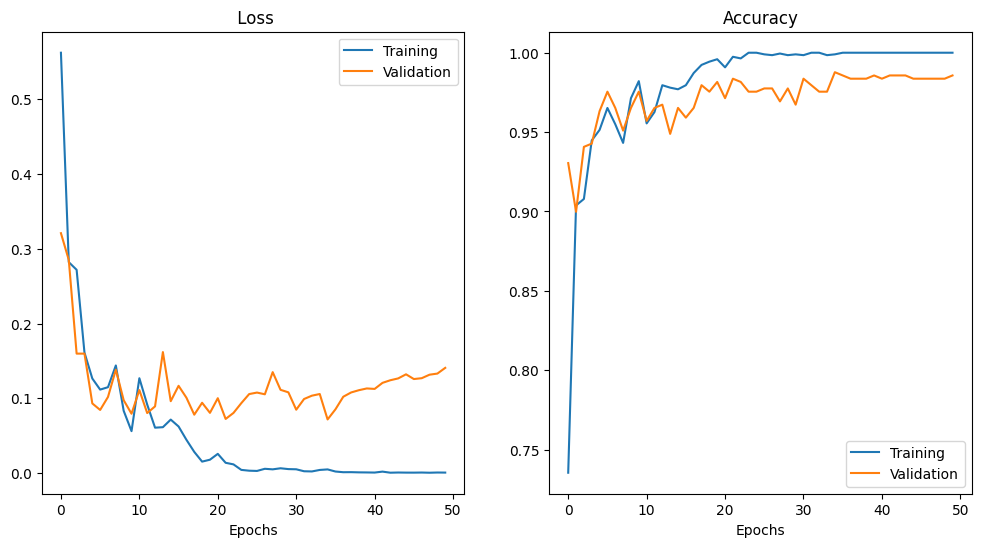

In [13]:

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=[12,6])
ax[0].plot(history.history["loss"])
ax[0].plot(history.history["val_loss"])
ax[0].set_title(" Loss")
ax[0].legend(("Training", "Validation"), loc="upper right")
ax[0].set_xlabel("Epochs")
ax[1].plot(history.history["accuracy"])
ax[1].plot(history.history["val_accuracy"])
ax[1].legend(("Training", "Validation"), loc="lower right")
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epochs")

y_pred_prob = model.predict(X_test)
# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Step 5: Evaluate Performance
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

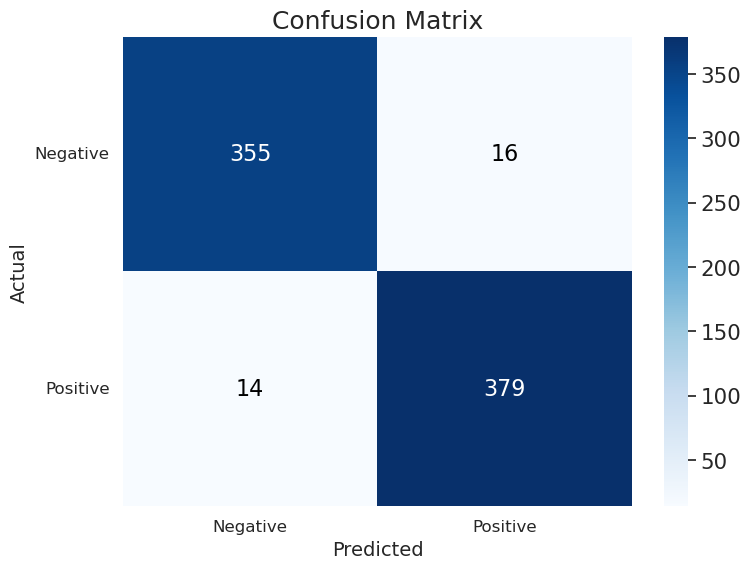

In [17]:

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()